In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [5]:
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [7]:
df[' shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [9]:
df[' shares'].unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000], dtype=int64)

### this provides a list or array of all unique values in the ' shares' column, meaning it shows each distinct number of shares without duplicates.

The specific array [ 593, 711, 1500, ..., 34500, 25600, 45000] suggests that the ' shares' column contains a range of values representing the number of shares for various articles or observations in the dataset. The values range from smaller numbers like 593 or 711 up to larger numbers like 34500, 25600, and 45000.

These values imply that the ' shares' column is continuous numerical data (not categorical), representing the number of times each article was shared. This information is useful for deciding whether the target variable should be treated as continuous (for regression) or transformed to categorical (for classification, such as a binary classification based on a threshold).

### EDA
Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [15]:
df.shape

(39644, 61)

In [17]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

### High Variability:

The mean of shares is around 3,395, but the standard deviation is very large (11,627), indicating high variability. This suggests that while some articles get an average number of shares, others receive vastly more or fewer.

### Presence of Extreme Values (Outliers):

The minimum value is 1, meaning some articles received only one share, while the maximum value is an exceptionally high 843,300. This wide range suggests that outliers exist in the data, with some articles achieving extreme popularity.

### Skewness in Distribution:

Given the high maximum value and large standard deviation relative to the mean, the distribution of shares is likely right-skewed. This skewness suggests that while most articles have a modest number of shares, a few articles become very popular.

### Median and Percentiles:

The median (50th percentile) is 1,400 shares, which is lower than the mean, confirming the skewed distribution. The 25th and 75th percentiles are 946 and 2,800, respectively, meaning that 50% of the articles received between 946 and 2,800 shares.

#### Finding Missing values

In [21]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [178]:
# Check for missing values in each column
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

# Count of NaN values in each column (numeric columns)
nan_counts = df.apply(lambda x: np.isnan(x).sum() if x.dtype.kind in 'f' else 0)
print("NaN Values in Each Column:\n", nan_counts)

Missing values in each column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [23]:
df2 = df.drop_duplicates()
print(df.duplicated().sum())

0


In [25]:
df[' shares'].value_counts()

 shares
1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name: count, Length: 1454, dtype: int64

##### This function provides a count of occurrences for each unique value in the ' shares' column. It sorts these values in descending order, showing the most frequently occurring values first.

##### The value 1100 (shares) appears 2308 times in the dataset, making it the most common number of shares.1200 shares occur 2018 times in the dataset, and so on.

##### The Length: 1454 at the end shows that there are 1454 unique values in the ' shares' column.
##### This output is helpful for identifying the distribution of the target variable, which may suggest skewness or the presence of frequent and rare values.For regression tasks, it helps understand the range and frequency of the target values. 

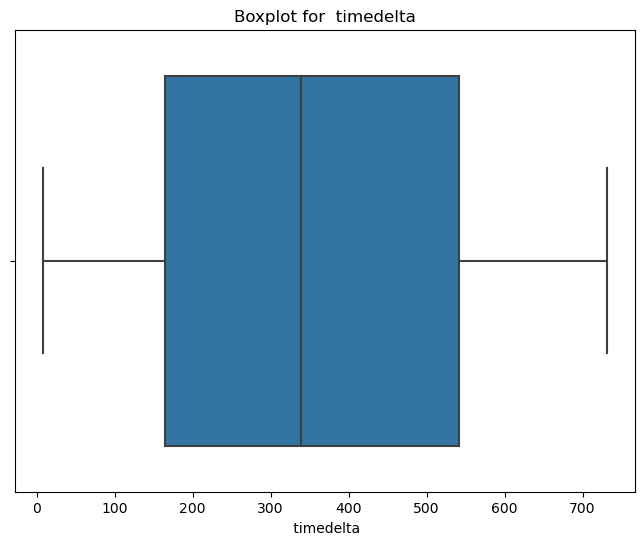

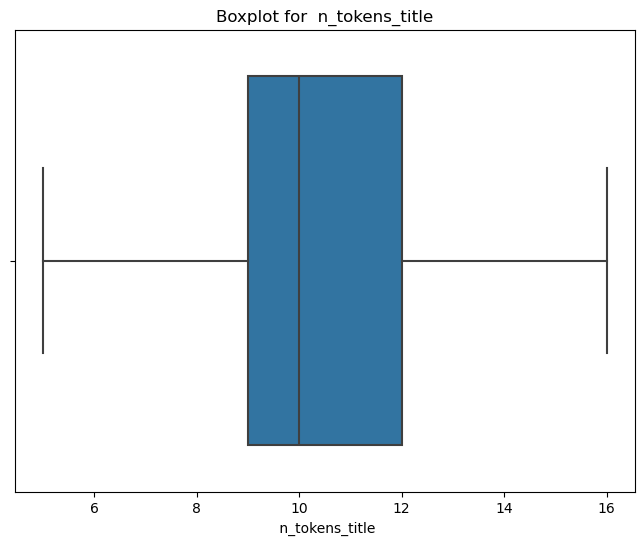

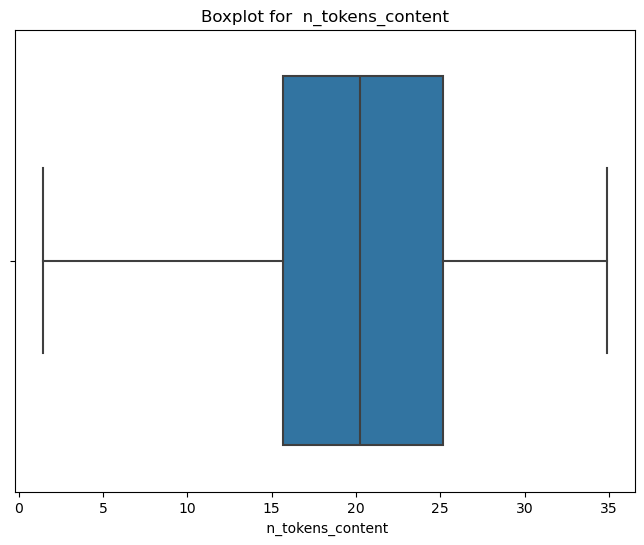

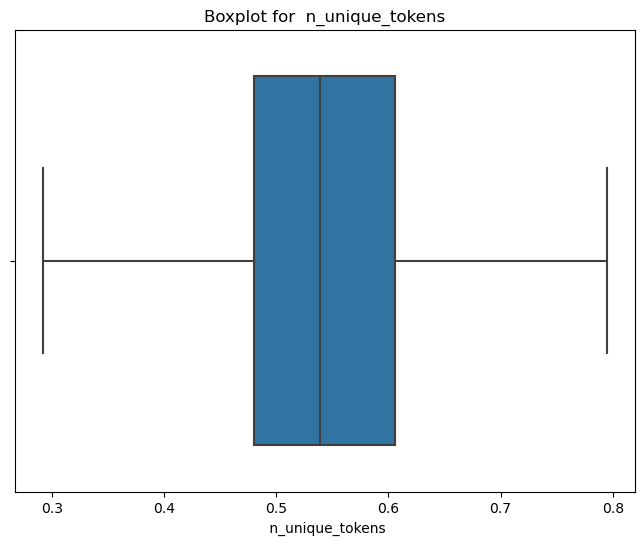

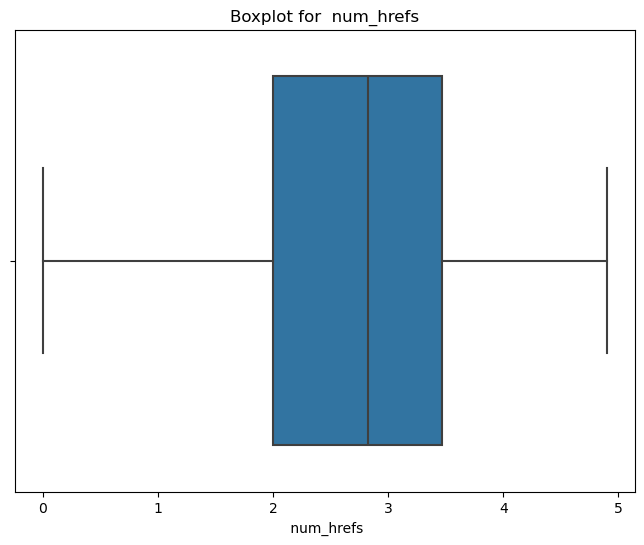

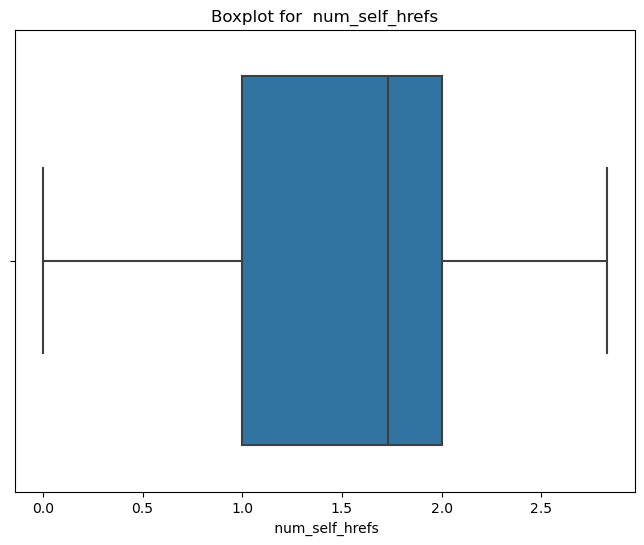

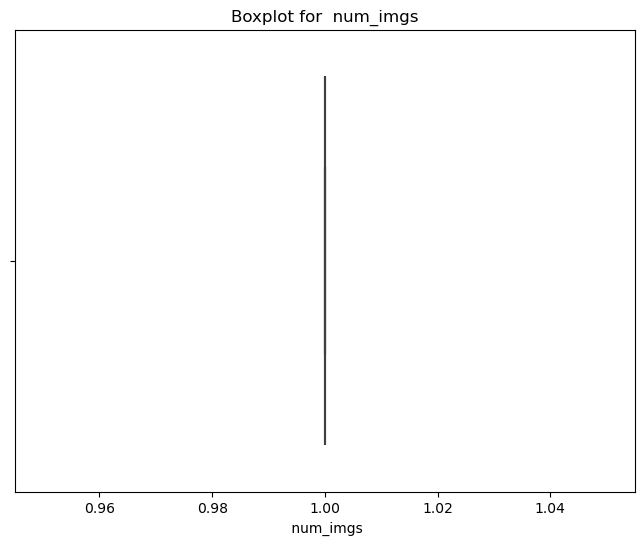

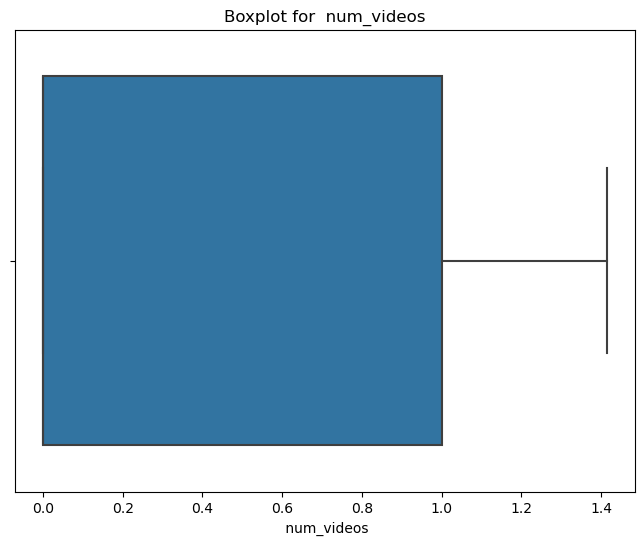

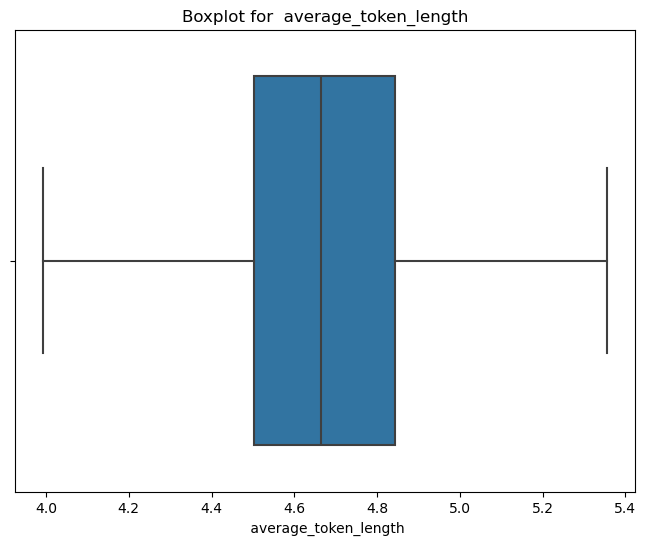

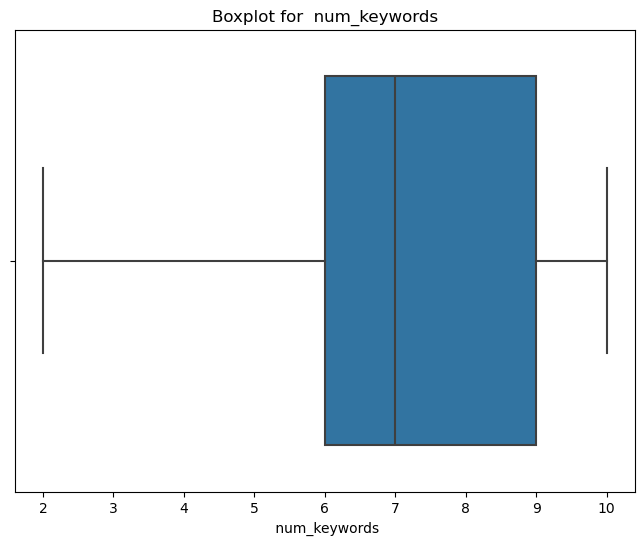

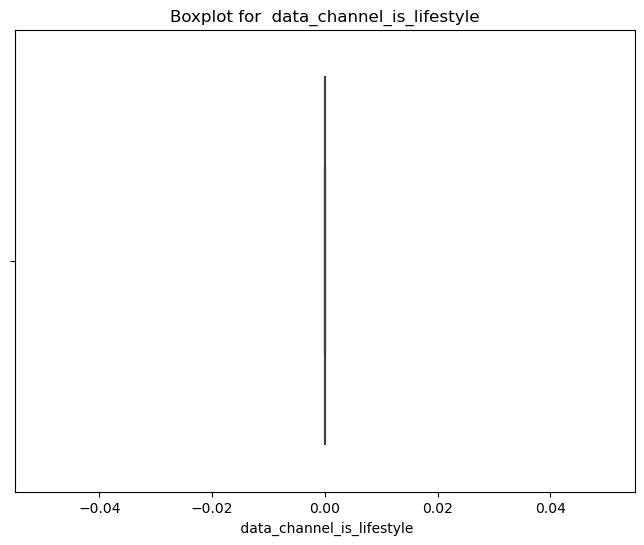

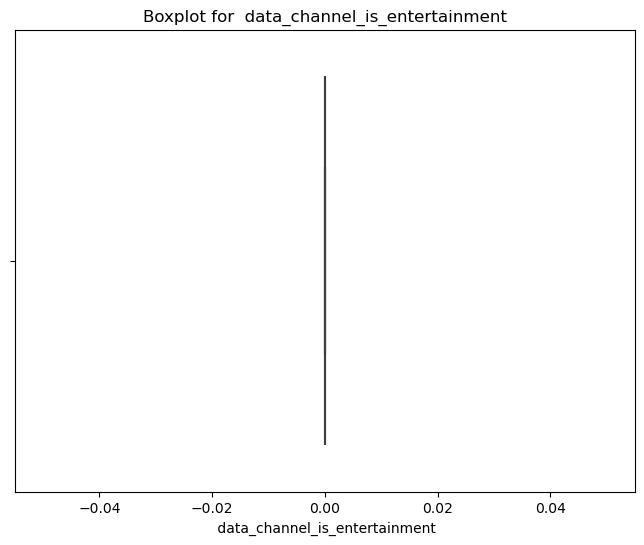

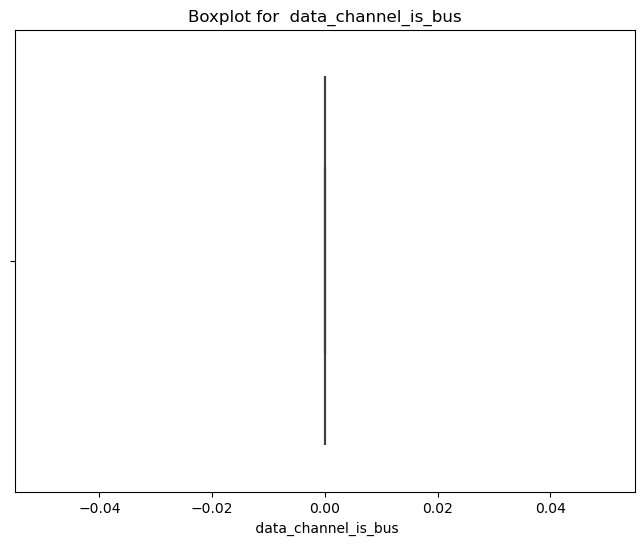

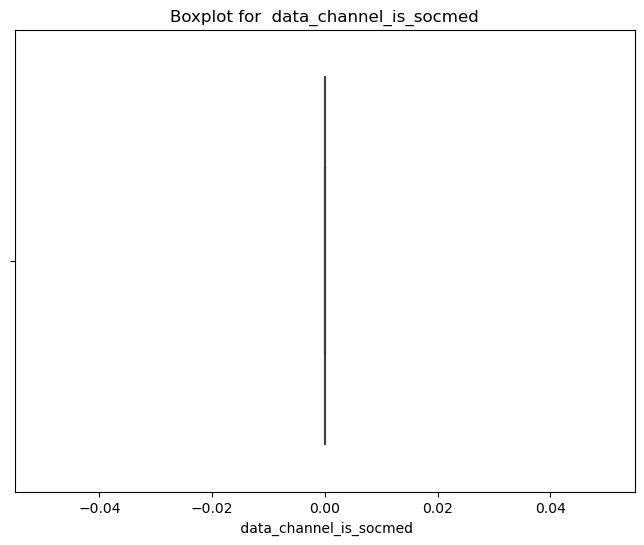

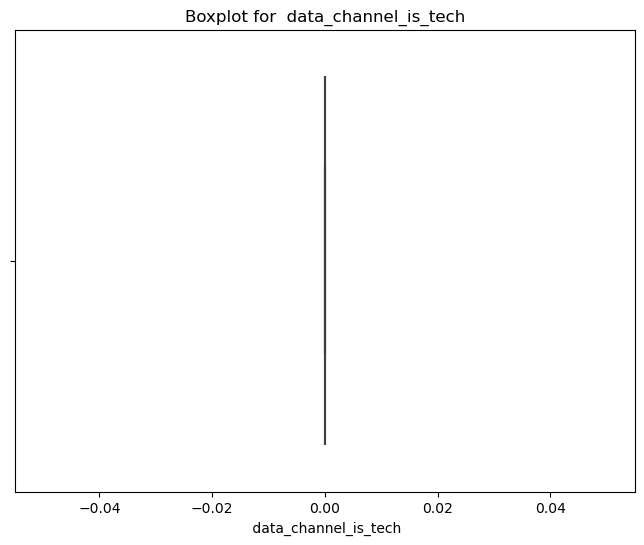

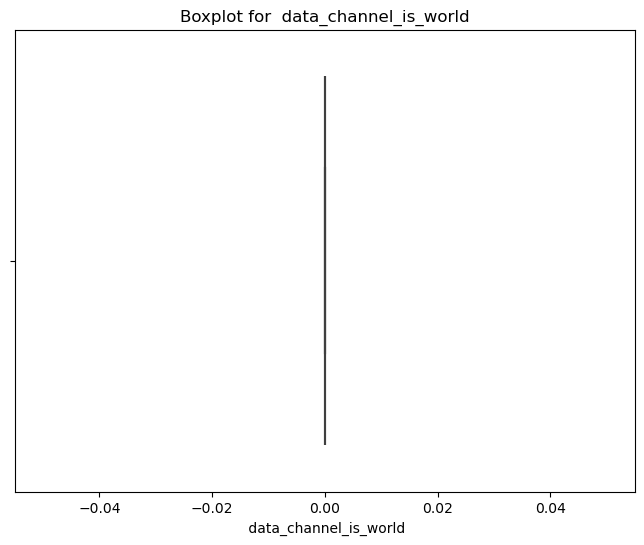

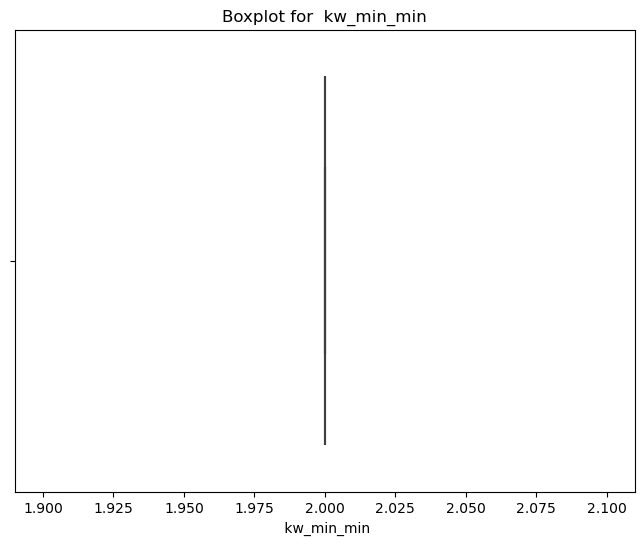

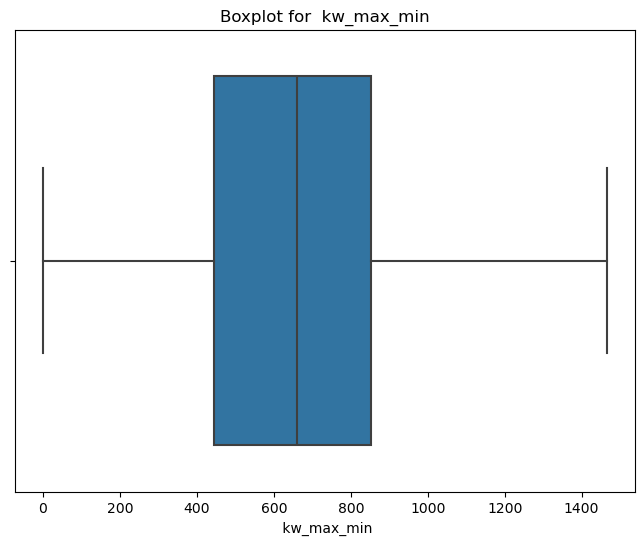

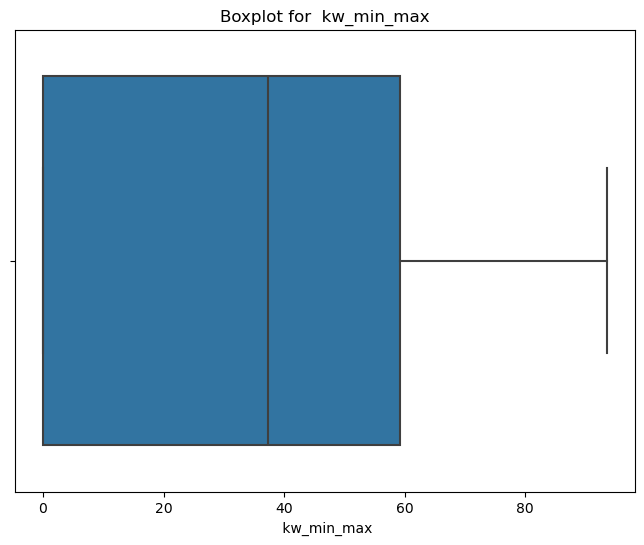

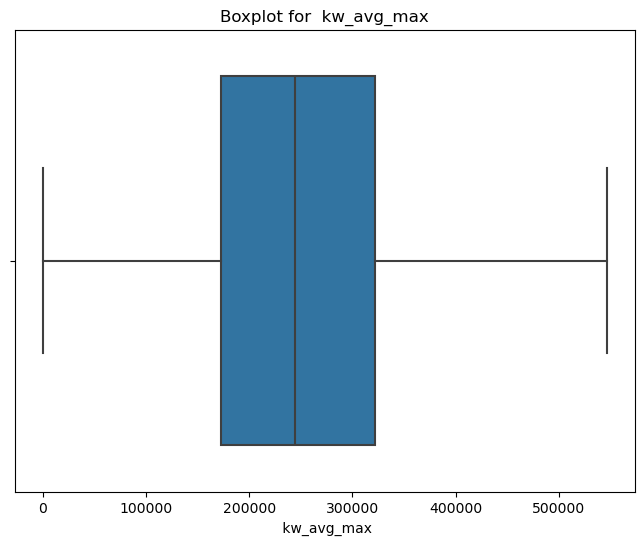

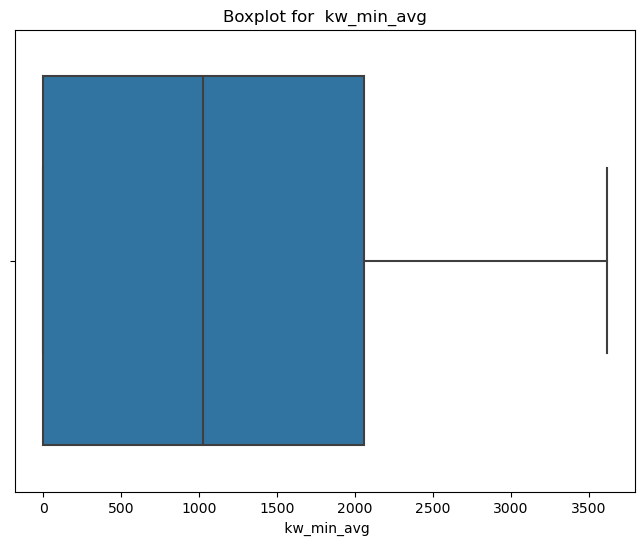

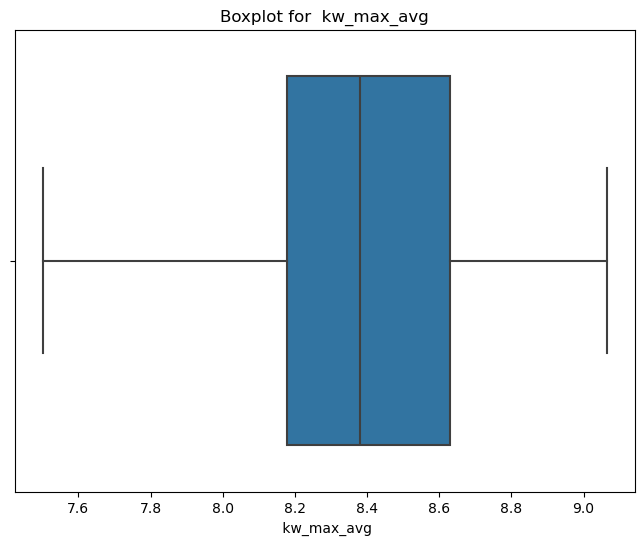

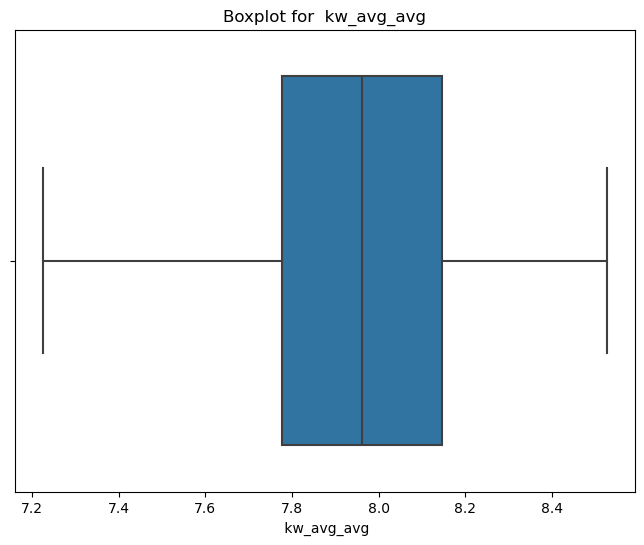

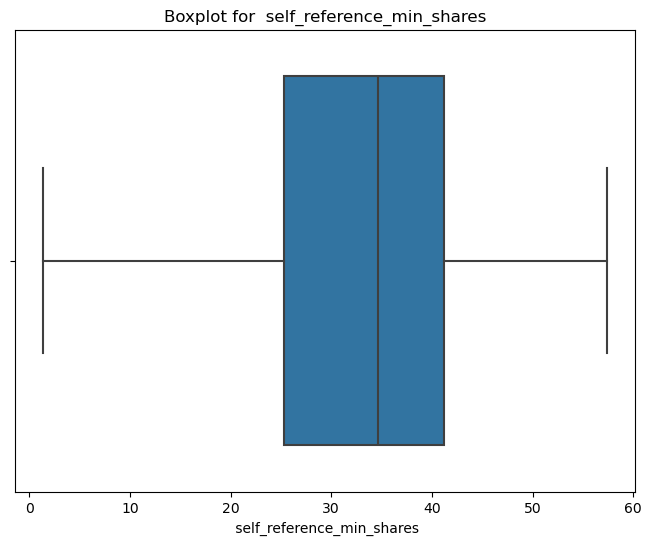

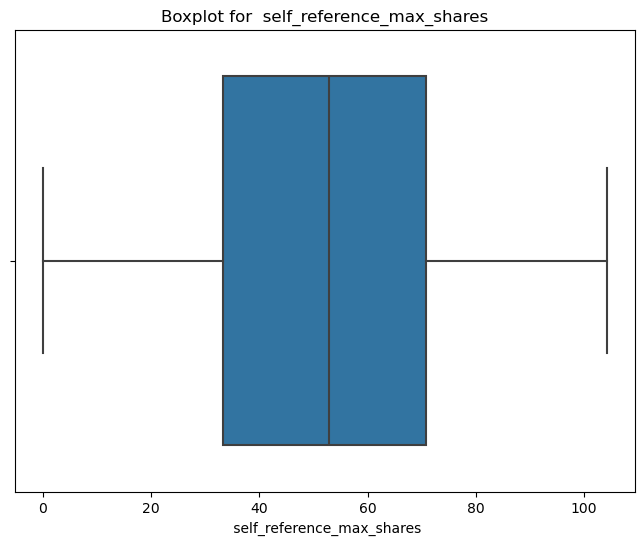

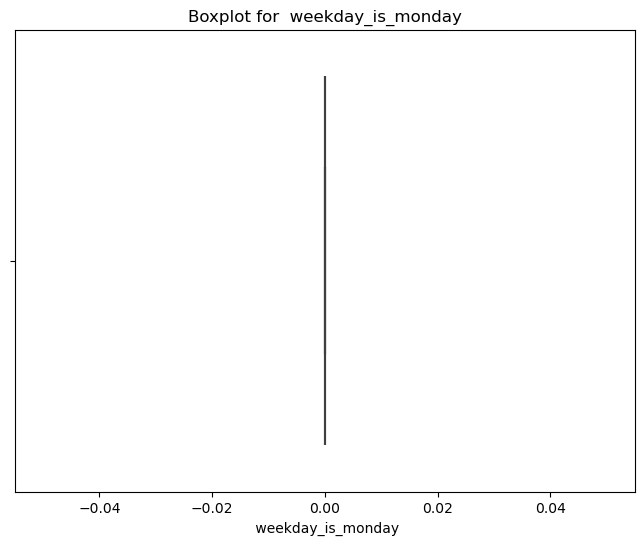

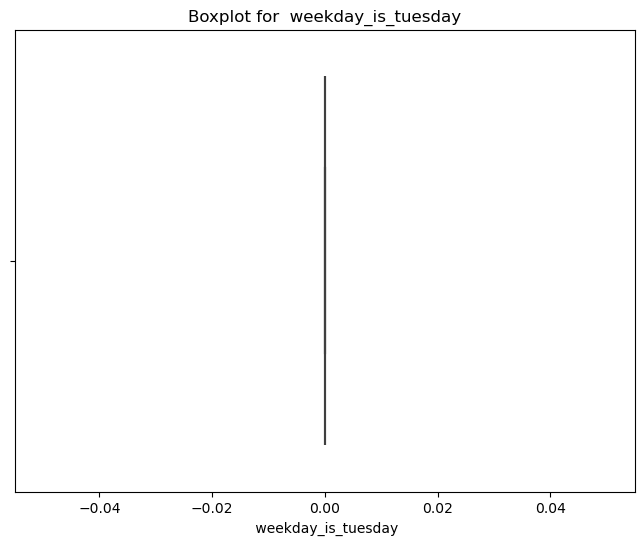

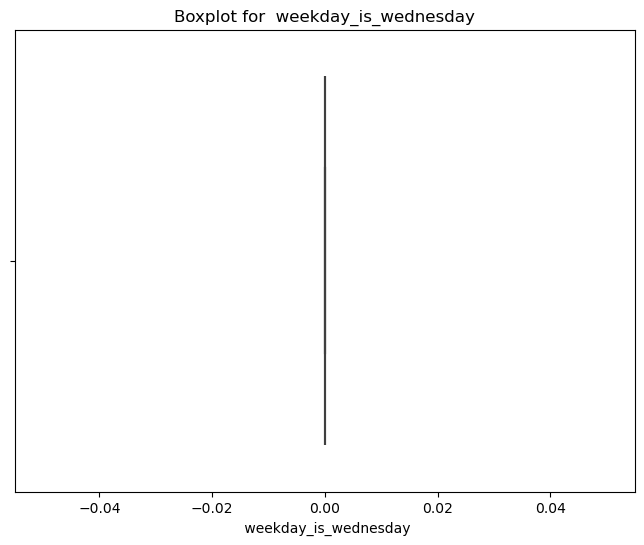

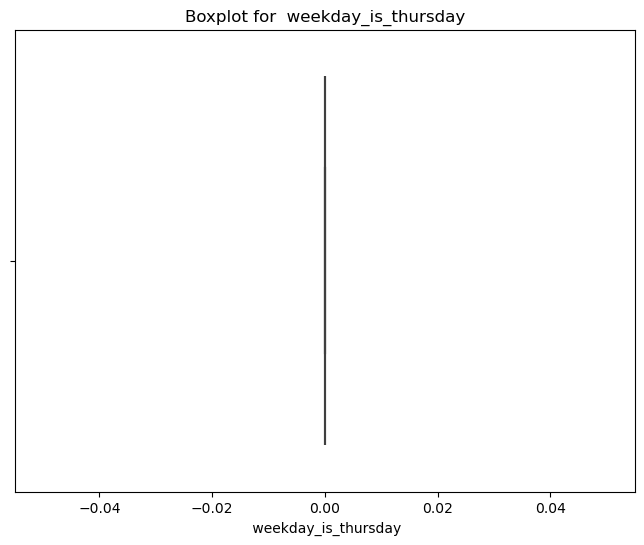

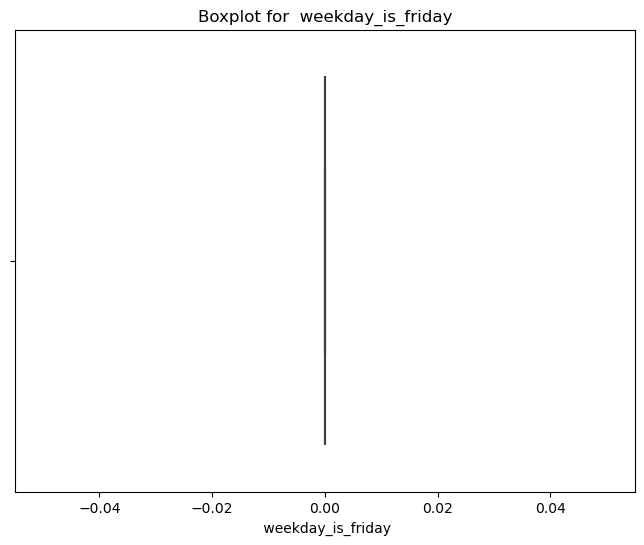

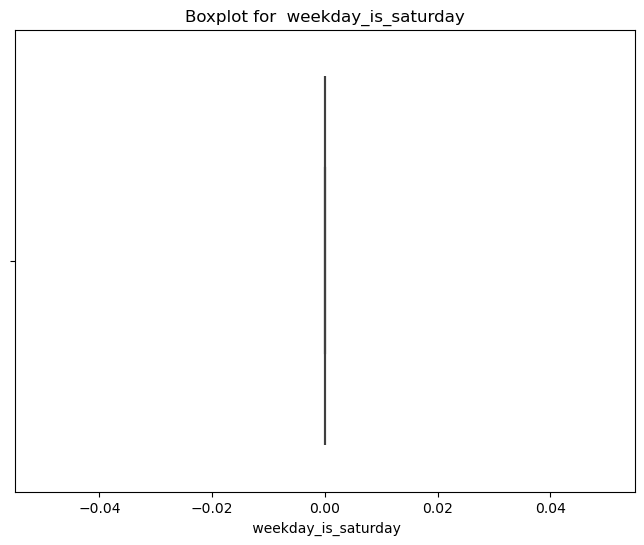

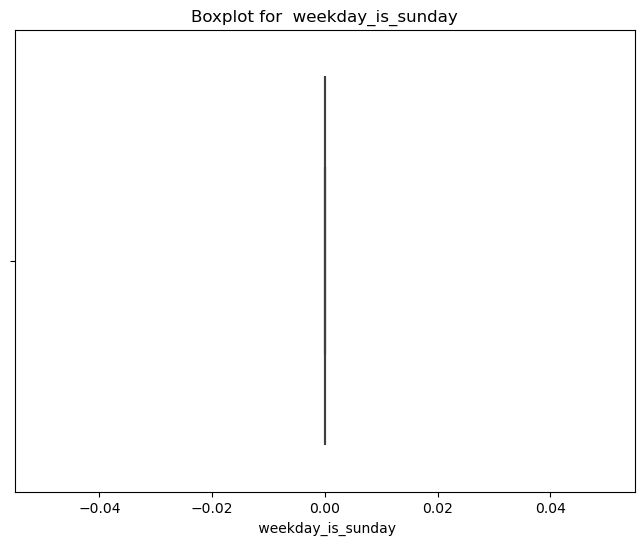

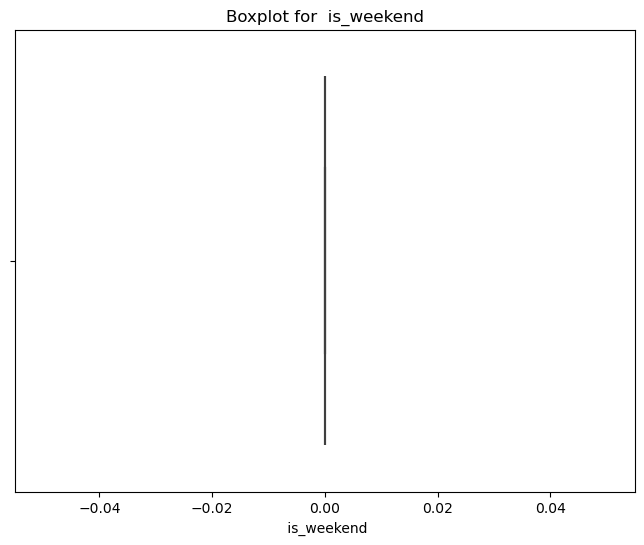

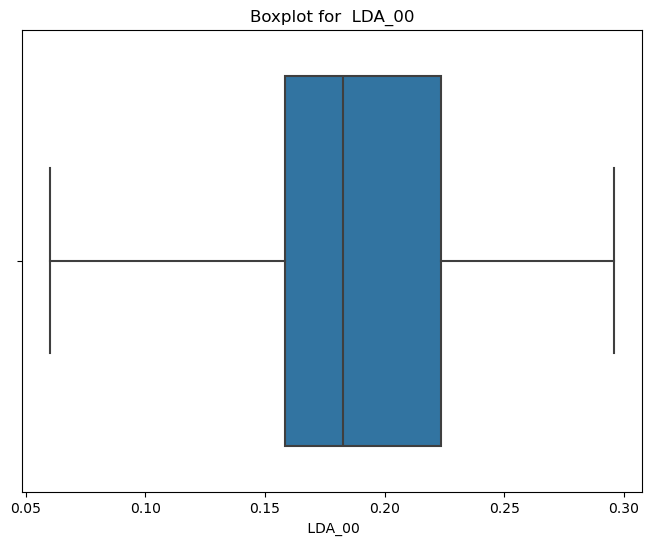

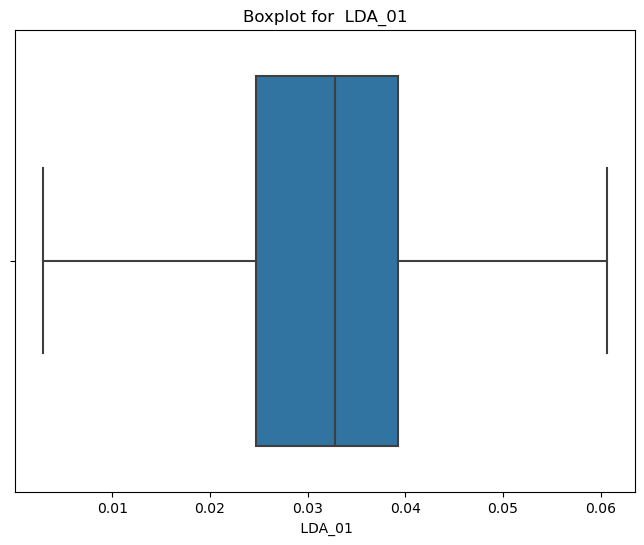

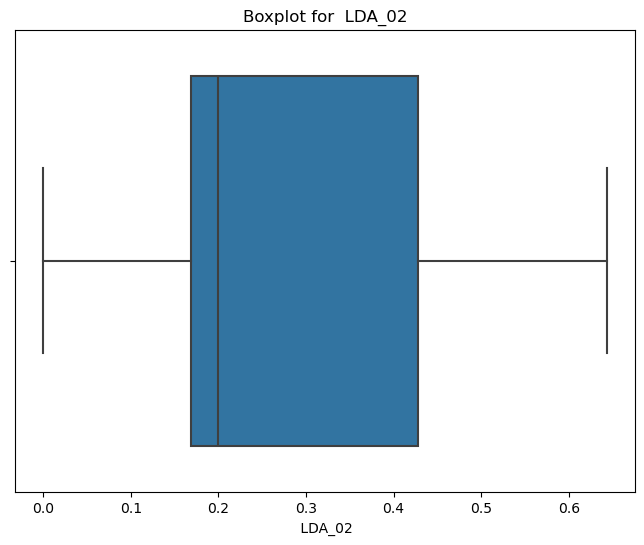

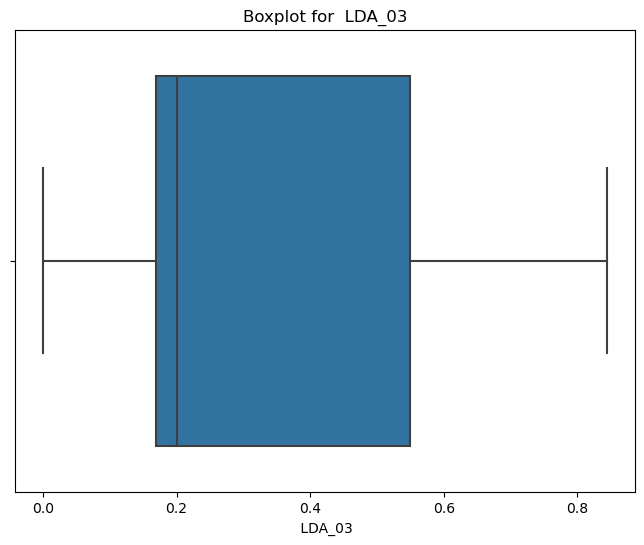

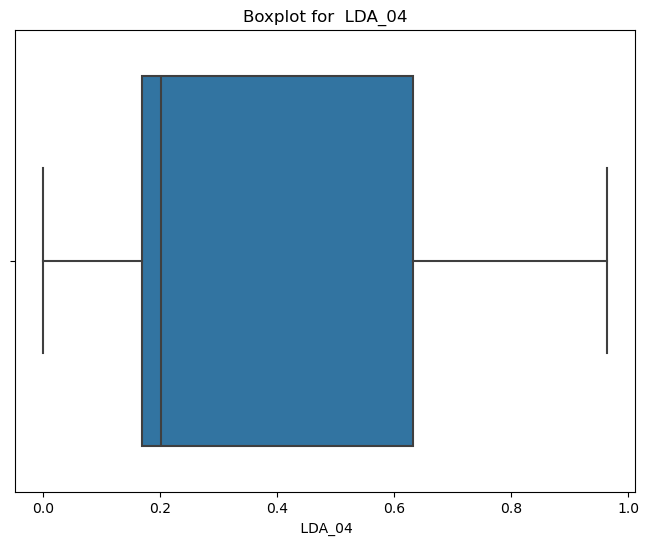

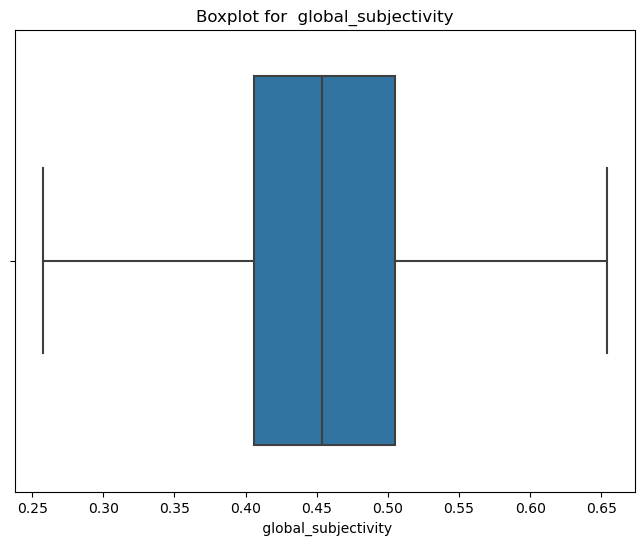

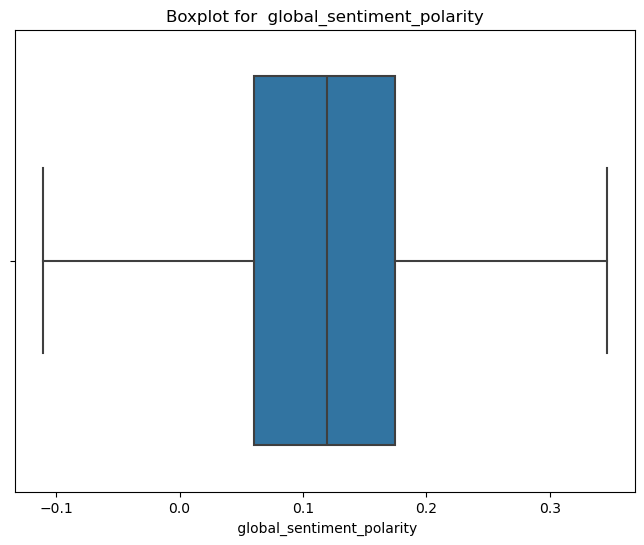

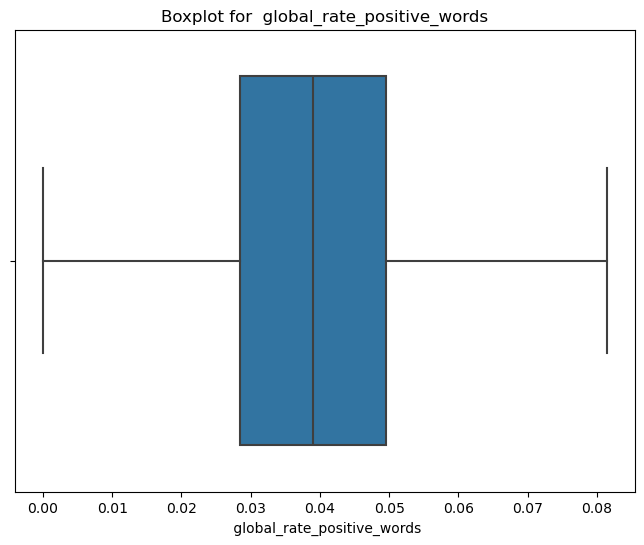

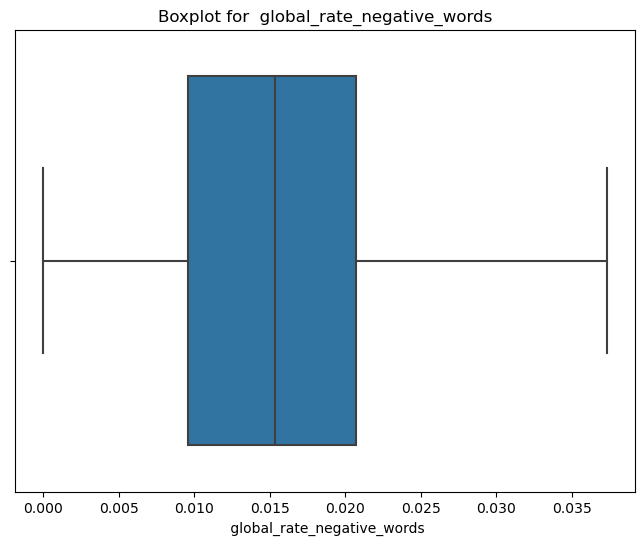

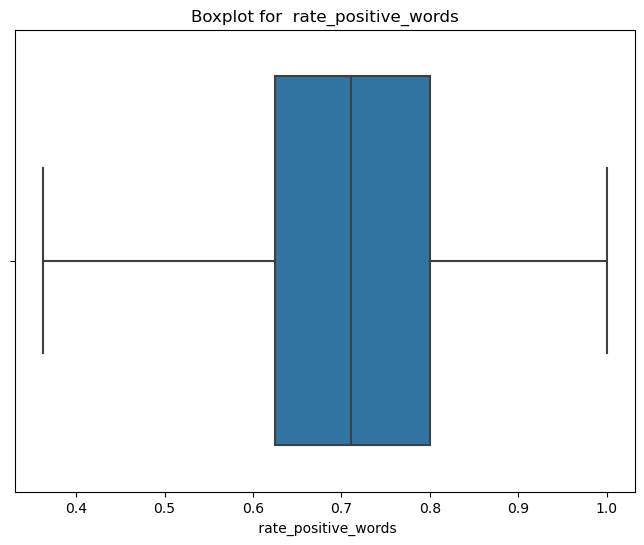

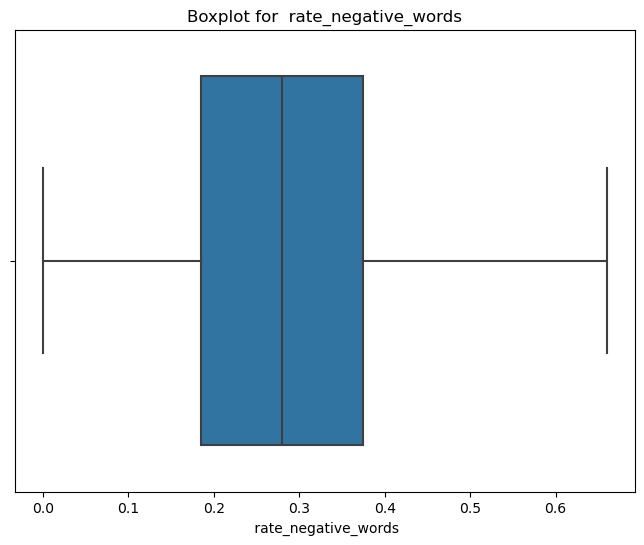

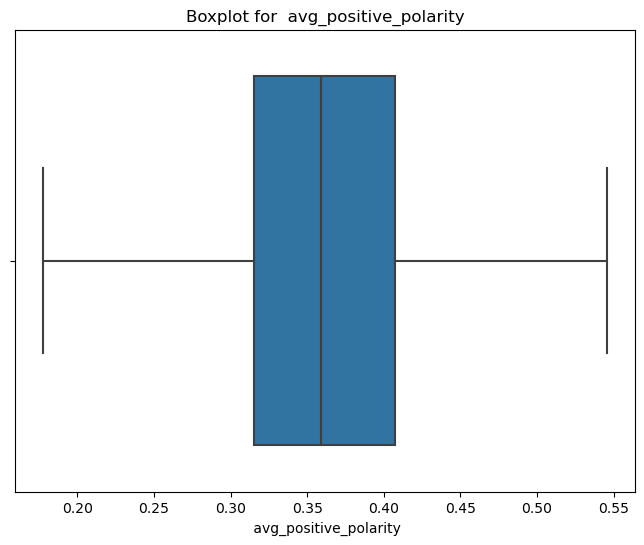

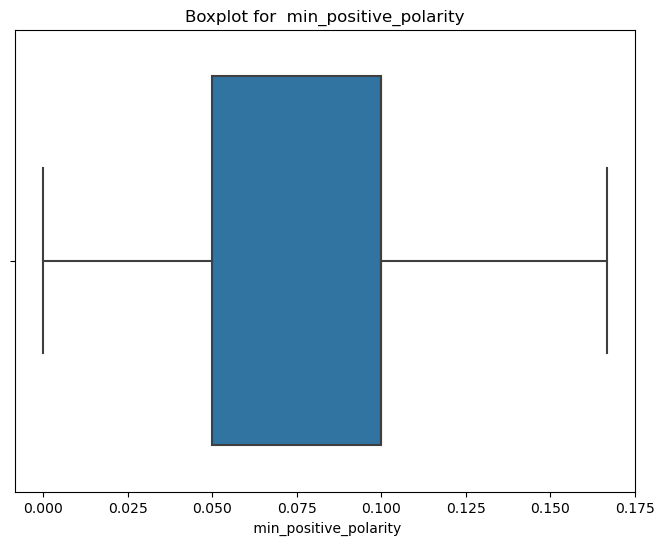

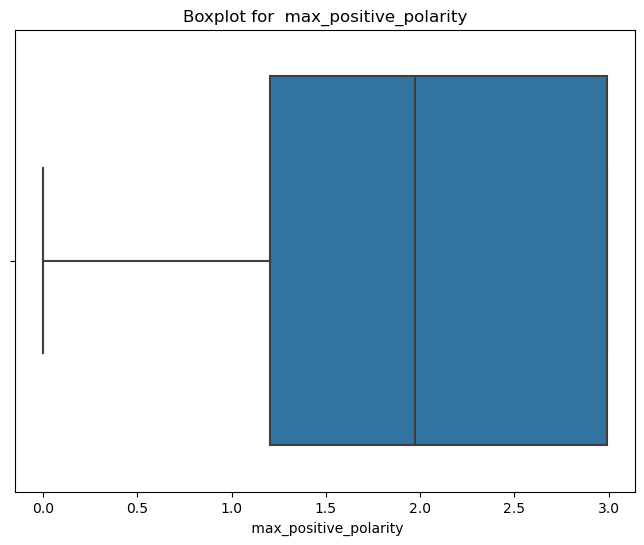

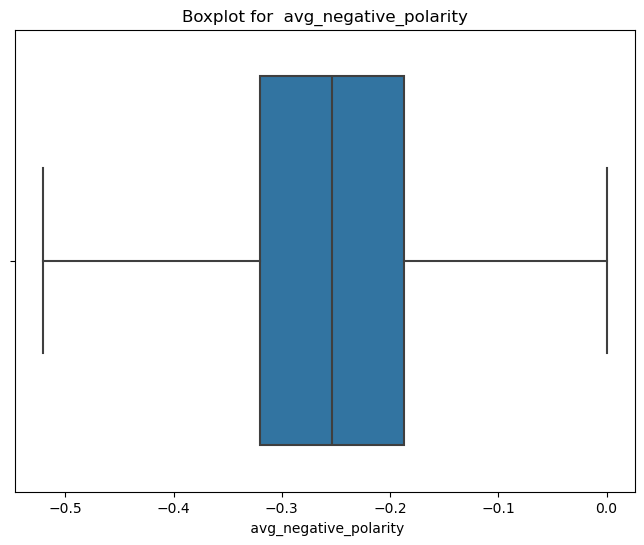

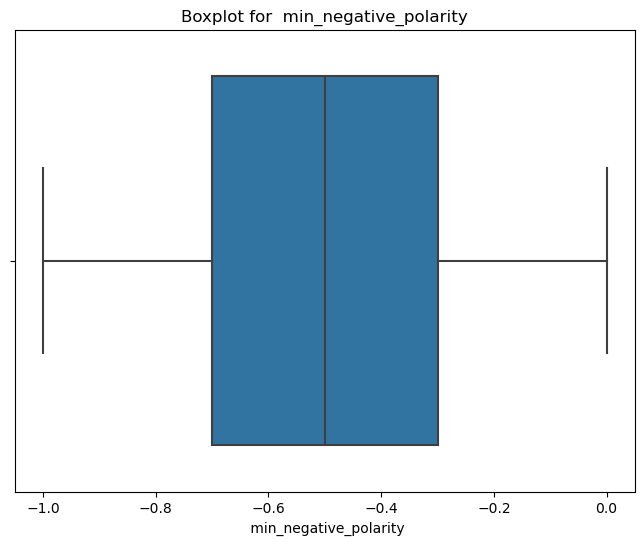

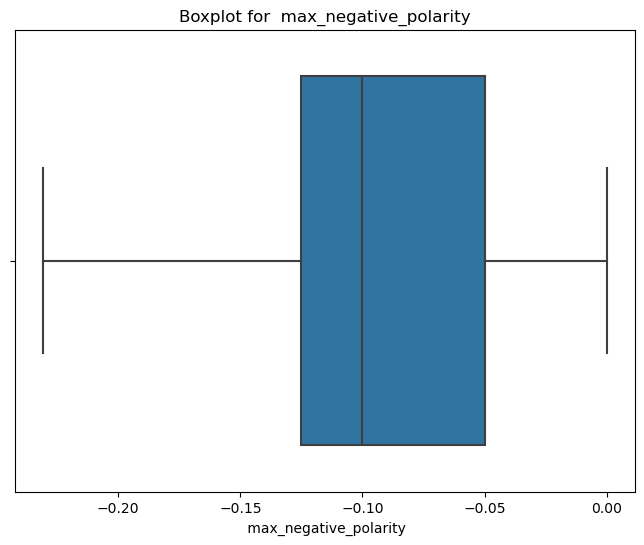

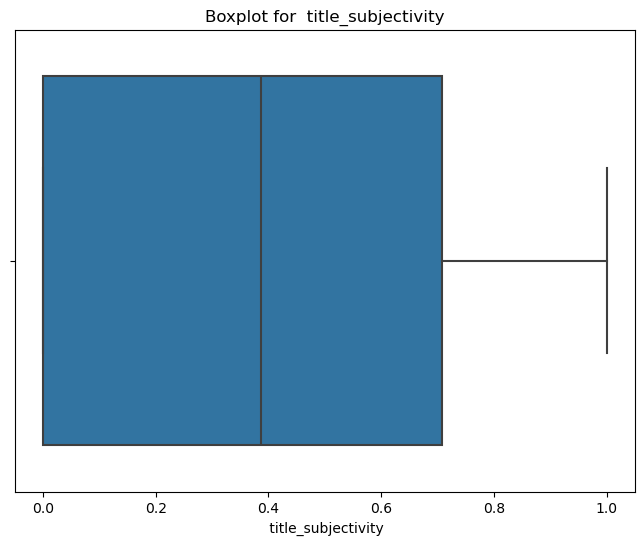

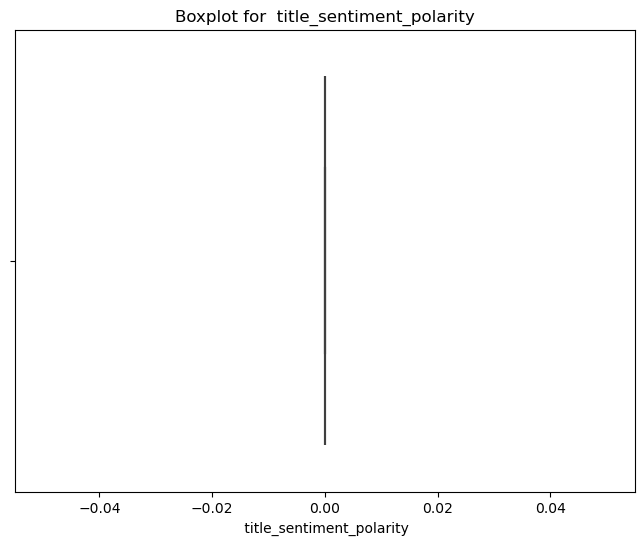

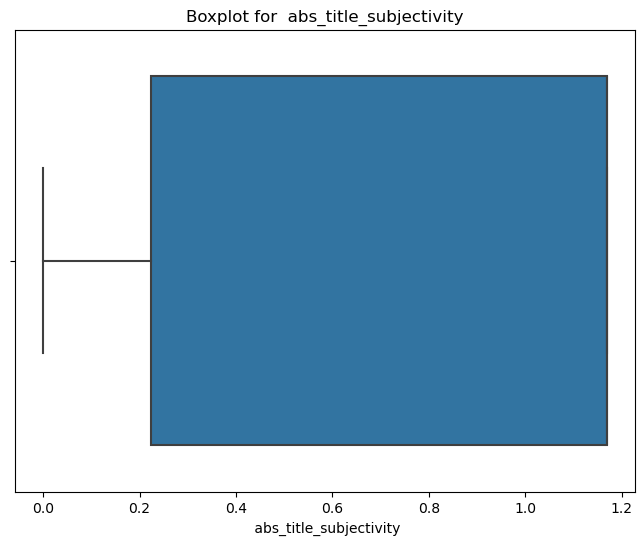

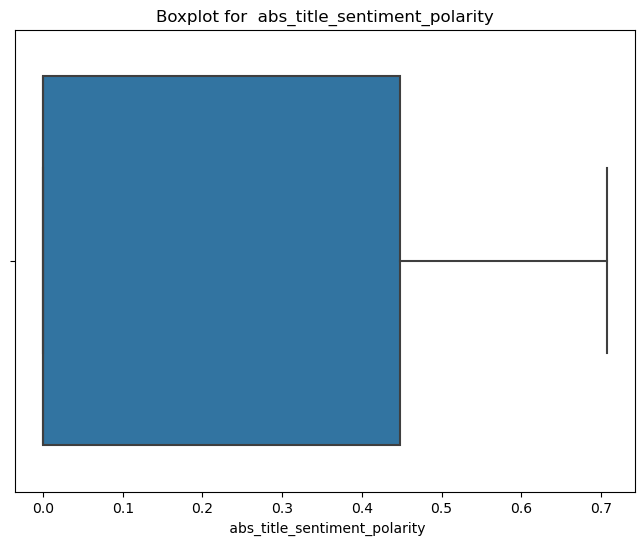

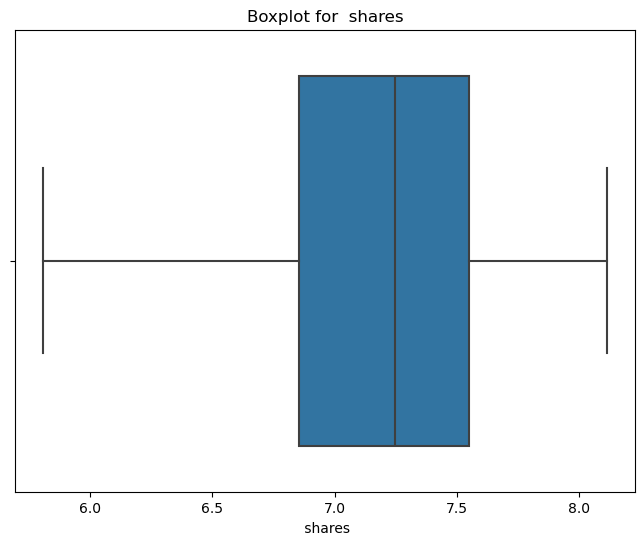

In [182]:

def draw_boxplots(df1):
    numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df1[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df1)

In [ ]:
# Function to detect and impute outliers with median using the IQR method
def impute_outliers_with_median(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median of the column
        median_value = df1[col].median()
        df[col] = np.where((df1[col] < lower_bound) | (df1[col] > upper_bound), median_value, df1[col])

    return df1

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df1_imputed = impute_outliers_with_median(df1, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with median:\n", df1_imputed.head())



print("Shape of dataset before imputing outliers:",df1.shape)
print("Shape of dataset after imputing outliers:",df1_imputed.shape)

In [ ]:
df2 = df1_imputed

In [ ]:
# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df2[col] = np.where(df2[col] < lower_bound, lower_bound, df2[col])
        df2[col] = np.where(df2[col] > upper_bound, upper_bound, df2[col])

    return df2

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df2_capped = cap_outliers_iqr(df2, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df2_capped.head())

In [ ]:
df3 = df2_capped
df3.shape

In [ ]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df3):
    numerical_cols = df3.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df3[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df3)

#### Understanding shares Distribution

In [ ]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df3[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

## Histogram

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


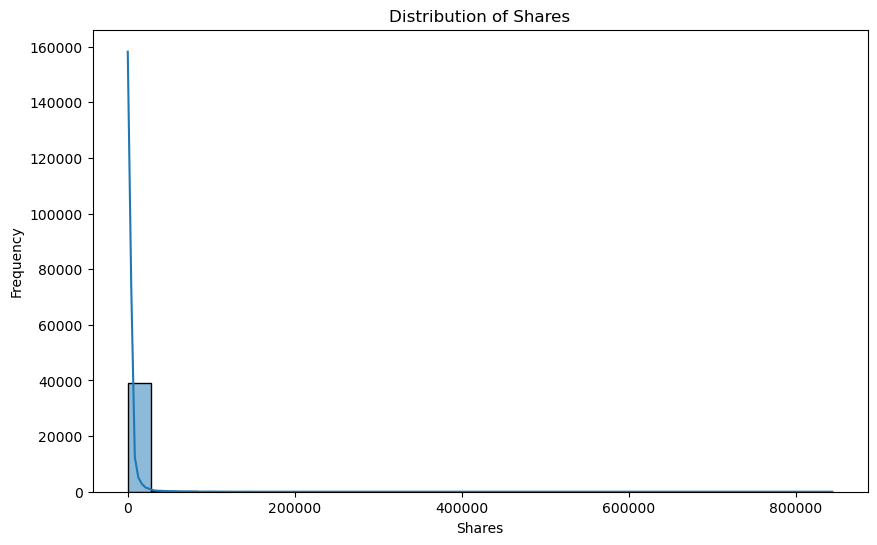

In [29]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

### The histogram plot of the shares variable shows a highly skewed distribution. Here are the key observations:
Right Skewed (Positive Skew): The distribution is heavily skewed to the right. Most articles have a low number of shares, while only a few have very high shares, creating a long tail on the right side of the plot.

High Frequency of Low Shares: The majority of articles fall into the low share count range (close to 0), indicating that most articles do not receive high popularity.

Presence of Outliers: There are a few articles with an extremely high number of shares, represented by the long tail extending toward 800,000. These are likely outliers and may need special handling, such as using a log transformation, to normalize the distribution for regression modeling.

Log Transformation Recommendation: Given the skewness, applying a log transformation to shares can help reduce skewness and make the distribution more normal-like, which is often beneficial for modeling.¶

## Boxplot

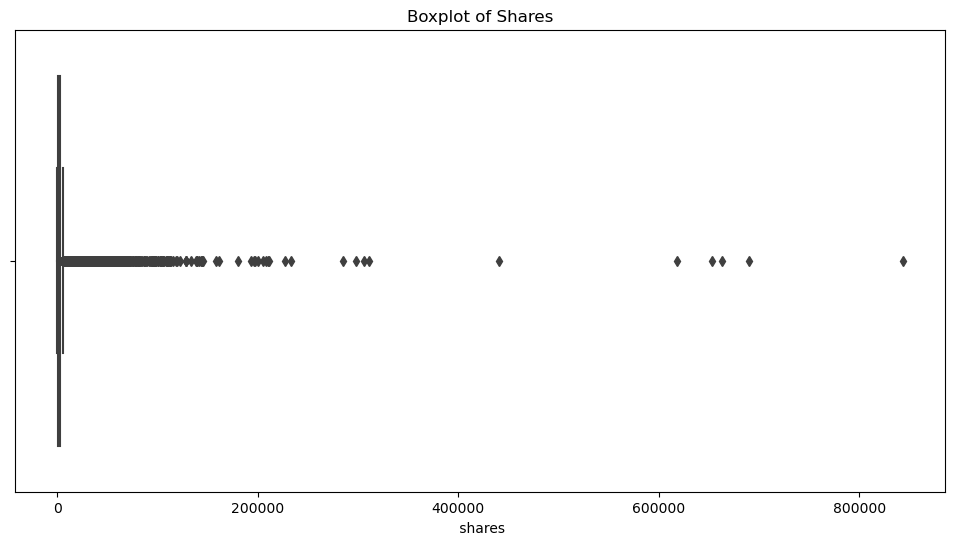

In [33]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=' shares', data=df)
plt.title('Boxplot of Shares')
plt.show()

#### The simple boxplot will help you identify if there are any extreme values (outliers).There are outliers present in shares
Significant Outliers: The majority of data points are concentrated near the lower end of the shares range, with many extreme values extending far to the right. This indicates the presence of numerous high outliers, which are articles with unusually high numbers of shares. These outliers are represented by circles outside the “whiskers” of the boxplot.

Skewed Distribution: The boxplot confirms that the data is highly right-skewed, with a long tail of values stretching far beyond the central data range. This skewness suggests that most articles have relatively low shares, while a few have gone viral, resulting in very high share counts.

Compressed Interquartile Range (IQR): The box (which represents the IQR between the 25th and 75th percentiles) is compressed towards the lower end of the range. This suggests that the typical spread of shares is quite narrow compared to the extreme values found in the dataset.¶
Conclusion This boxplot confirms that shares has a highly skewed distribution with many outliers.

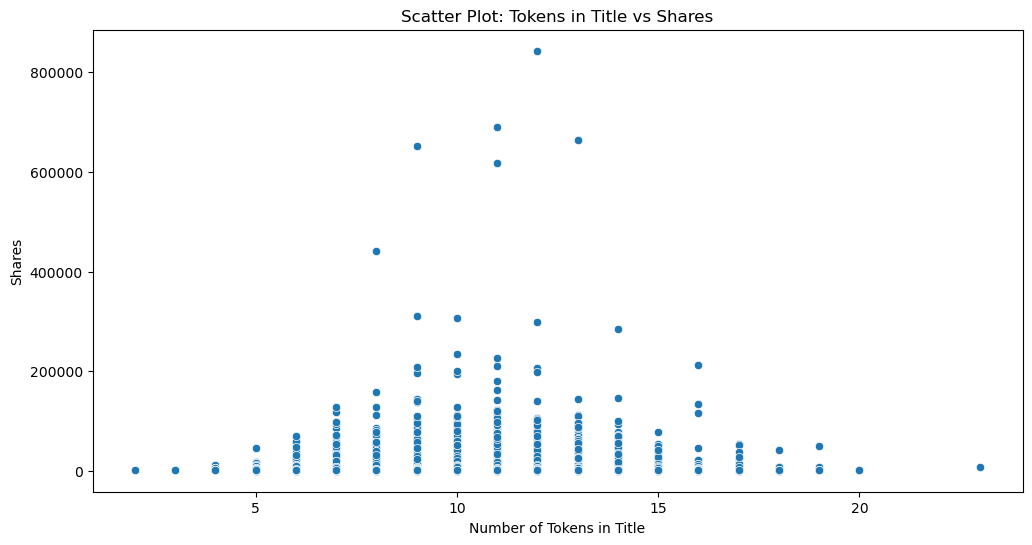

In [36]:
# Scatter plot (assuming we have a numerical column to compare)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=' n_tokens_title', y=' shares', data=df)
plt.title('Scatter Plot: Tokens in Title vs Shares')
plt.xlabel('Number of Tokens in Title')
plt.ylabel('Shares')
plt.show()

#### This scatter plot visualizes the relationship between the number of tokens (words) in the title of an article and the number of shares it receives.

Distribution of Shares: The number of shares varies widely across different token counts in titles. The highest concentration of shares seems to fall below the 200,000 mark, though a few outliers reach as high as over 800,000 shares.

Optimal Range of Tokens: The scatter plot shows that most articles tend to have between 5 and 15 tokens in their titles. Additionally, there appears to be a slight concentration of higher share counts for titles with around 9-12 tokens.

Outliers: There are notable outliers with exceptionally high shares across different title lengths, indicating that some articles perform very well regardless of title length.

In summary, while the number of tokens in the title doesn’t directly correlate with a clear increase or decrease in shares, there may be an optimal range (roughly 9-12 tokens) where higher engagement (in terms of shares) is more common. This could suggest that titles that are neither too short nor too long might engage readers more effectively.


In [39]:
# checks for the skewness and kurtosis

from scipy.stats import skew, kurtosis

skewness = skew(df[' shares'])
kurt = kurtosis(df[' shares'])

print(f"Skewness of Shares: {skewness}")
print(f"Kurtosis of Shares: {kurt}")

Skewness of Shares: 33.9625997792866
Kurtosis of Shares: 1832.4413727401281


High Skewness (33.96):This confirms that most articles receive a low number of shares, while a small number receive disproportionately high shares, creating a "long tail" effect.

High Kurtosis (1832.44): A high kurtosis value, particularly one as extreme as this, indicates a leptokurtic distribution, meaning there are many extreme outliers (values far from the mean). This high kurtosis suggests that the distribution is heavily concentrated around the mean with a sharp peak and a significant number of extreme values in the tails.

### Correlation 

In [43]:
numeric_data = df.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr().abs()
correlation_matrix

timedelta   n_tokens_title  \
 timedelta                        1.000000         0.240320   
 n_tokens_title                   0.240320         1.000000   
 n_tokens_content                 0.062867         0.018160   
 n_unique_tokens                  0.002866         0.005318   
 n_non_stop_words                 0.000089         0.004754   
 n_non_stop_unique_tokens         0.003805         0.005420   
 num_hrefs                        0.000832         0.053496   
 num_self_hrefs                   0.064530         0.014856   
 num_imgs                         0.027636         0.008858   
 num_videos                       0.000936         0.051460   
 average_token_length             0.130465         0.071403   
 num_keywords                     0.046884         0.006077   
 data_channel_is_lifestyle        0.054492         0.070815   
 data_channel_is_entertainment    0.049109         0.132791   
 data_channel_is_bus              0.055788         0.023902   
 data_channel_is_socmed           0.076287         0.090394   
 data_channel_is_tech             0.083277         0.046716   
 data_channel_is_world            0.170250         0.049223   
 kw_min_min                       0.591199         0.110672   
 kw_max_min                       0.029503         0.005890   
 kw_avg_min                       0.133225         0.031400   
 kw_min_max                       0.076590         0.012926   
 kw_max_max                       0.637824         0.120841   
 kw_avg_max                       0.493093         0.115746   
 kw_min_avg                       0.157204         0.002370   
 kw_max_avg                       0.051820         0.006918   
 kw_avg_avg                       0.163164         0.004296   
 self_reference_min_shares        0.011438         0.004563   
 self_reference_max_shares        0.014501         0.000128   
 self_reference_avg_sharess       0.015655         0.000661   
 weekday_is_monday                0.006129         0.004274   
 weekday_is_tuesday               0.005781         0.009322   
 weekday_is_wednesday             0.009961         0.008935   
 weekday_is_thursday              0.004042         0.015472   
 weekday_is_friday                0.002853         0.002015   
 weekday_is_saturday              0.004067         0.015013   
 weekday_is_sunday                0.004226         0.006289   
 is_weekend                       0.000272         0.005996   
 LDA_00                           0.080894         0.070038   
 LDA_01                           0.004423         0.063568   
 LDA_02                           0.141713         0.038365   
 LDA_03                           0.030838         0.042208   
 LDA_04                           0.092906         0.065063   
 global_subjectivity              0.133837         0.056804   
 global_sentiment_polarity        0.158646         0.072226   
 global_rate_positive_words       0.207604         0.064951   
 global_rate_negative_words       0.010266         0.015530   
 rate_positive_words              0.198654         0.066589   
 rate_negative_words              0.071968         0.034186   
 avg_positive_polarity            0.126344         0.049619   
 min_positive_polarity            0.054772         0.025069   
 max_positive_polarity            0.098288         0.021662   
 avg_negative_polarity            0.000507         0.017096   
 min_negative_polarity            0.062175         0.029146   
 max_negative_polarity            0.063239         0.011425   
 title_subjectivity               0.015919         0.077245   
 title_sentiment_polarity         0.038711         0.000240   
 abs_title_subjectivity           0.011551         0.146954   
 abs_title_sentiment_polarity     0.002745         0.040550   
 shares                           0.008662         0.008783   

                                 n_tokens_content   n_unique_tokens  \
 timedelta                               0.062867          0.002866   
 n_tokens_title                          0.0181

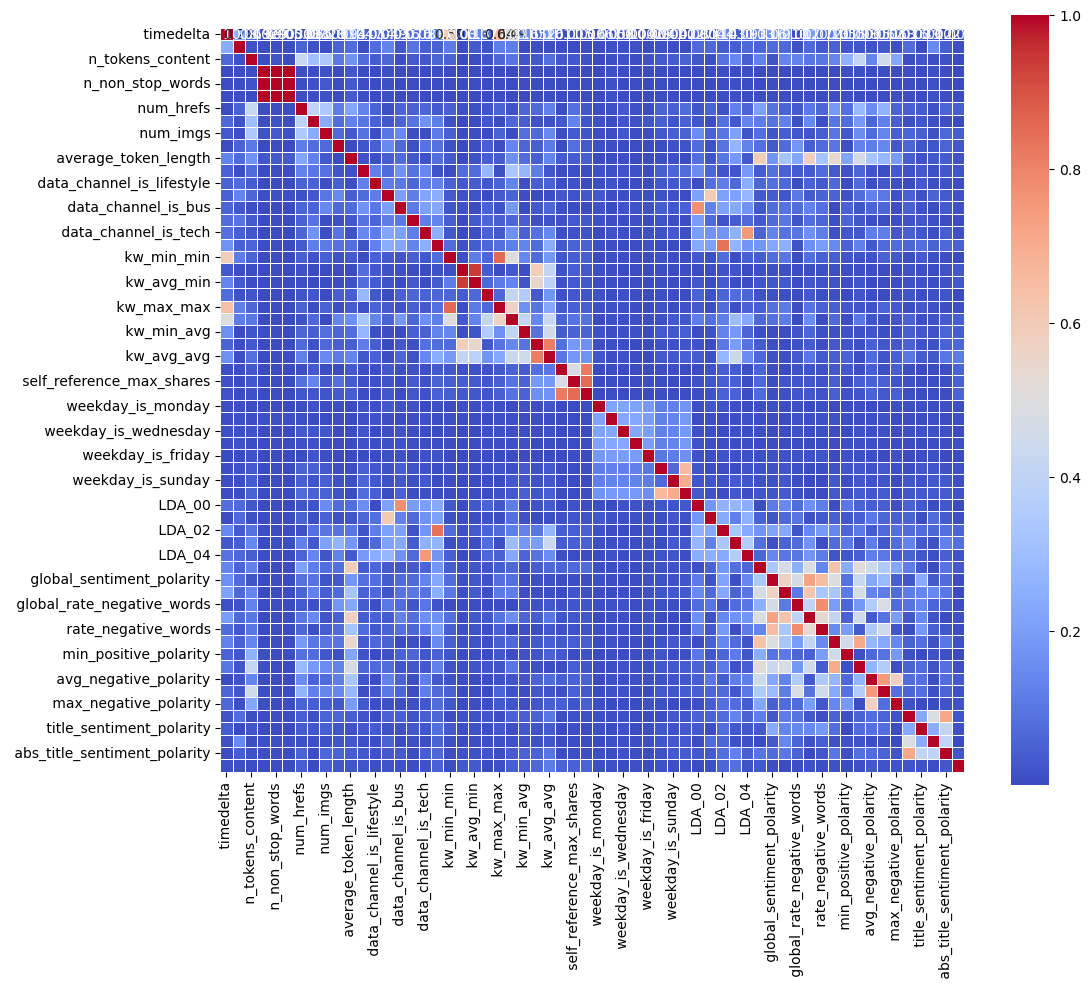

In [45]:
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
plt.show()

#### Highly Correlated Features: 
There are clusters of features with high correlation (close to 1 or -1). This means that some features have strong linear relationships with each other, potentially making them redundant in a predictive model. For example, features like kw_min_avg, kw_avg_avg, self_reference_max_shares, and self_reference_avg_shares often show higher correlations with each other. These could be candidates for removal or dimensionality reduction to avoid multicollinearity.

#### Low Correlation with Target (shares):
The target variable (shares or equivalent) appears to have relatively low correlation with most of the other features, meaning no single feature stands out as a very strong predictor of the target by itself. This could indicate that the target is likely influenced by a combination of multiple features rather than any individual one.

#### Groups by Topic or Sentiment: 
Features related to topics (e.g., data_channel_is_entertainment, data_channel_is_bus) and sentiment/polarity (e.g., global_sentiment_polarity, rate_positive_words) tend to group together, showing some intra-group correlations. This suggests that news topics and sentiment might affect each other, which could be useful information for understanding the dataset.

#### Potential Multicollinearity Issue: 
The presence of several strongly correlated features can lead to multicollinearity, which may negatively affect some machine learning algorithms (e.g., linear models). It could be helpful to use feature selection techniques or dimensionality reduction (like PCA) to mitigate this issue.

In [48]:
import numpy as np

# Calculate the correlation matrix and set a threshold for multicollinearity
# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=['number'])  # Select only numeric types
correlation_matrix = numeric_data.corr().abs()
threshold = 0.85

# Find columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[j]
            to_drop.add(colname)

# Drop the identified columns from the dataframe
df_reduced = df.drop(columns=to_drop)

# Print the columns that were dropped
print("Dropped columns due to multicollinearity:")
print(to_drop)


Dropped columns due to multicollinearity:
{' n_non_stop_words', ' kw_avg_min', ' kw_max_max', ' self_reference_avg_sharess', ' n_non_stop_unique_tokens'}


In [50]:
df_reduced.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_min_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_n

In [52]:
df_reduced = df_reduced.drop(columns=['url'])
df_reduced.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_min_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative

#### Explore Non-linear Relationships: Since linear correlation is low with shares, it might be beneficial to explore non-linear relationships or interactions between features.

In [55]:
df1 = df_reduced 

In [57]:
# Identify numerical columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Since weekday indicators and data channel columns are binary (1/0), identify them as categorical
# Example: Assume weekday columns start with 'weekday_' and data channels with 'data_channel_'
categorical_cols = [col for col in df1.columns if col.startswith(' weekday_') or col.startswith(' data_channel_')]
categorical_cols.append(' is_weekend')

# Remove the binary columns from the numerical columns list
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("\nNumerical columns:", numerical_cols)
print("\nCategorical (binary) columns:", categorical_cols)


Numerical columns: [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_min_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares']

Categorical (binary) columns: [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_s

AttributeError: 'numpy.float64' object has no attribute 'startswith'

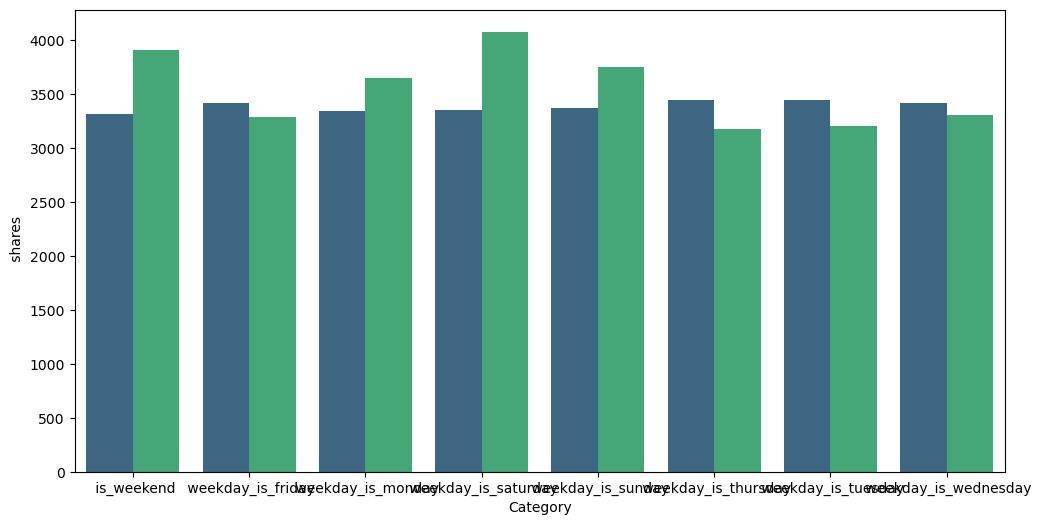

In [59]:

# List of columns for plotting
categorical_cols = [col for col in df1.columns if col.startswith(' weekday_')] + [' is_weekend']


# Melt the DataFrame for easier plotting
df1_melted = df1.melt(id_vars=[' shares'], value_vars=categorical_cols, 
                     var_name='Category', value_name='Value')

# Calculate the average number of shares per category and value (0 or 1)
avg_shares = df1_melted.groupby(['Category', 'Value'])[' shares'].mean().reset_index()

# Plot a bar plot with hue for 'Value' (0 or 1)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_shares, x='Category', y=' shares', hue='Value', palette="viridis")

# Customize plot labels and title
plt.title("Effect of Categorical Variables on Number of Shares")
plt.xlabel("Category")
plt.ylabel("Average Number of Shares")
plt.legend(title="Value (0 or 1)")

plt.show()

#### Insights:
For is_weekend, articles published on the weekend (green bar) have a slightly higher average number of shares than those published on weekdays.
For individual weekdays, it appears that:

a. Articles published on Saturdays have a relatively higher average number of shares.

b. Other weekdays show less variation in the average number of shares between published (1) and non-published (0) days.

This plot helps us understand how publication day (weekday or weekend) correlates with the average number of shares, which could indicate when articles tend to perform better on social media.

AttributeError: 'numpy.float64' object has no attribute 'startswith'

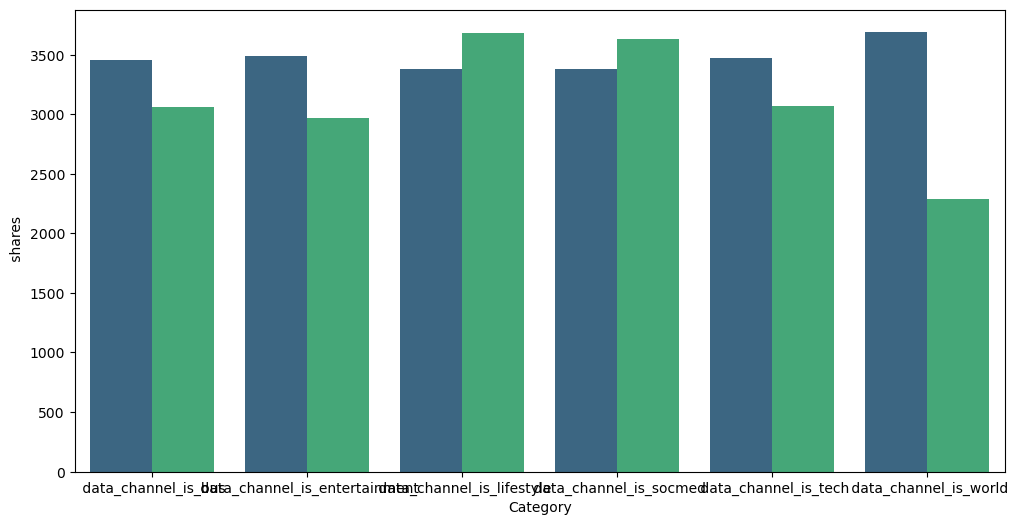

In [62]:
# List of columns for plotting
categorical_cols = [col for col in df.columns if col.startswith(' data_channel_')] 


# Melt the DataFrame for easier plotting
df1_melted = df1.melt(id_vars=[' shares'], value_vars=categorical_cols, 
                     var_name='Category', value_name='Value')

# Calculate the average number of shares per category and value (0 or 1)
avg_shares = df1_melted.groupby(['Category', 'Value'])[' shares'].mean().reset_index()

# Plot a bar plot with hue for 'Value' (0 or 1)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_shares, x='Category', y=' shares', hue='Value', palette="viridis")

# Customize plot labels and title
plt.title("Effect of Categorical Variables on Number of Shares")
plt.xlabel("Category")
plt.ylabel("Average Number of Shares")
plt.legend(title="Value (0 or 1)")

plt.show()

The bar plot shows the average number of shares for news articles based on the different data channels, such as 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_socmed' (social media), 'data_channel_is_tech' (technology), and 'data_channel_is_world'.

Here's what each part indicates:

Categories on X-axis: The X-axis shows different data channels, each indicating whether an article belongs to a specific channel (1) or not (0).

Bar Heights (Y-axis): The Y-axis shows the average number of shares for articles in each category (channel).

Colors (Hue for "Value (0 or 1)"):

Dark blue (0) represents articles that do not belong to the specific data channel. Green (1) represents articles that belong to the specific data channel.

Insights: For most channels, articles that do not belong to the channel (Value 0) have a higher average number of shares than those that do (Value 1). The 'data_channel_is_lifestyle' and 'data_channel_is_socmed' categories have relatively similar average shares whether articles belong to those channels or not. The 'data_channel_is_world' category shows a notable difference, where articles not classified as "world" have significantly more shares on average than those in the "world" category. This plot helps you understand how the data channel affects the number of shares, potentially indicating which channels might receive more engagement on average.

### Otlier detection and handling

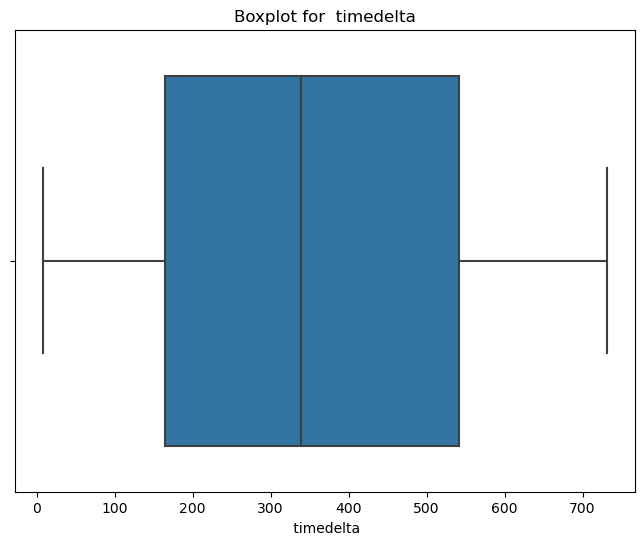

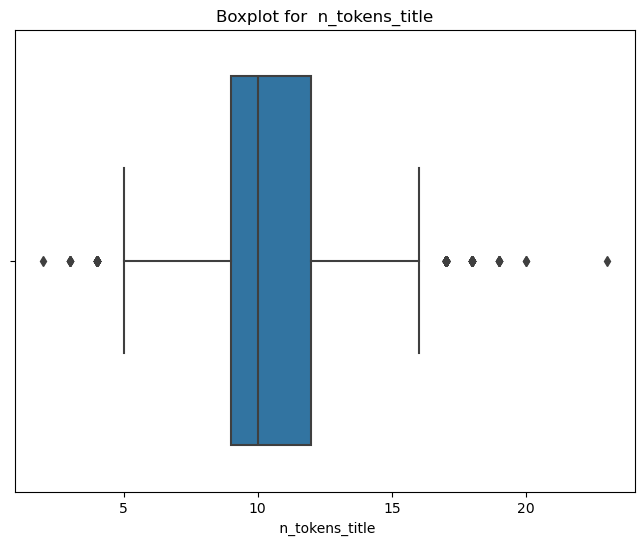

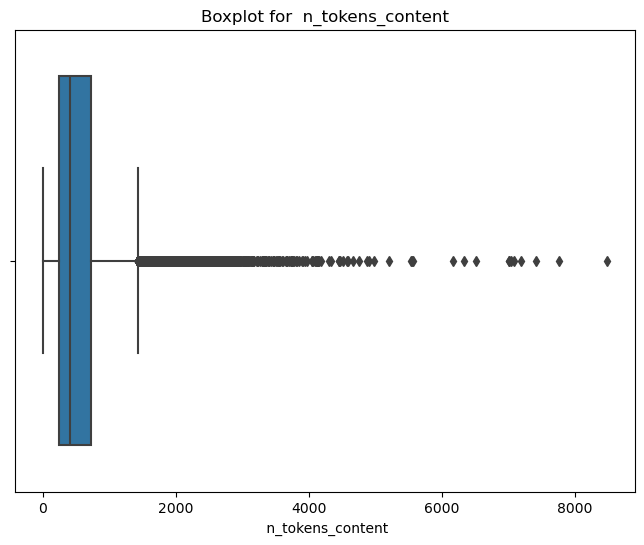

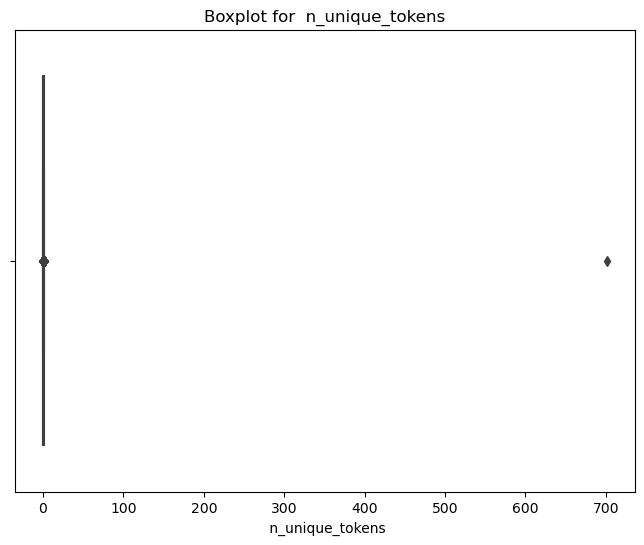

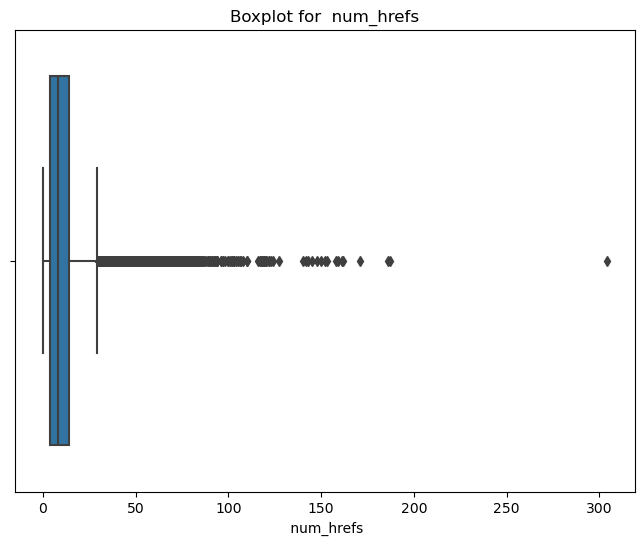

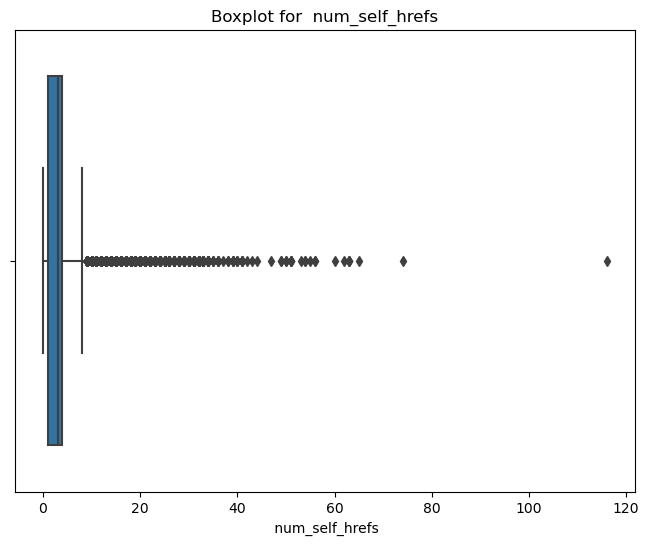

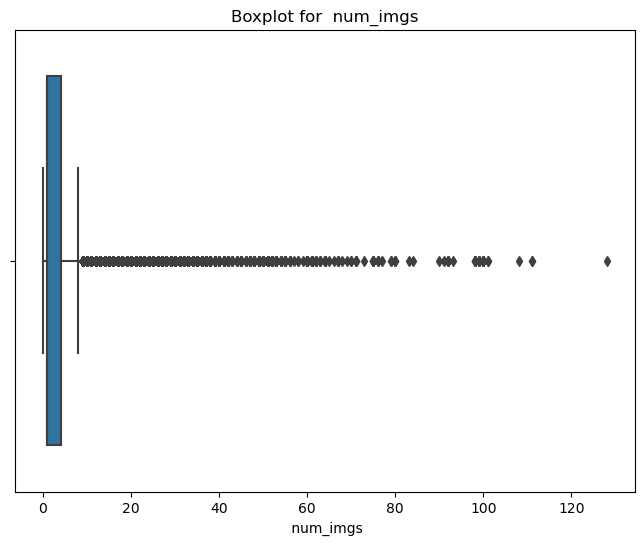

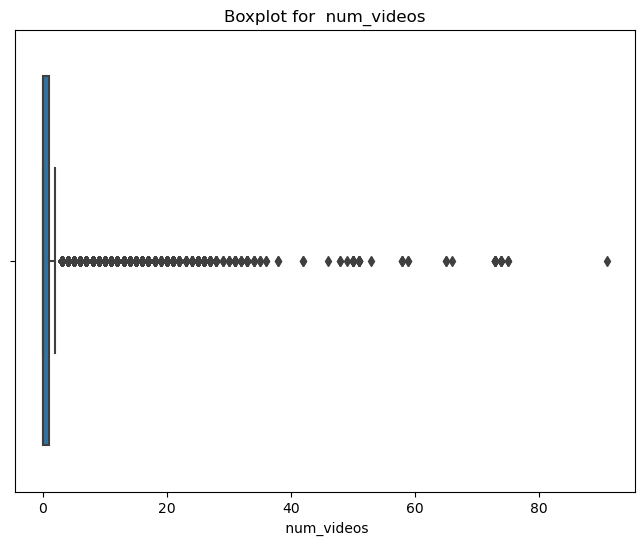

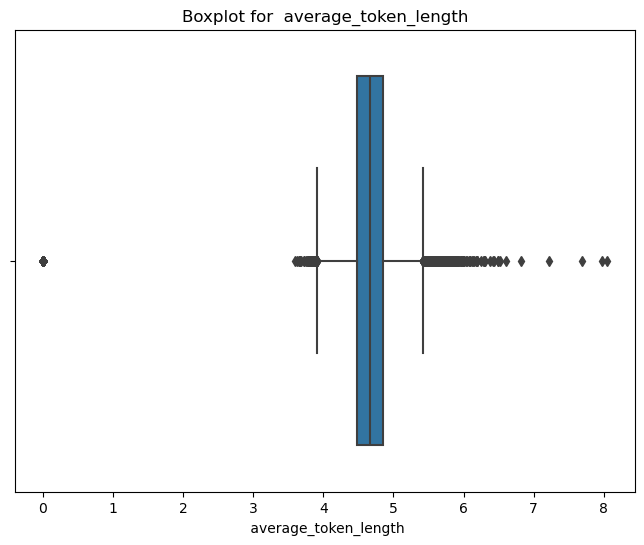

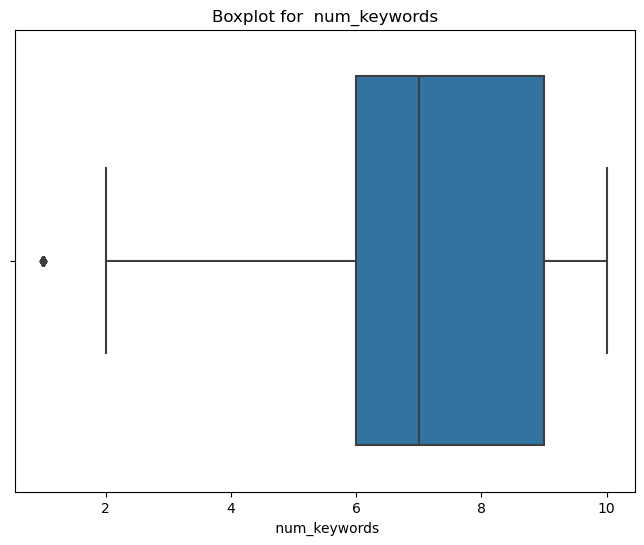

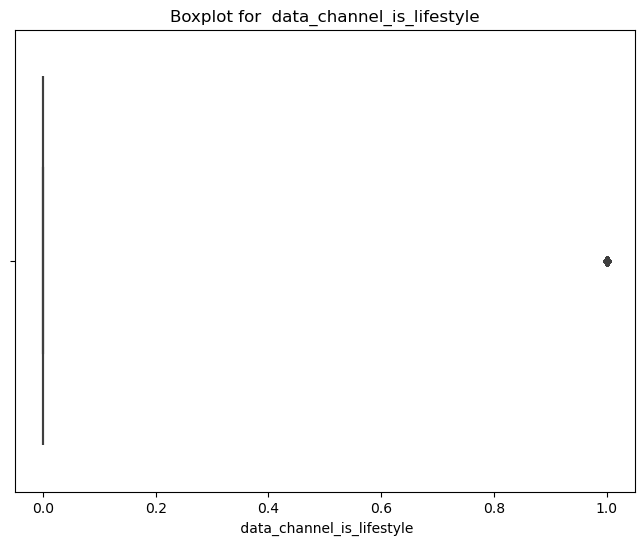

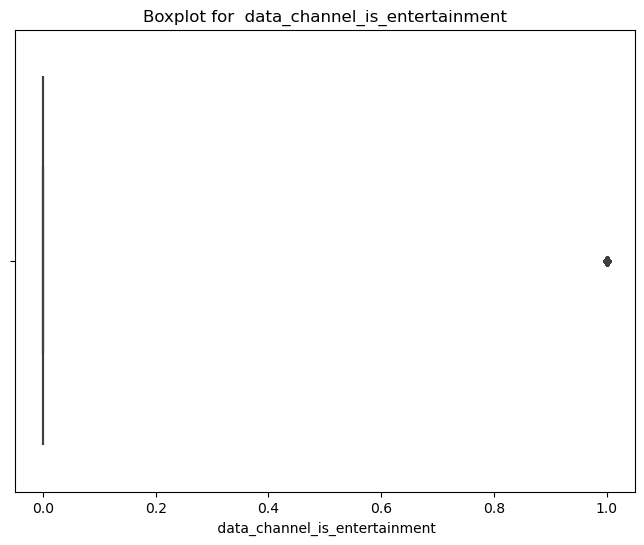

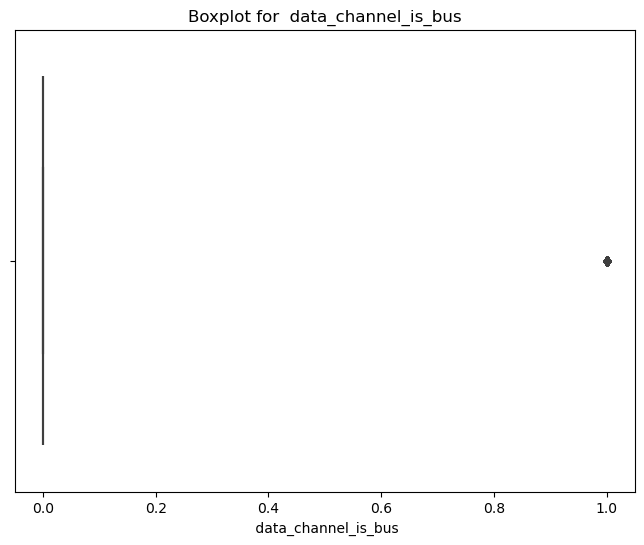

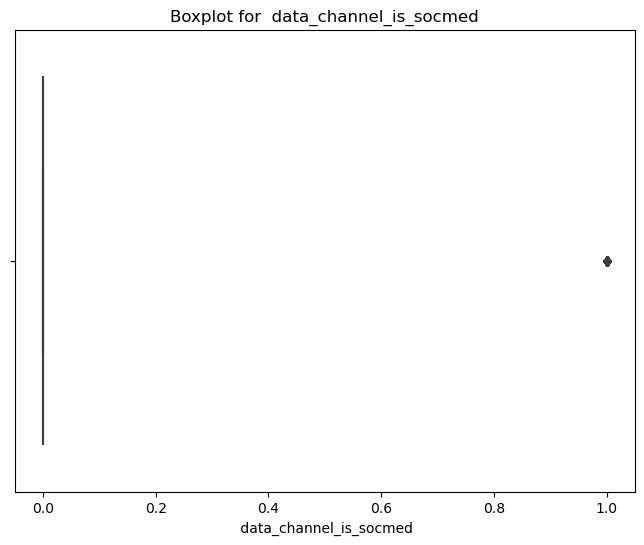

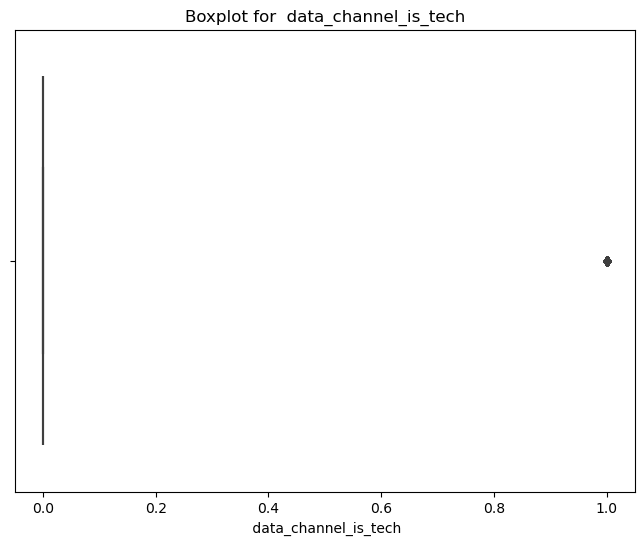

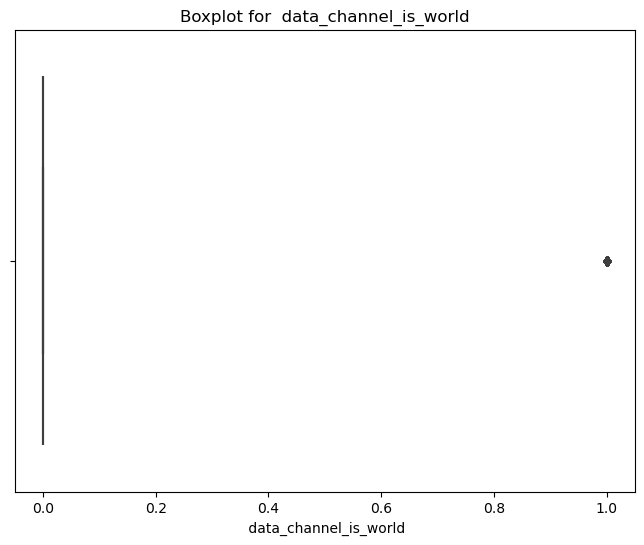

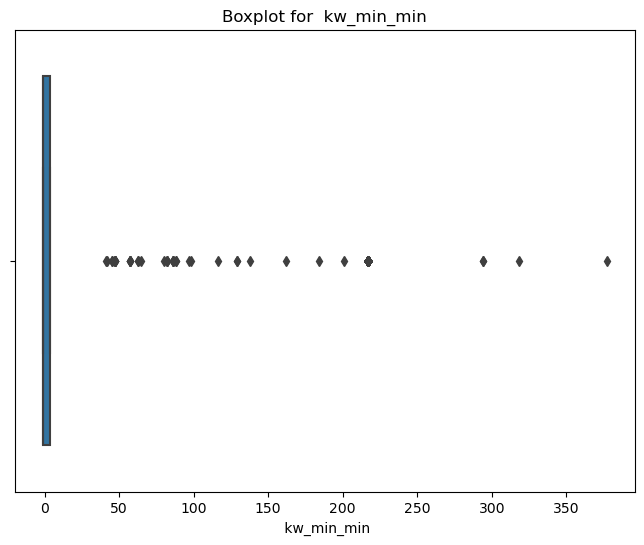

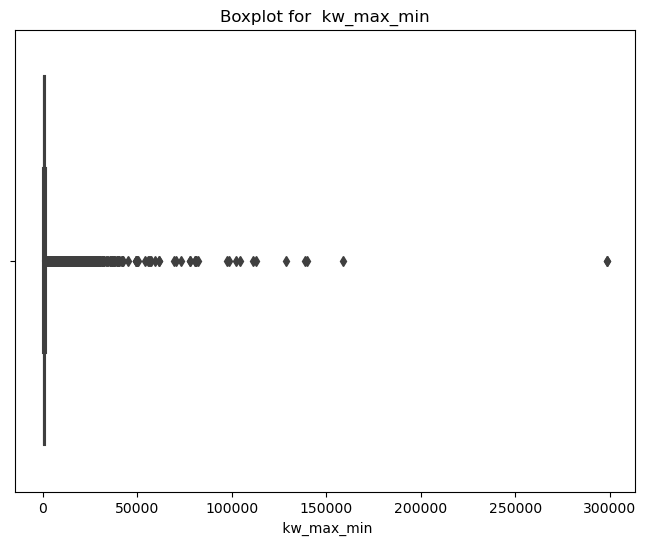

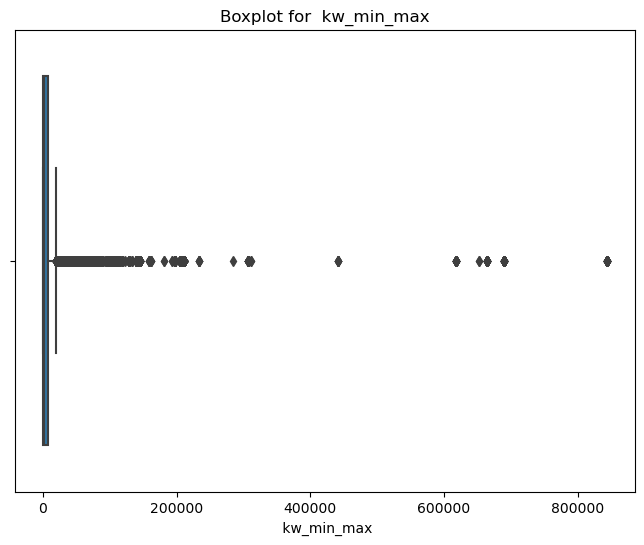

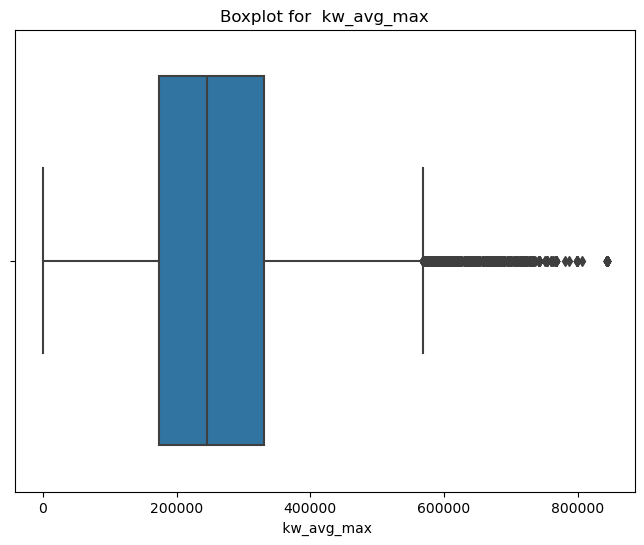

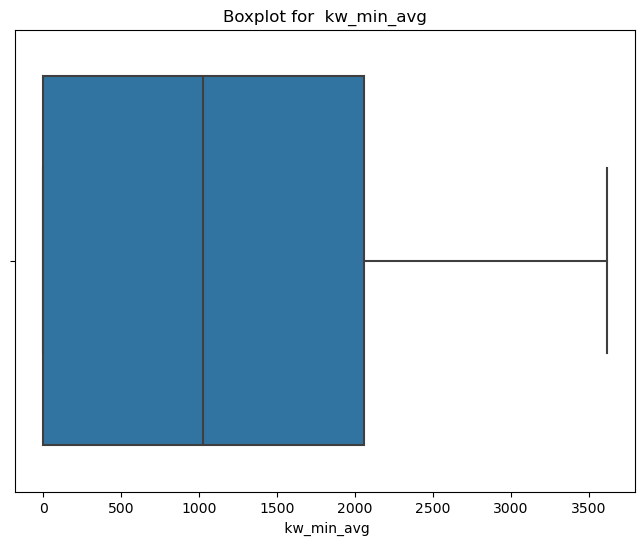

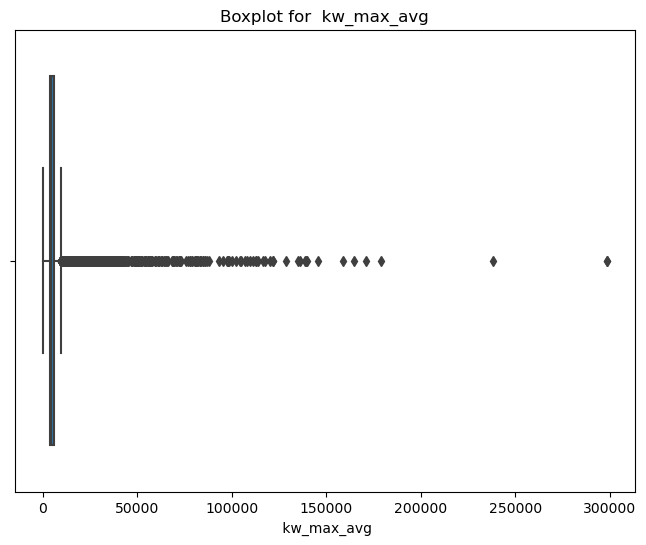

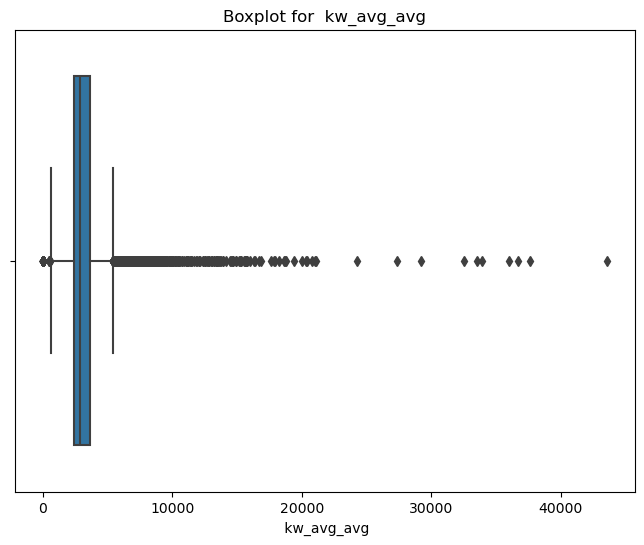

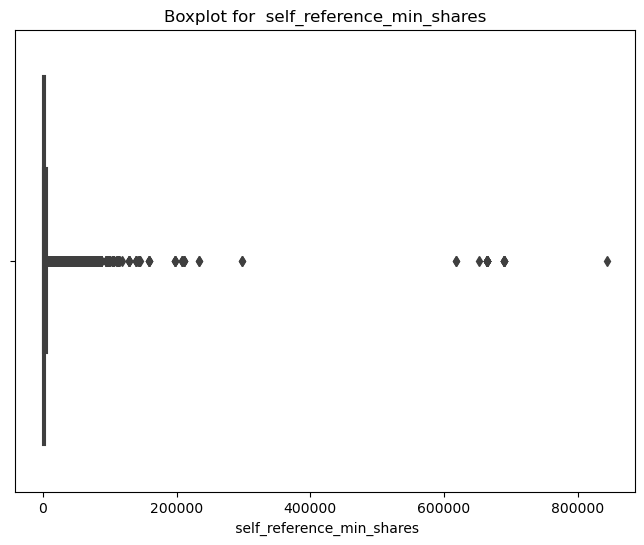

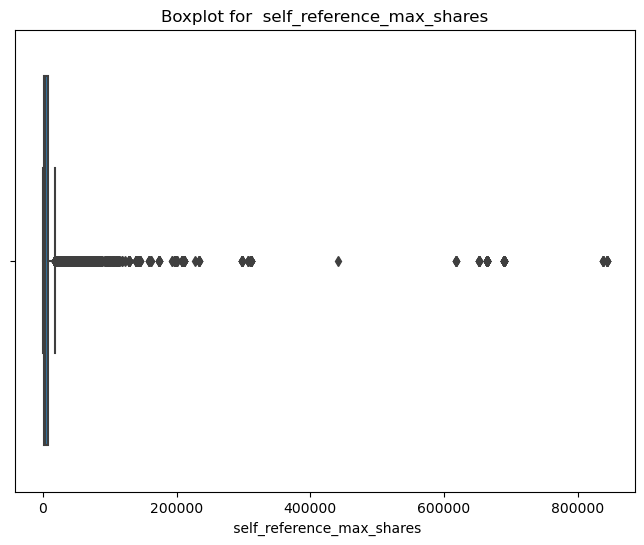

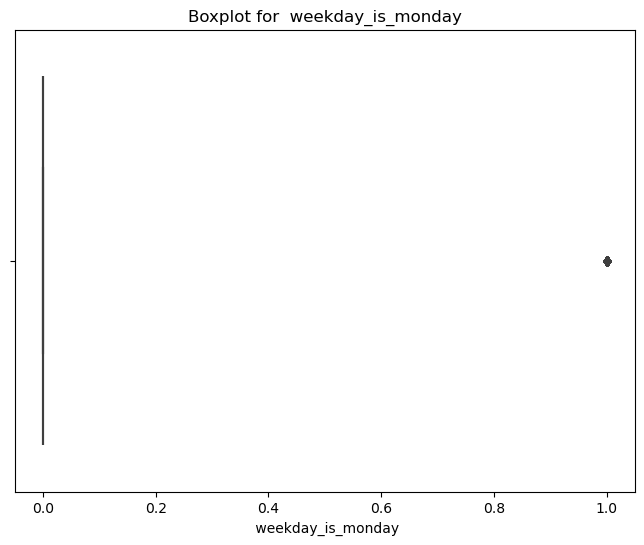

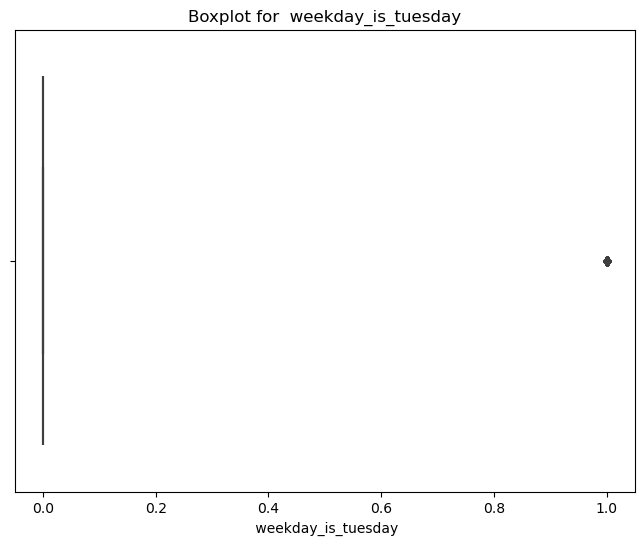

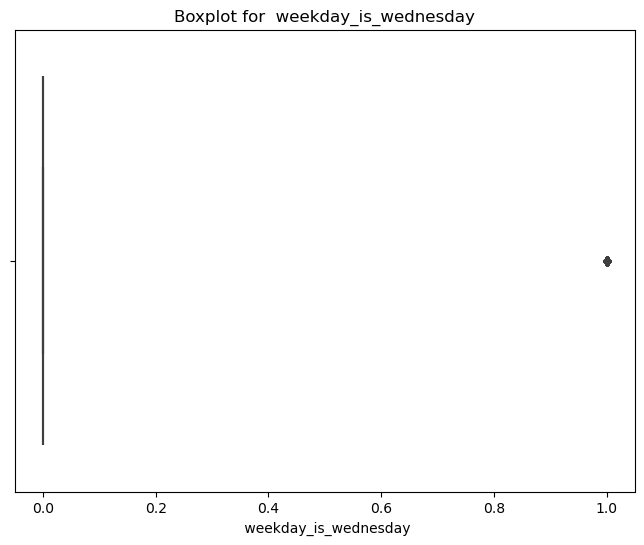

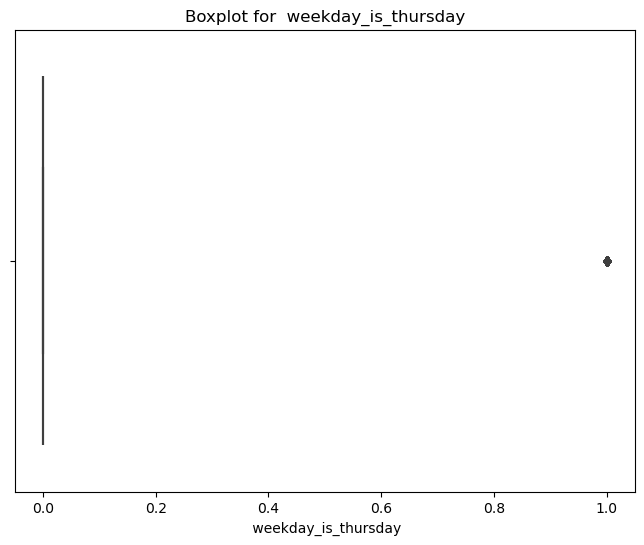

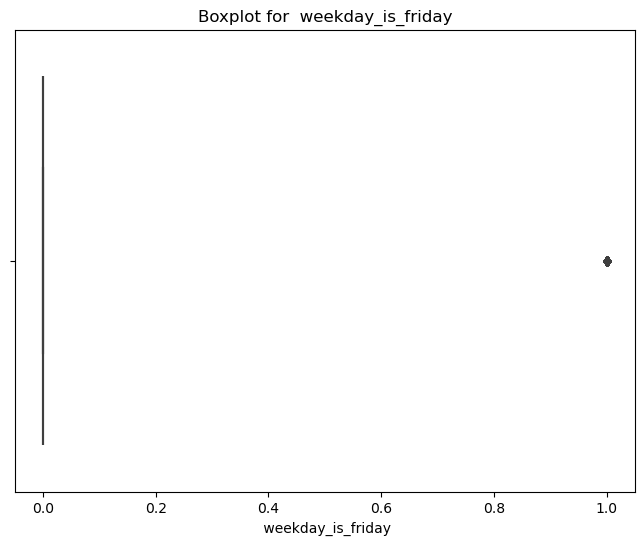

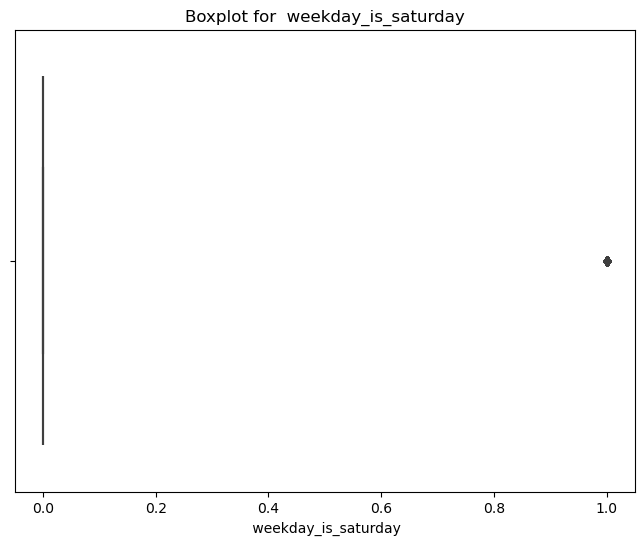

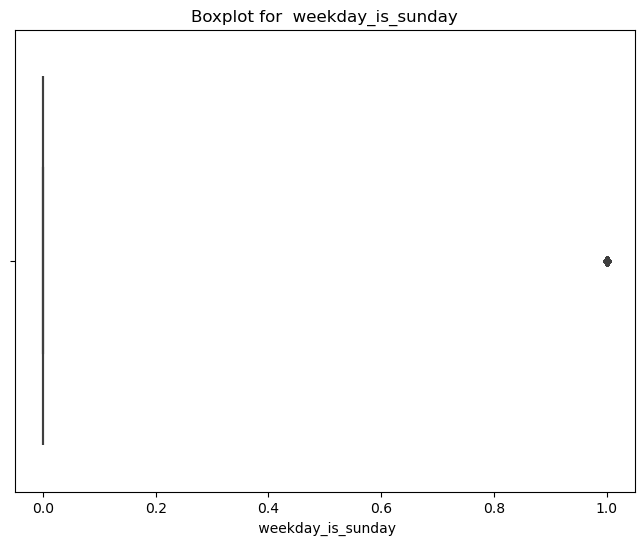

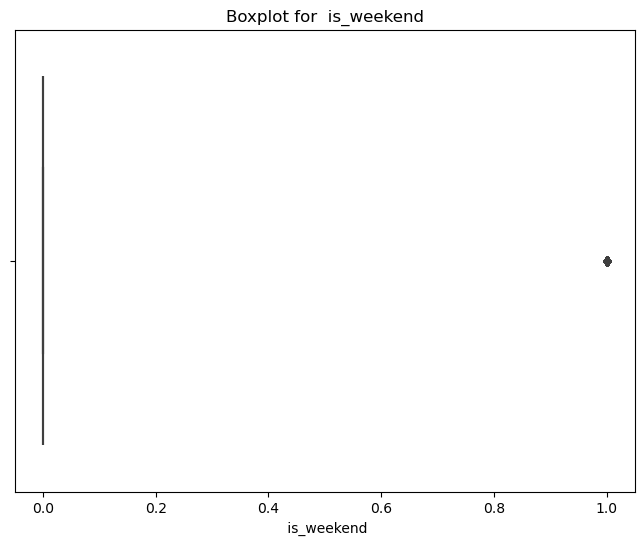

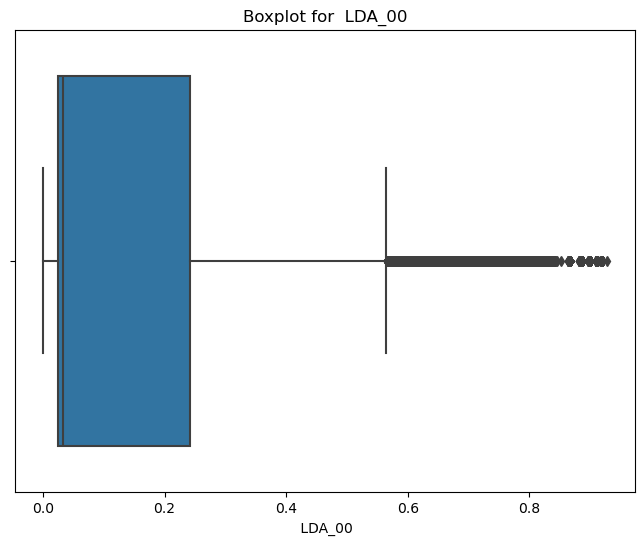

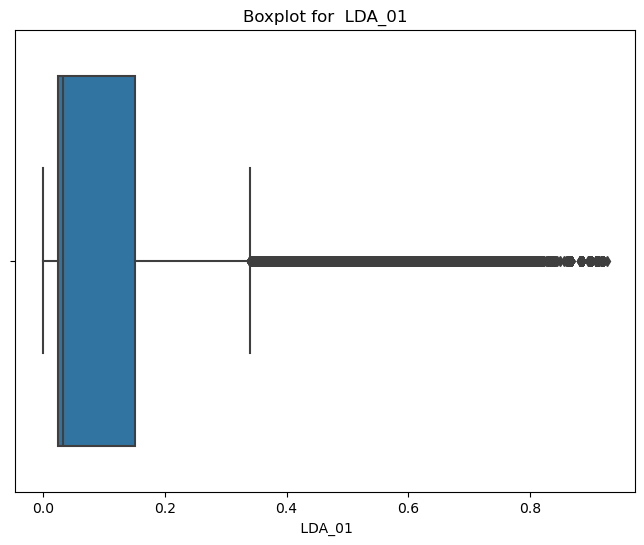

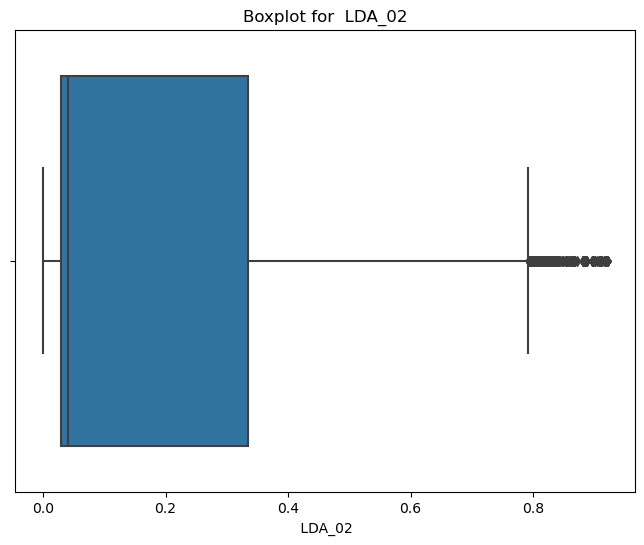

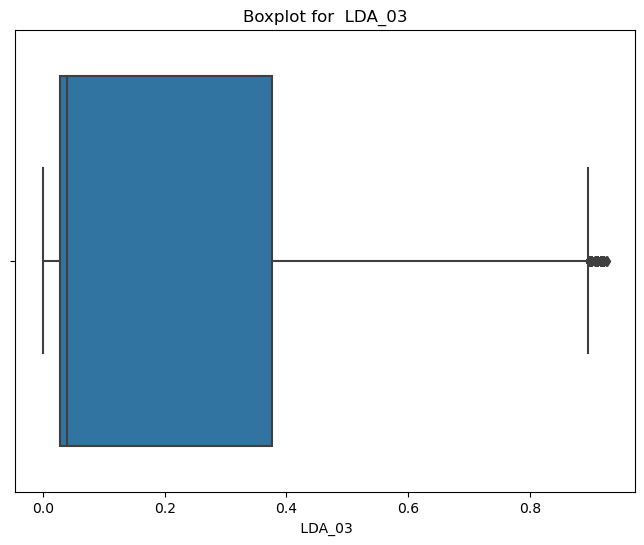

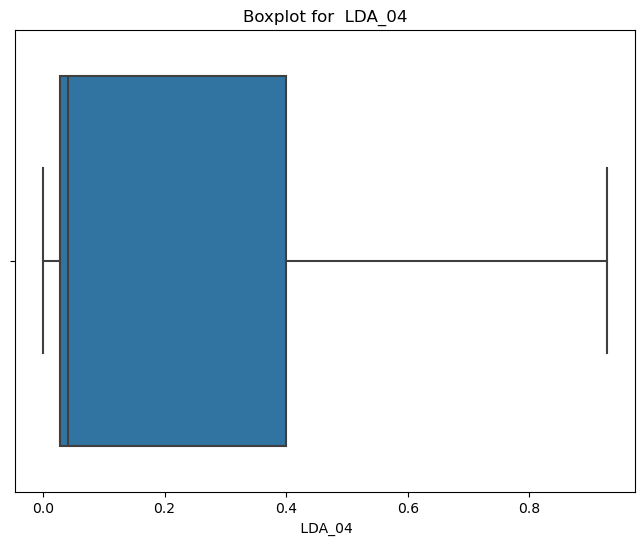

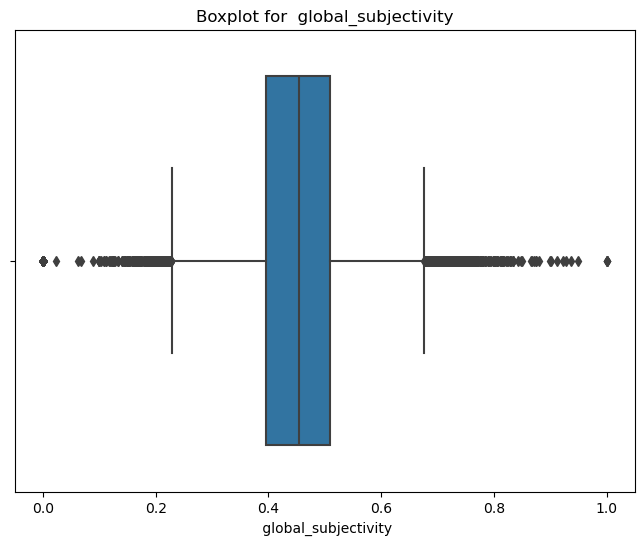

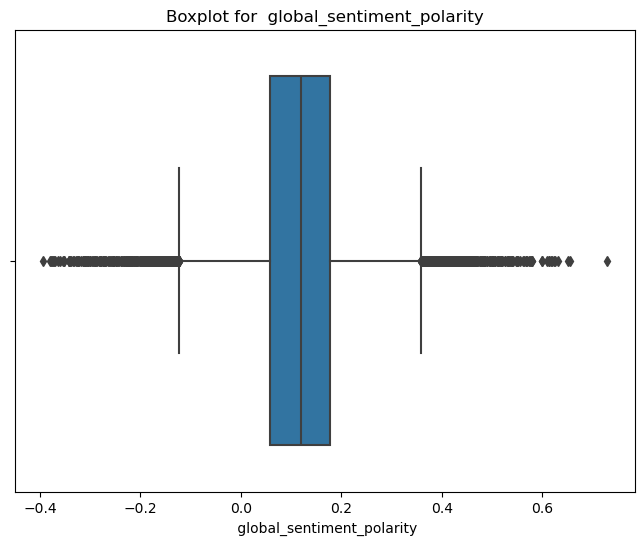

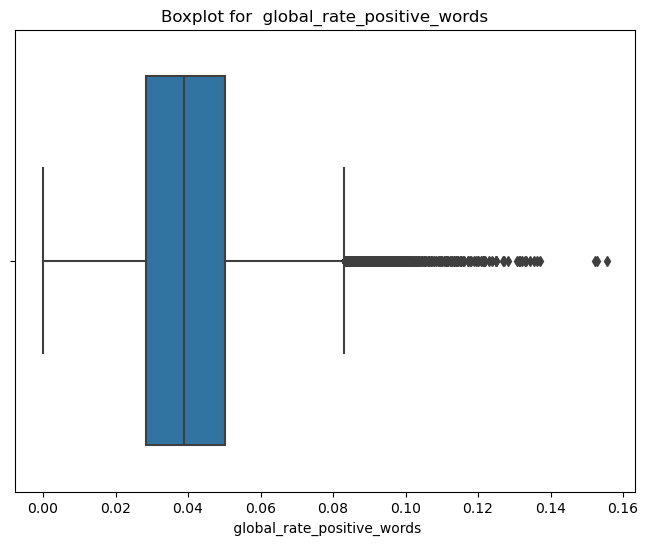

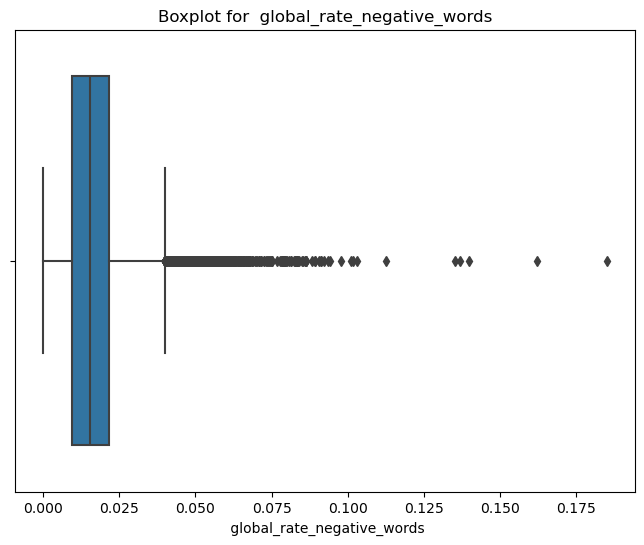

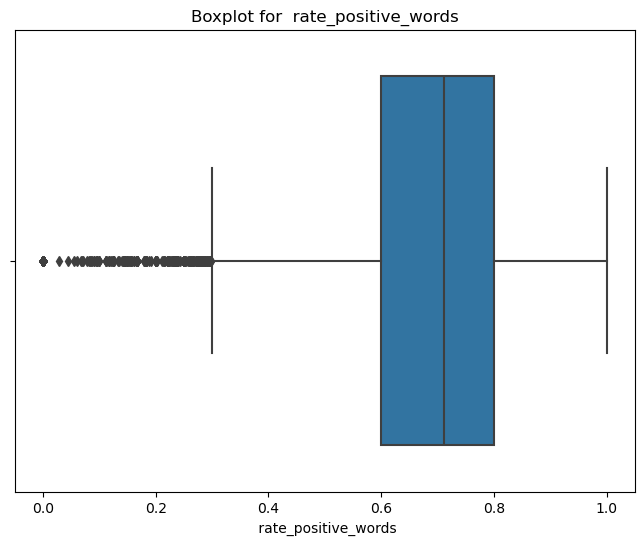

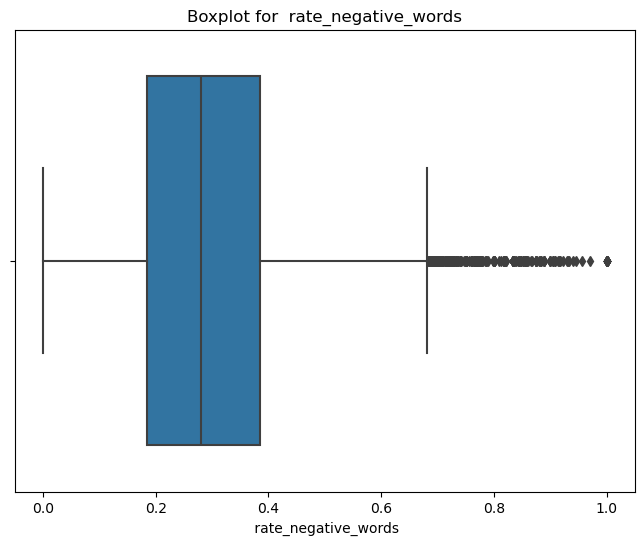

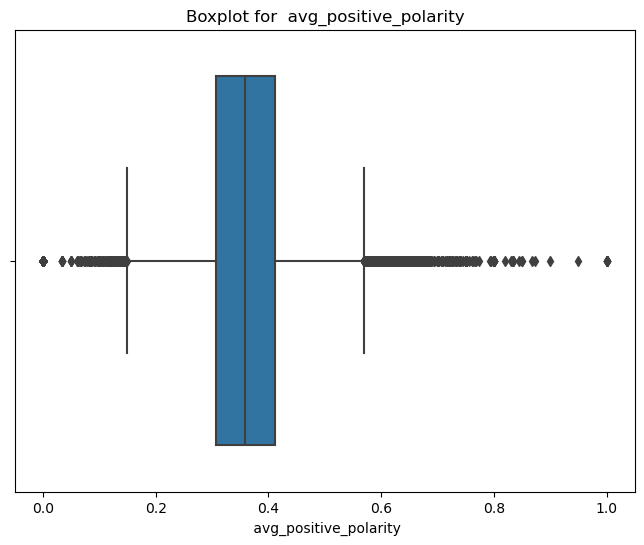

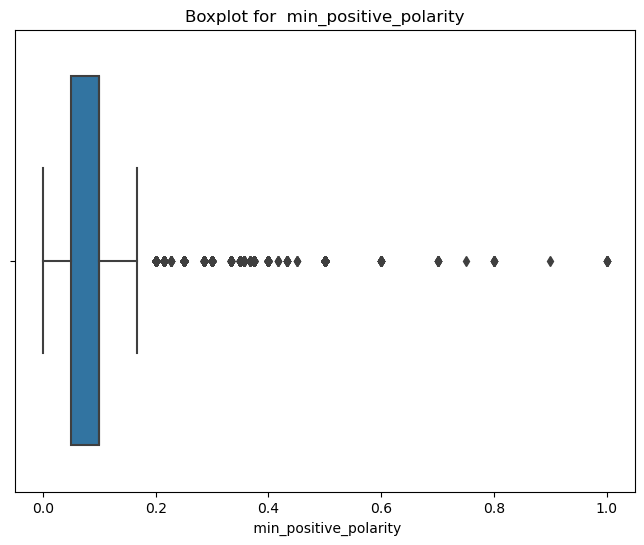

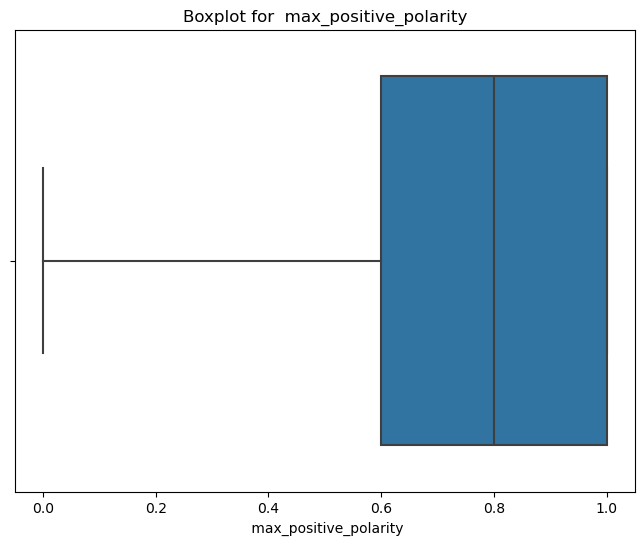

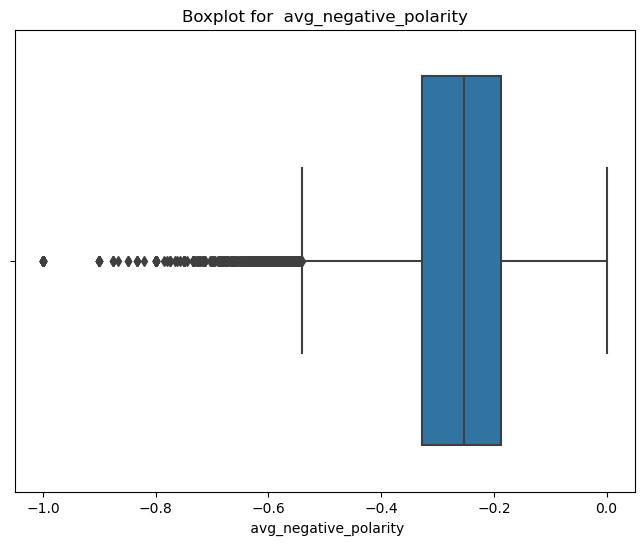

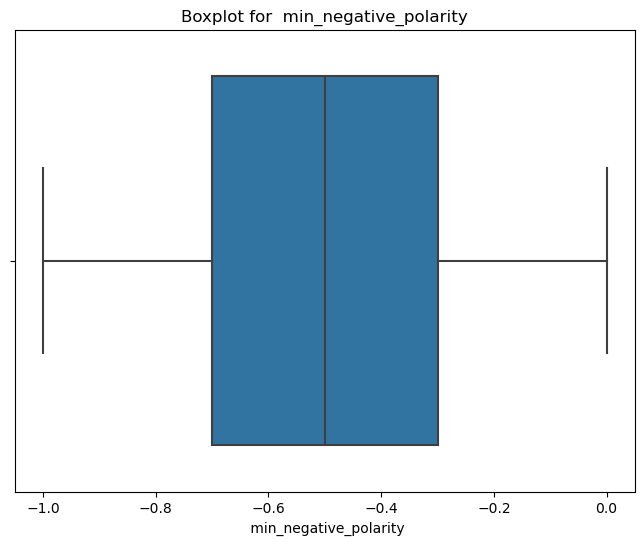

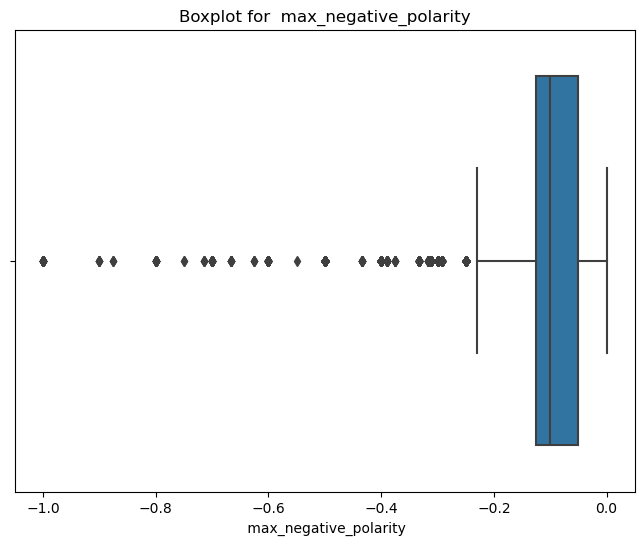

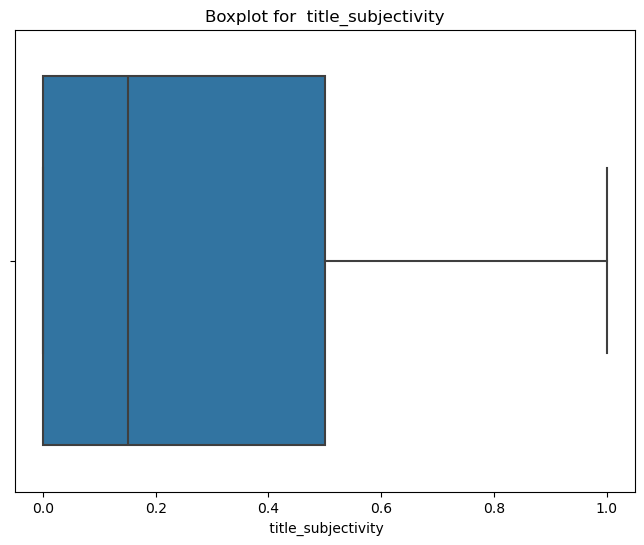

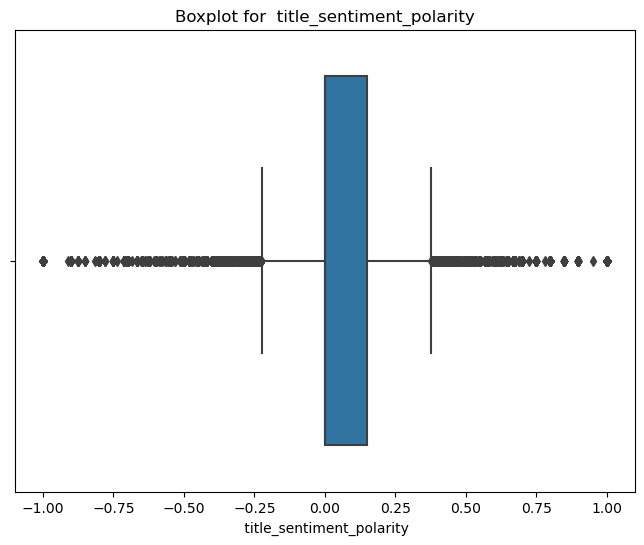

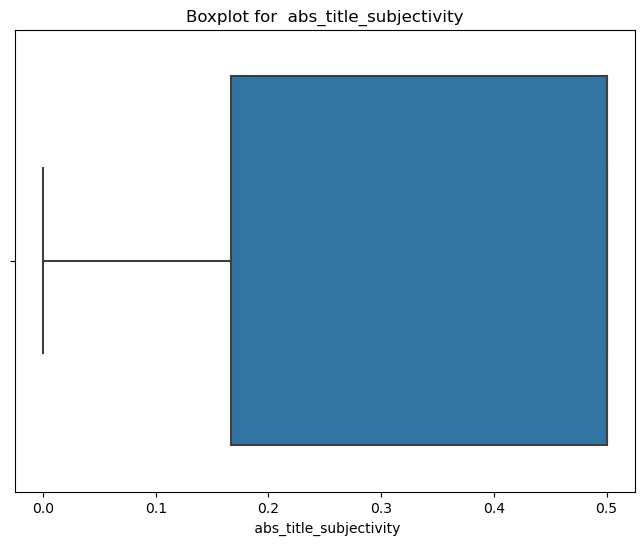

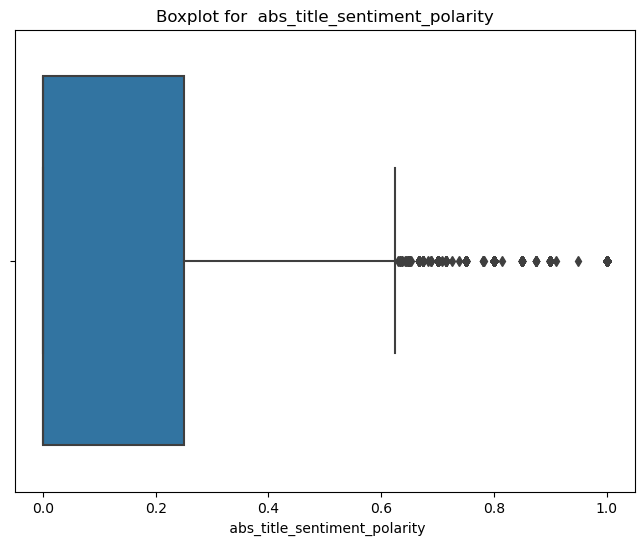

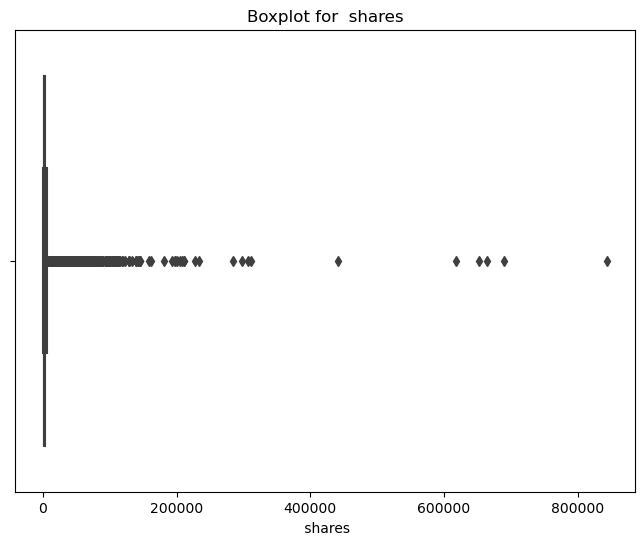

In [66]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df1):
    numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df1[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df1)

In [67]:
# Function to detect and impute outliers with median using the IQR method
def impute_outliers_with_median(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median of the column
        median_value = df1[col].median()
        df1[col] = np.where((df1[col] < lower_bound) | (df1[col] > upper_bound), median_value, df1[col])

    return df1

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df1_imputed = impute_outliers_with_median(df1, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with median:\n", df1_imputed.head())



print("Shape of dataset before imputing outliers:",df1.shape)
print("Shape of dataset after imputing outliers:",df1_imputed.shape)

Data after imputing outliers with median:
     timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0         4.0              2.0        1.0          0.0               4.680365   
1         3.0              1.0        1.0          0.0               4.913725   
2         3.0              1.0        1.0          0.0               4.393365   
3         9.0              0.0        1.0          0.0               4.404896   
4        19.0              3.0        1.0          0.0               4.682836   

    num_keywords  ...   min_positive_polari

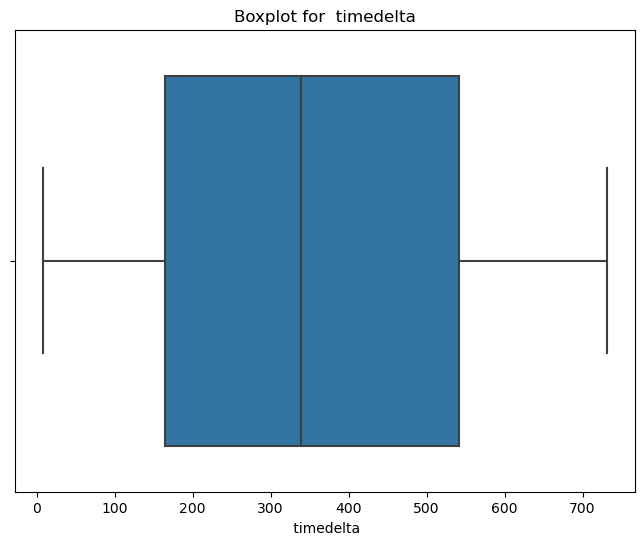

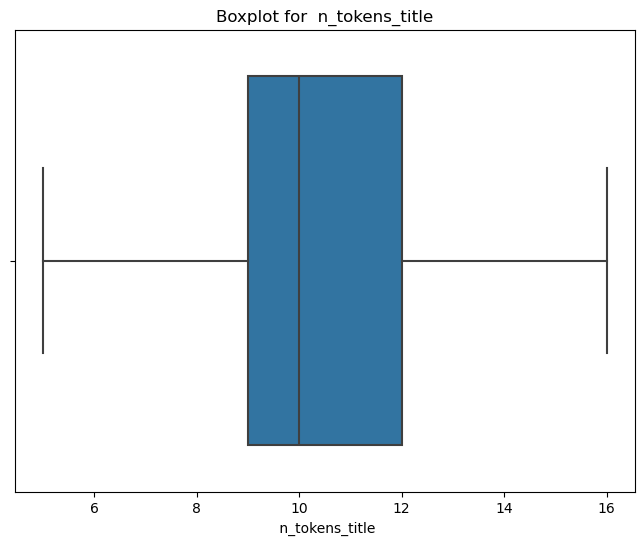

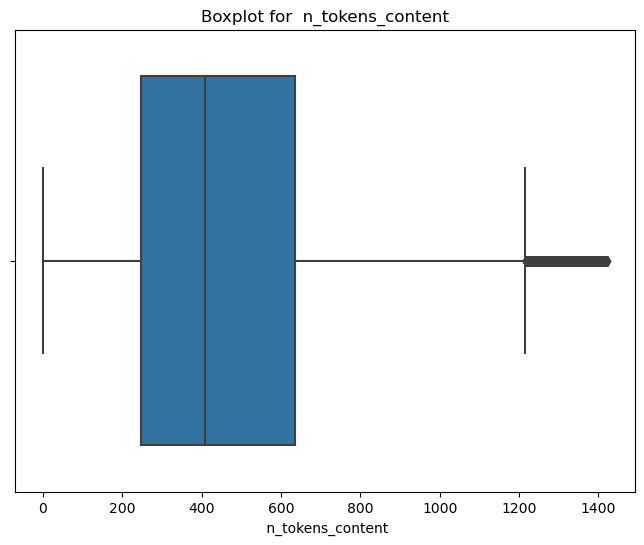

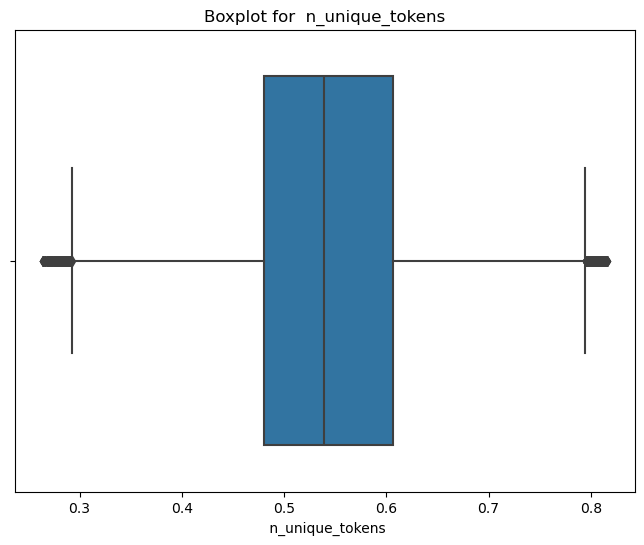

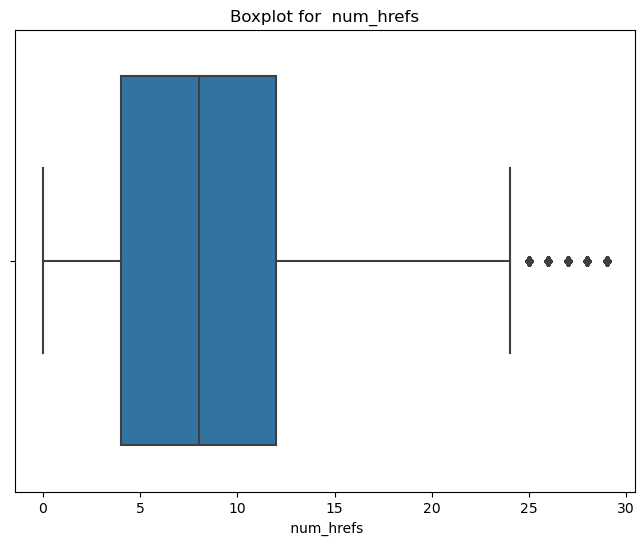

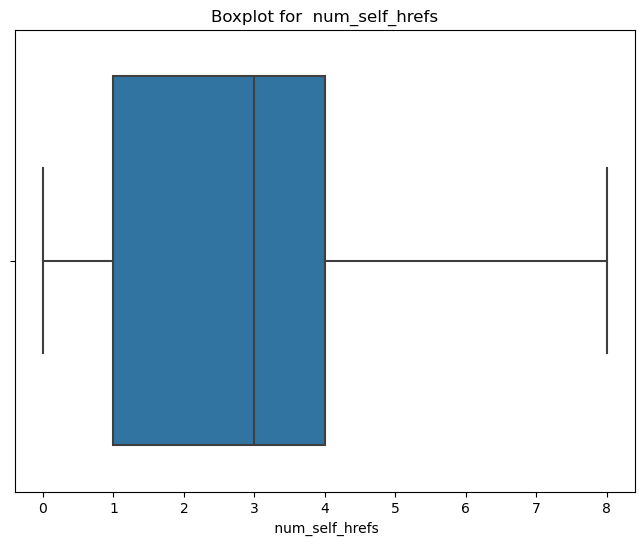

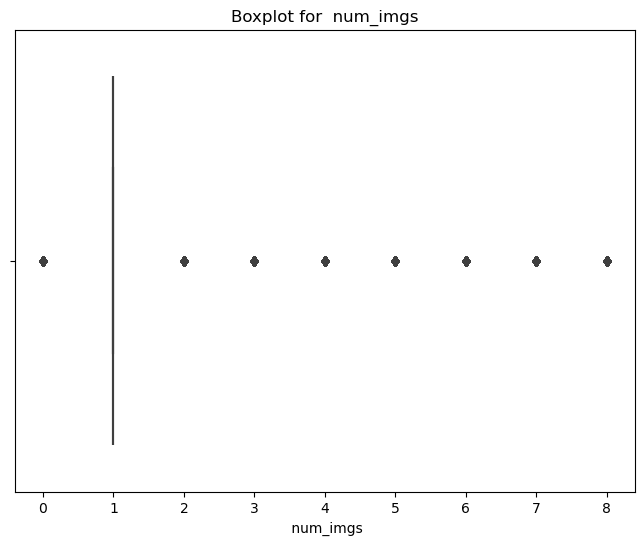

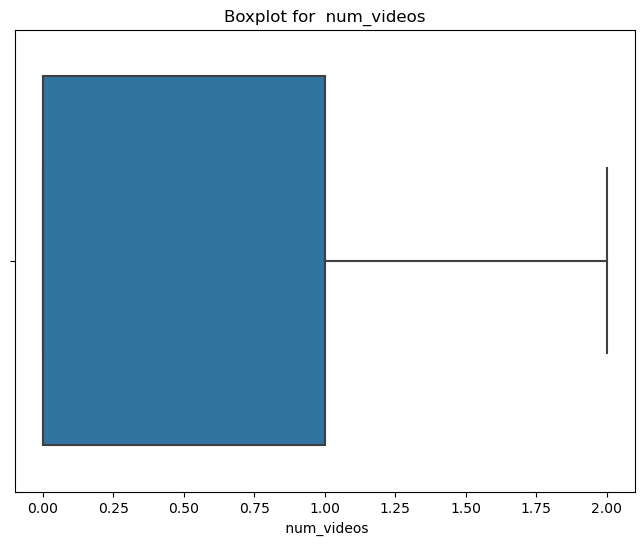

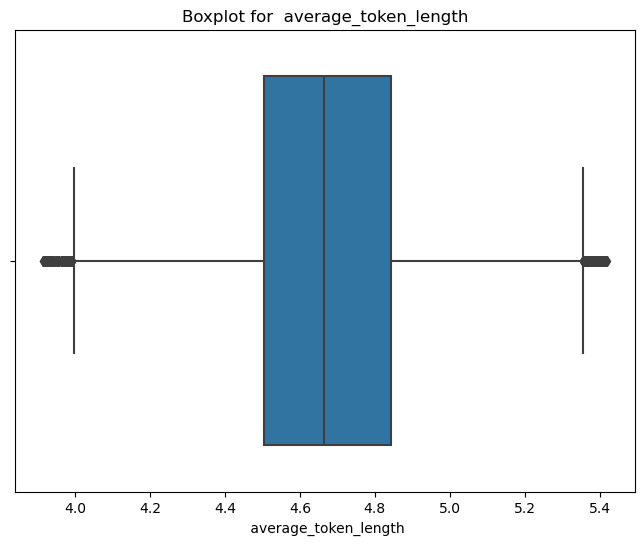

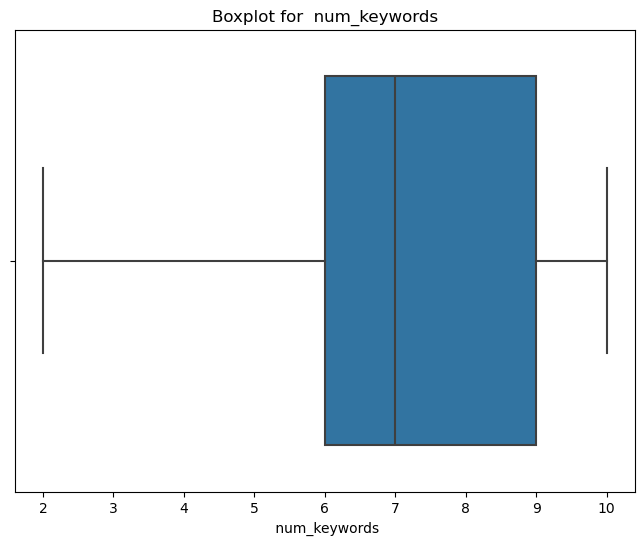

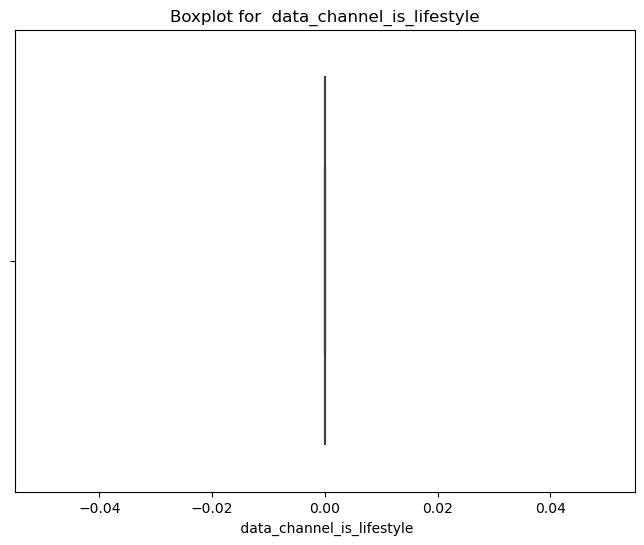

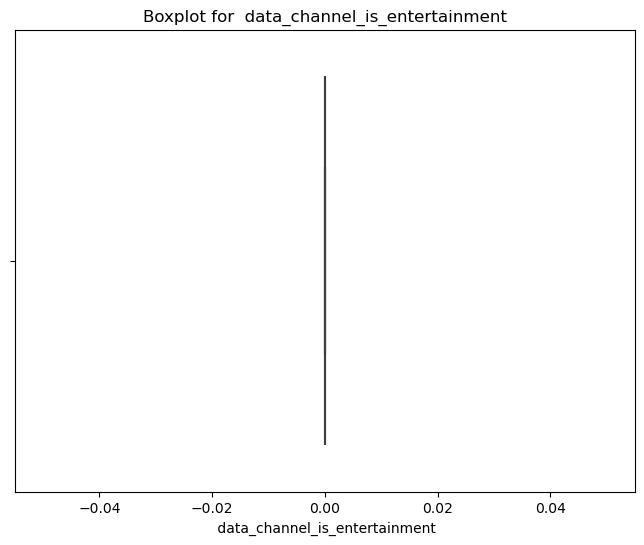

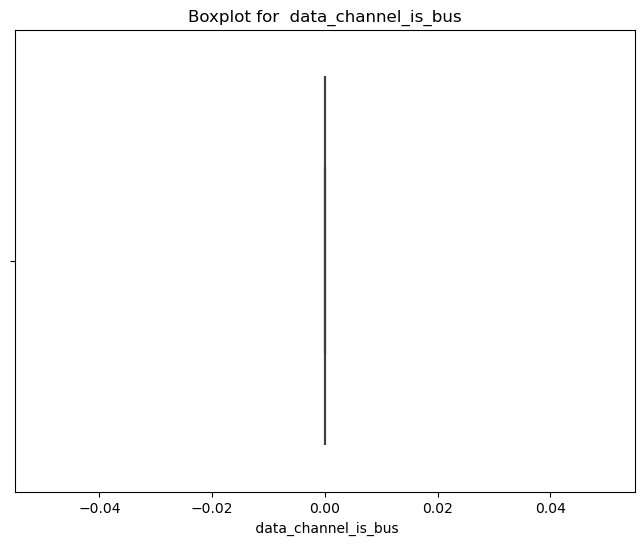

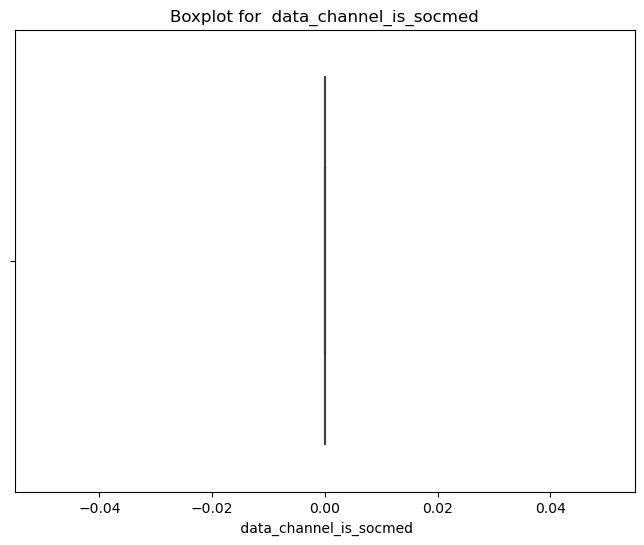

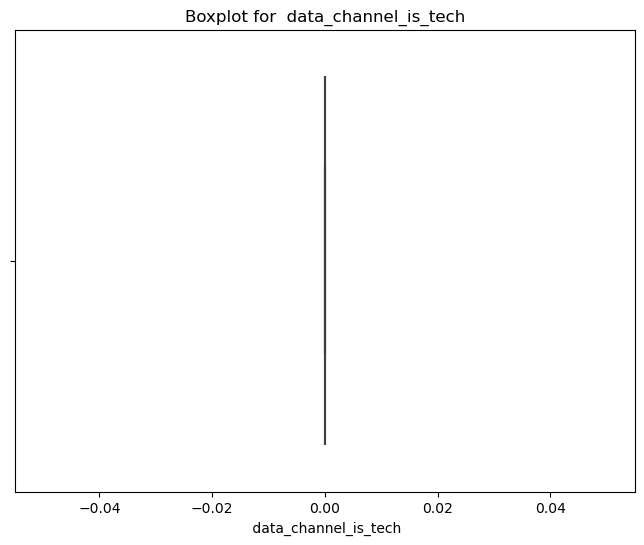

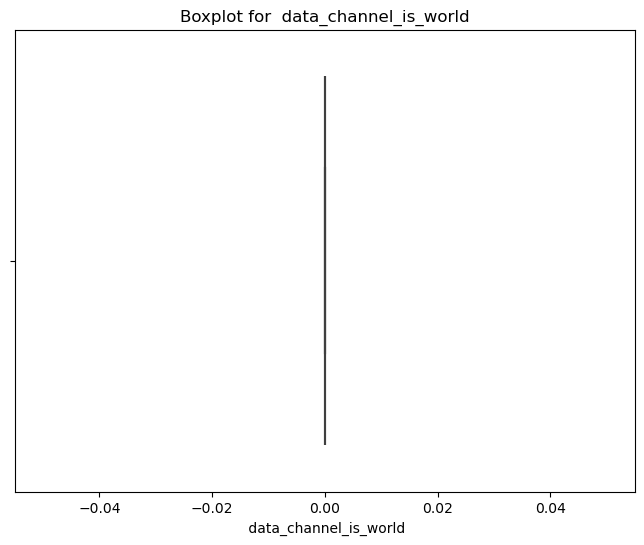

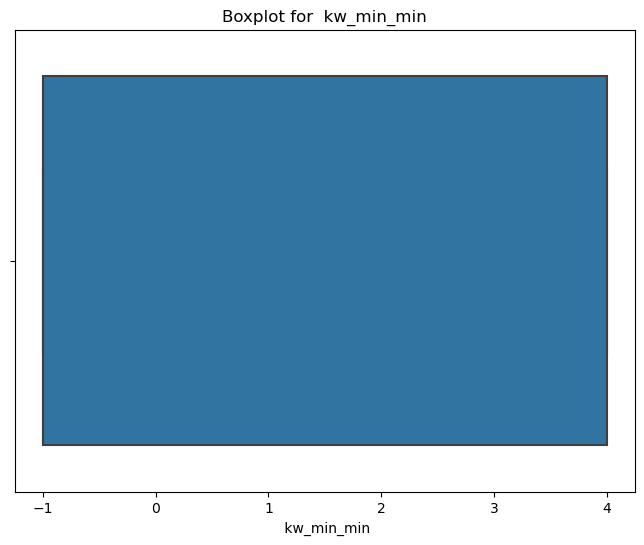

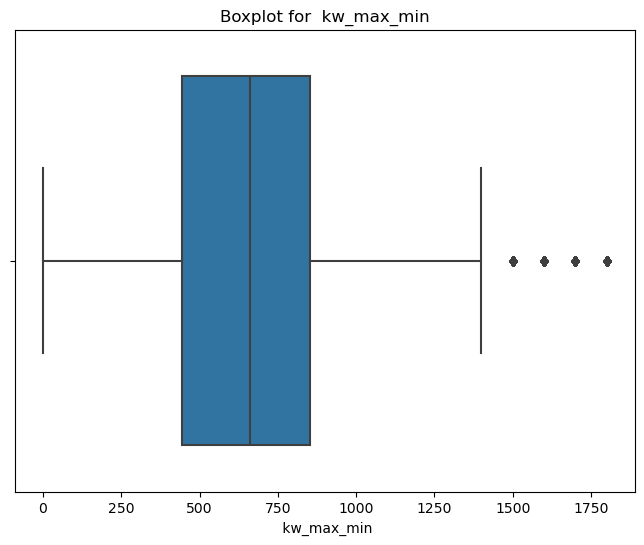

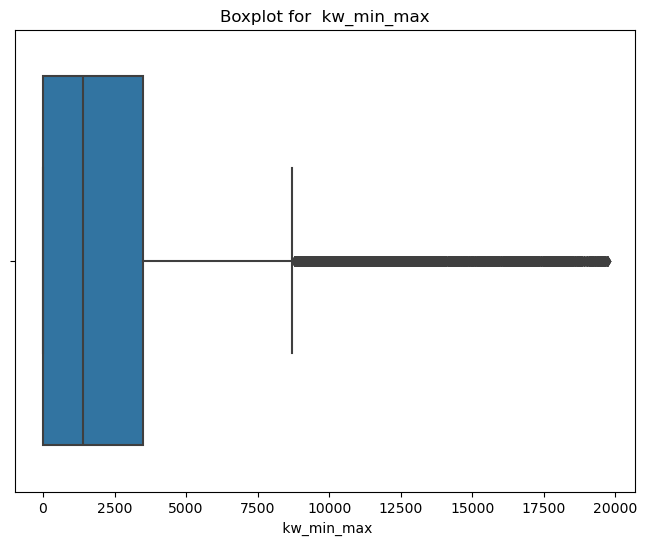

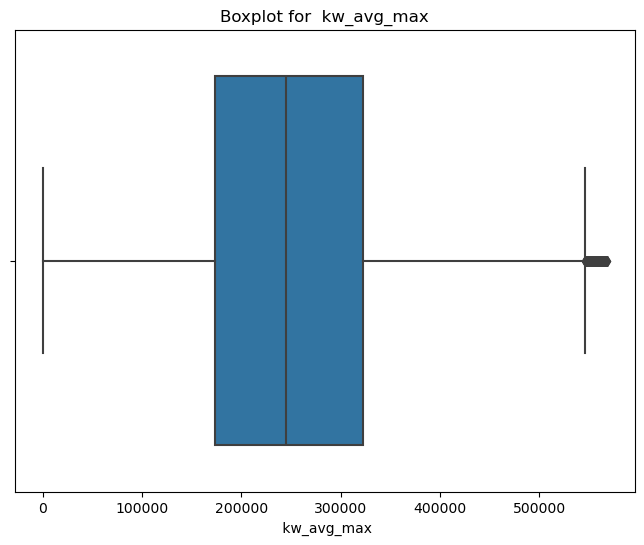

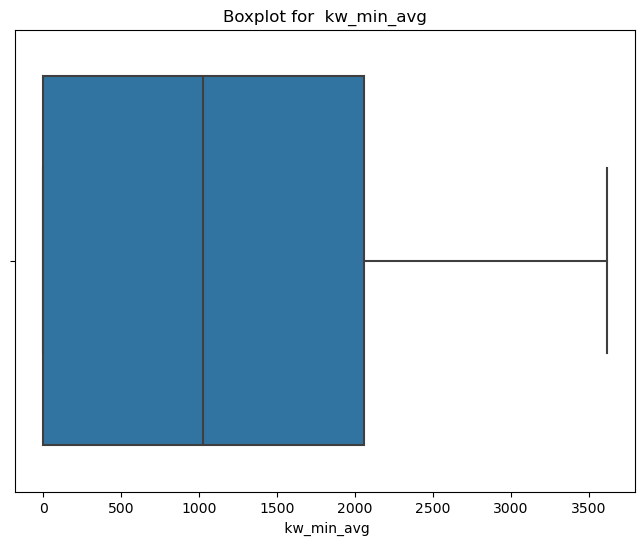

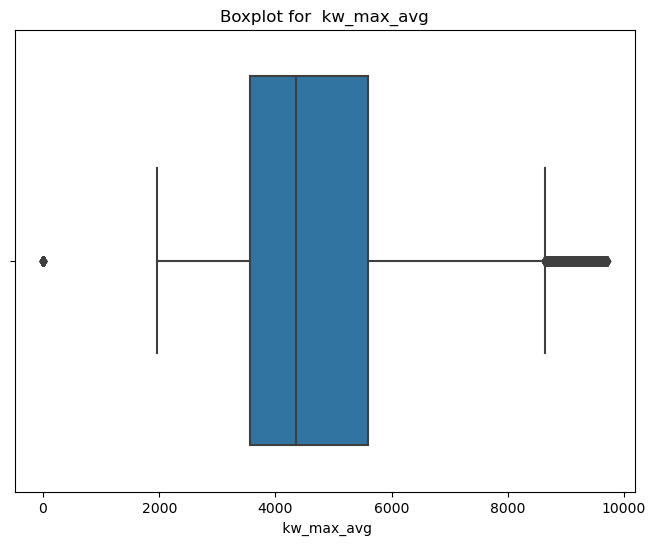

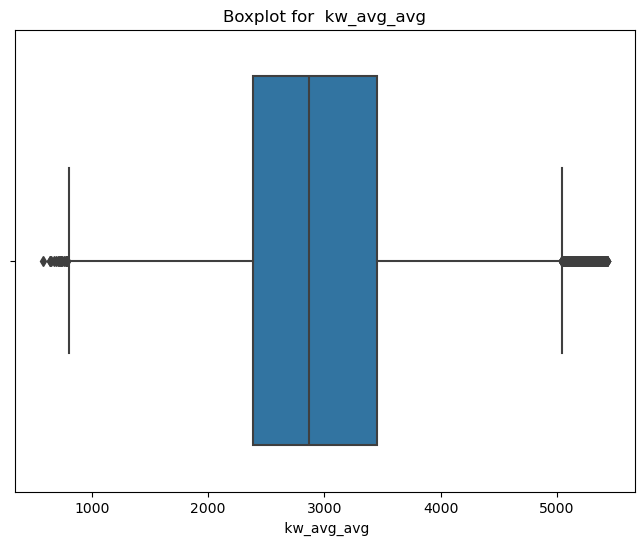

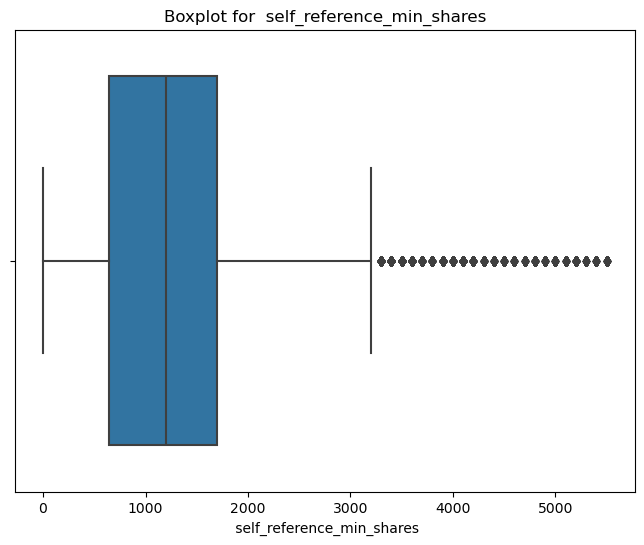

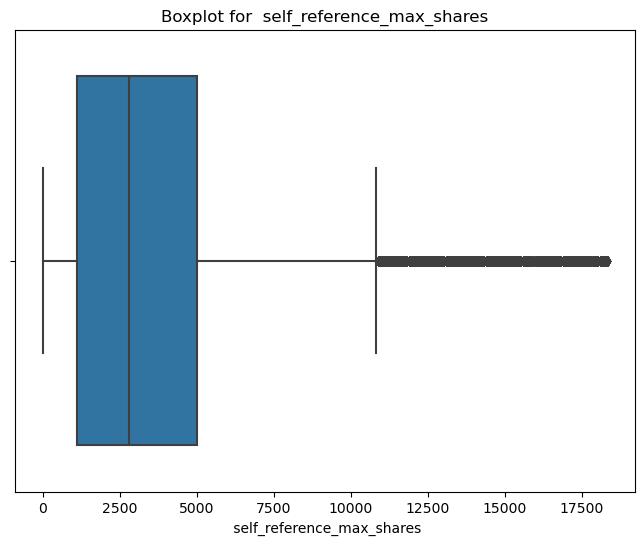

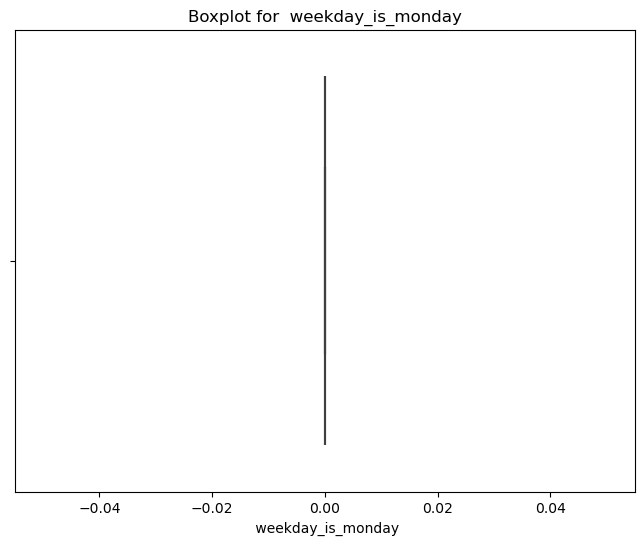

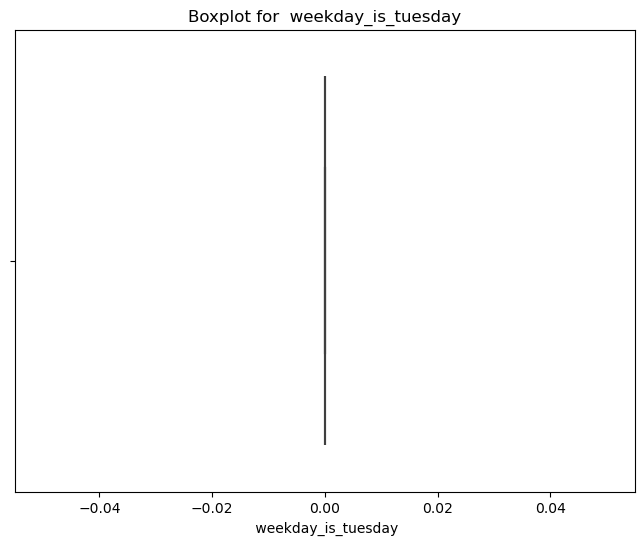

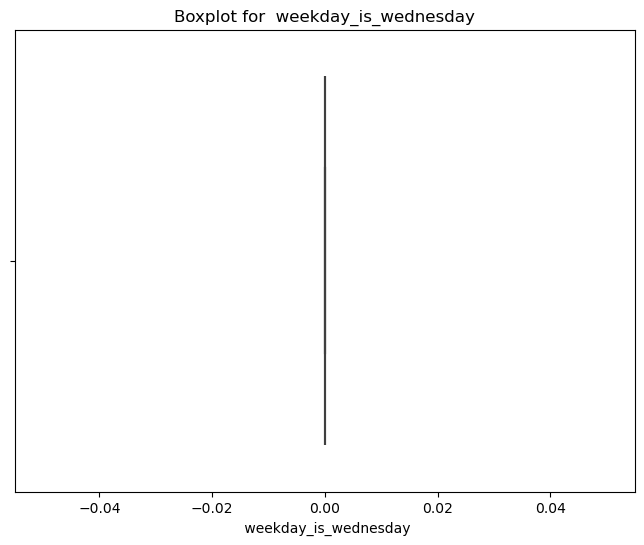

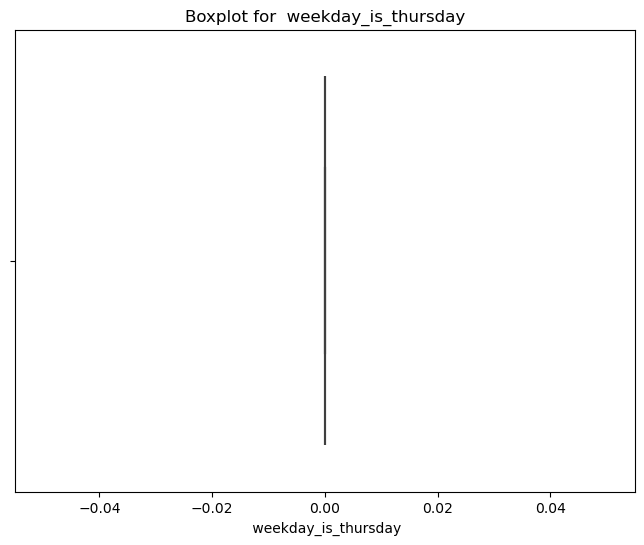

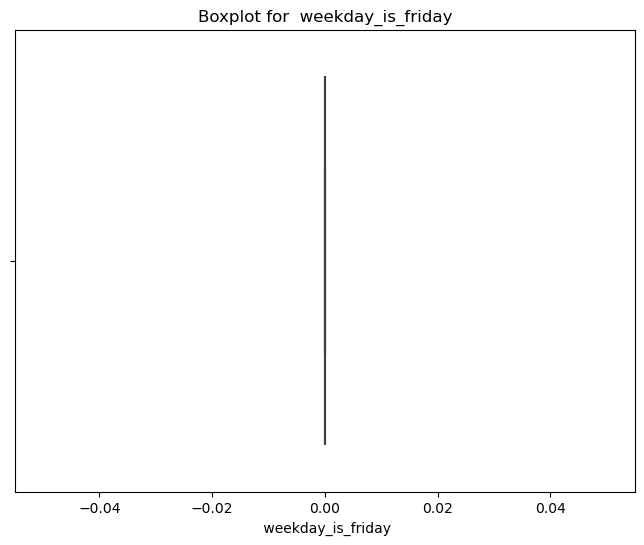

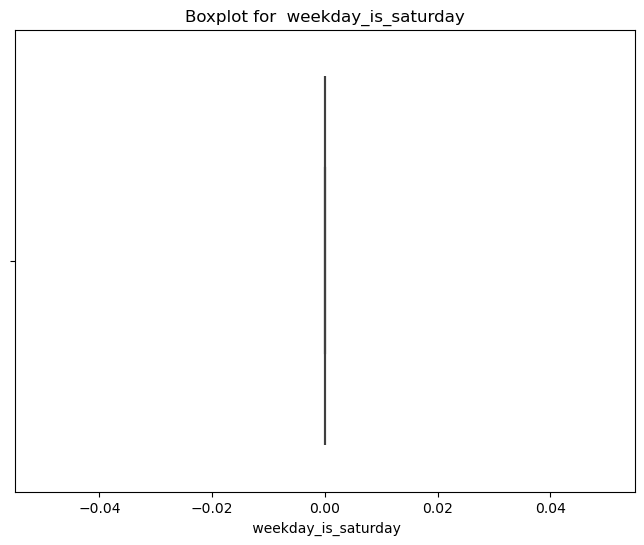

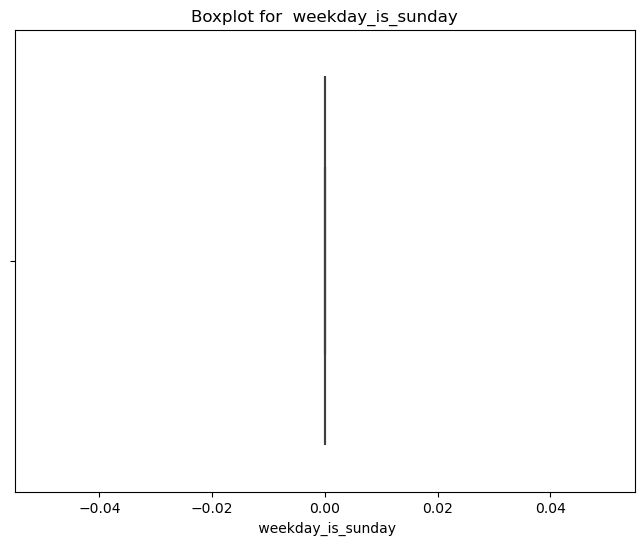

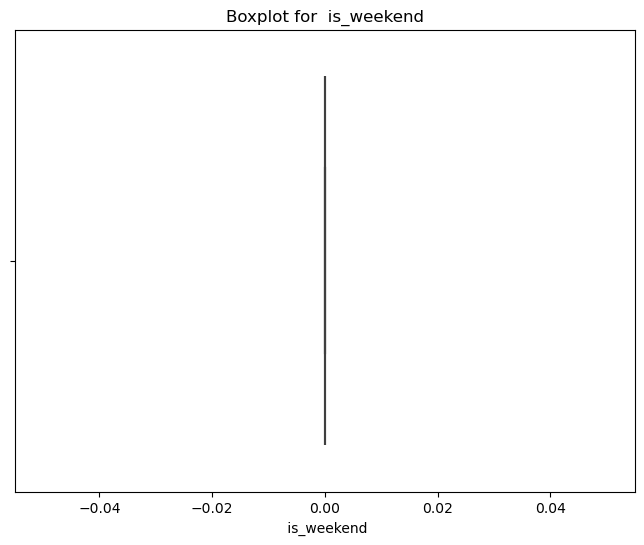

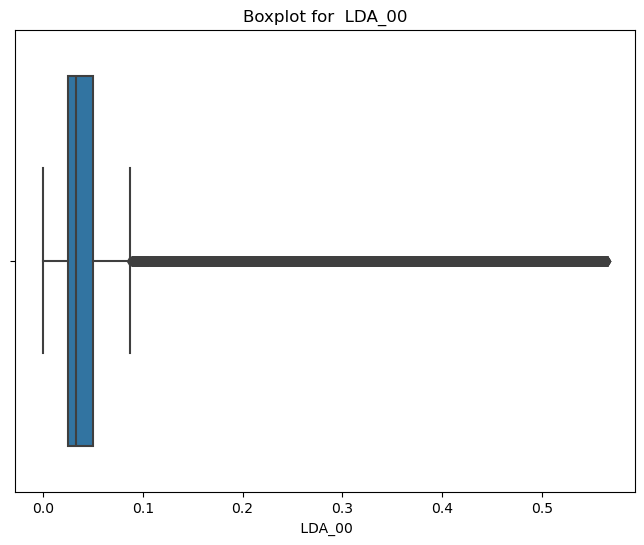

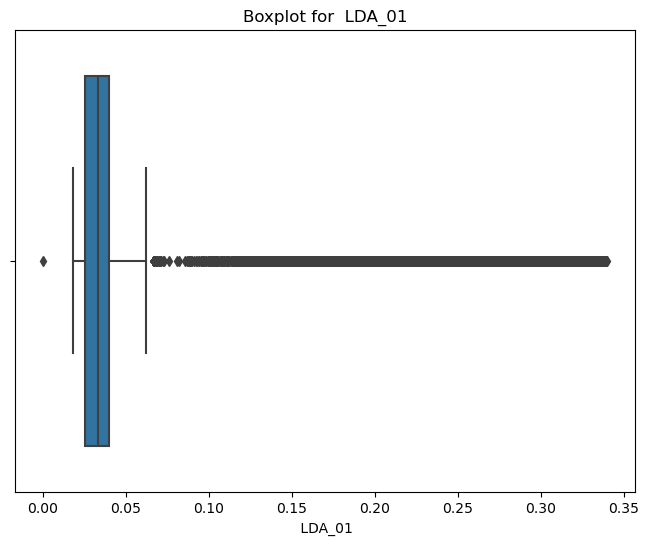

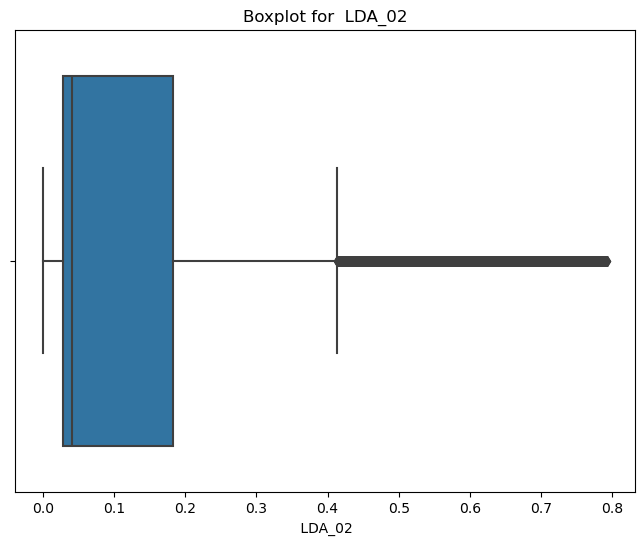

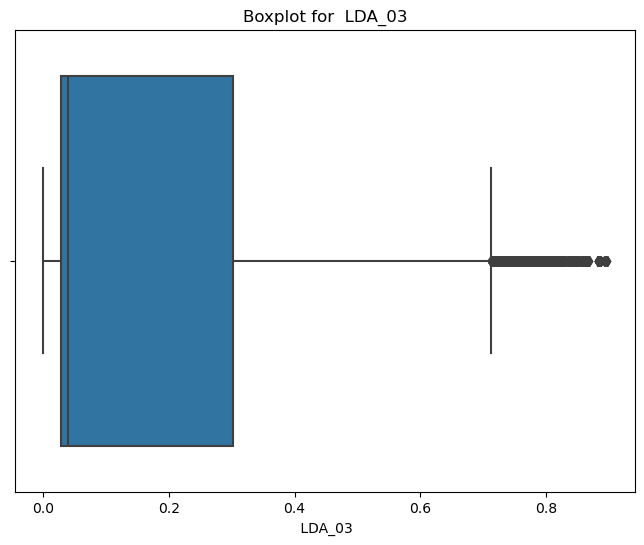

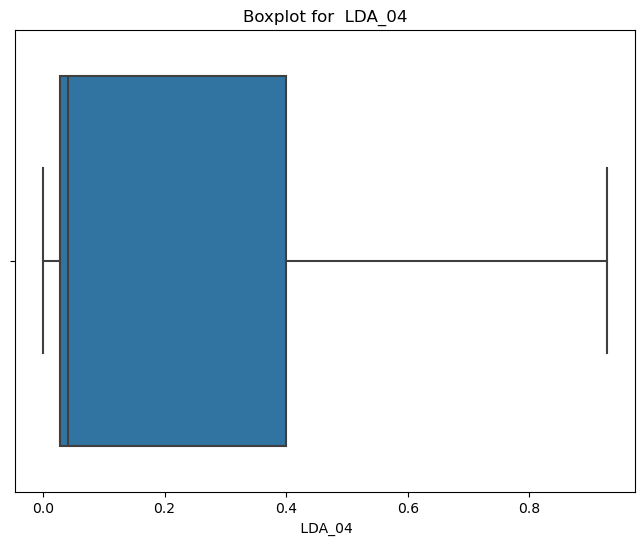

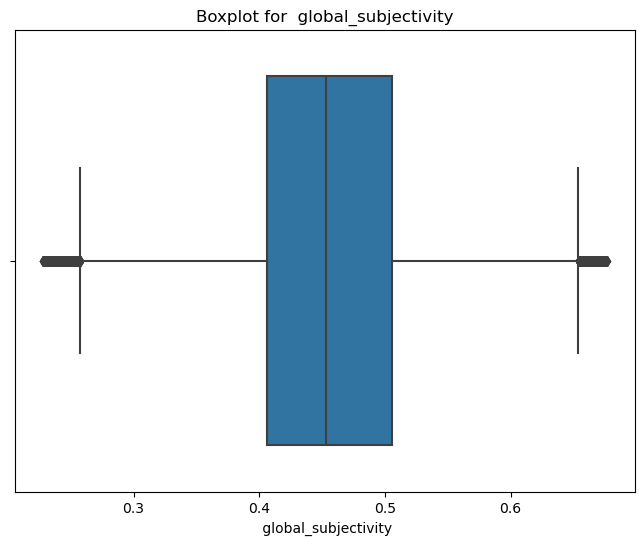

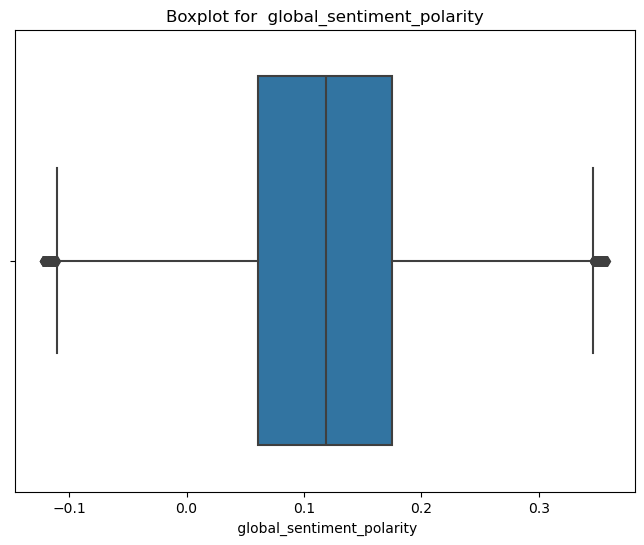

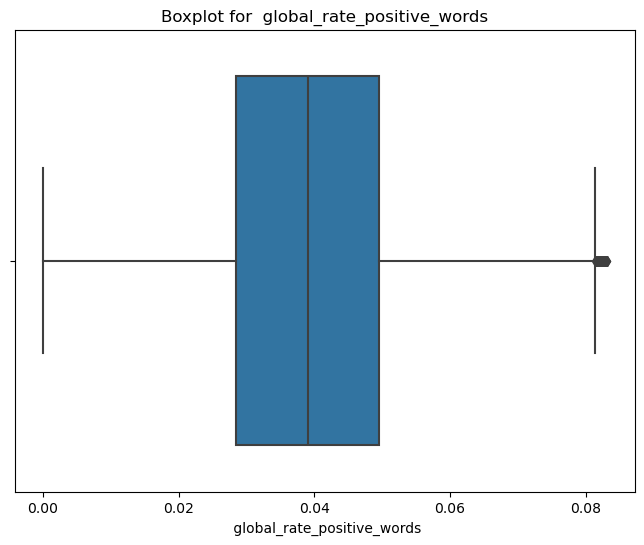

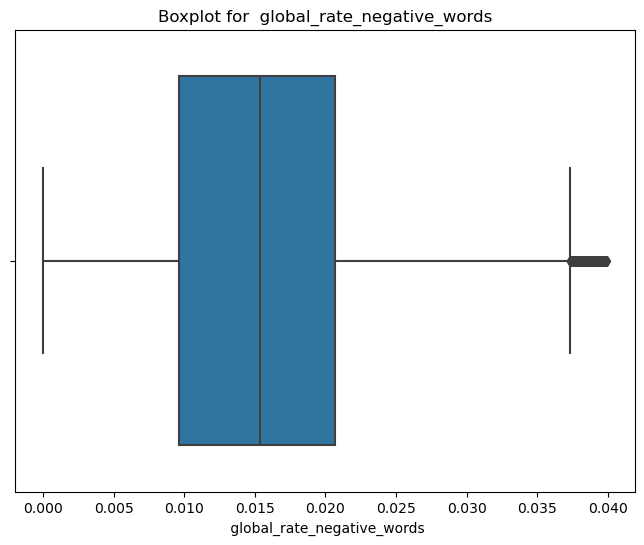

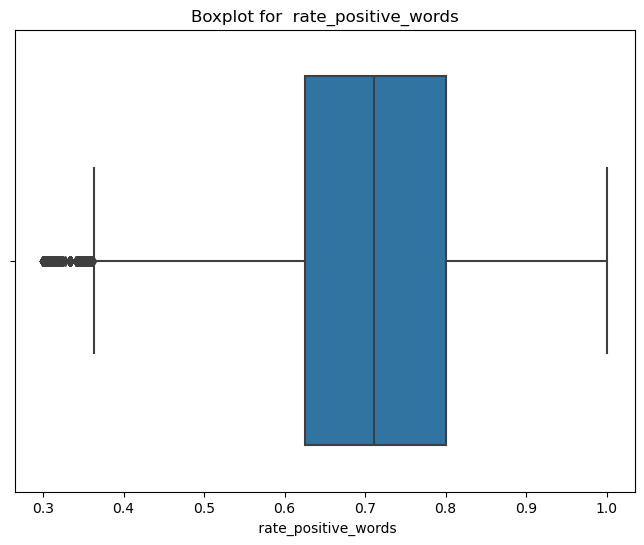

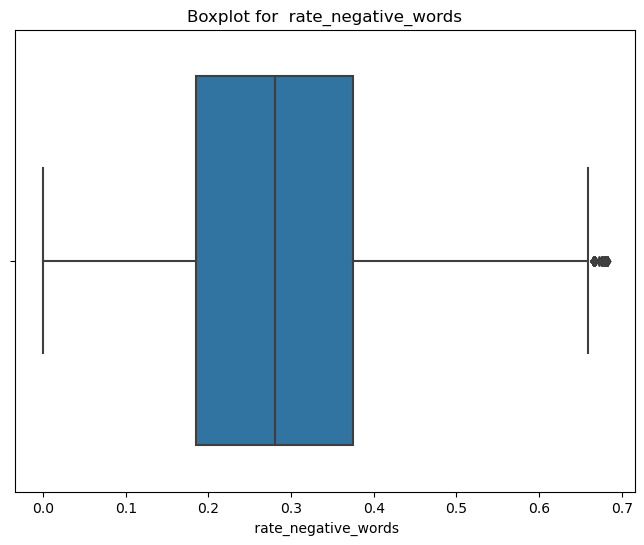

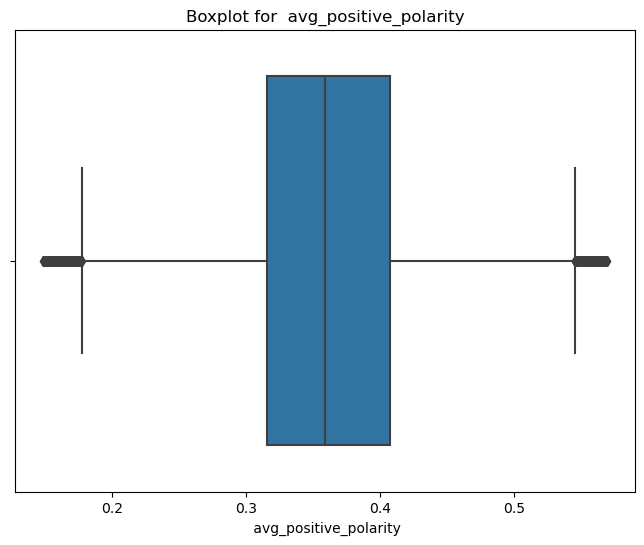

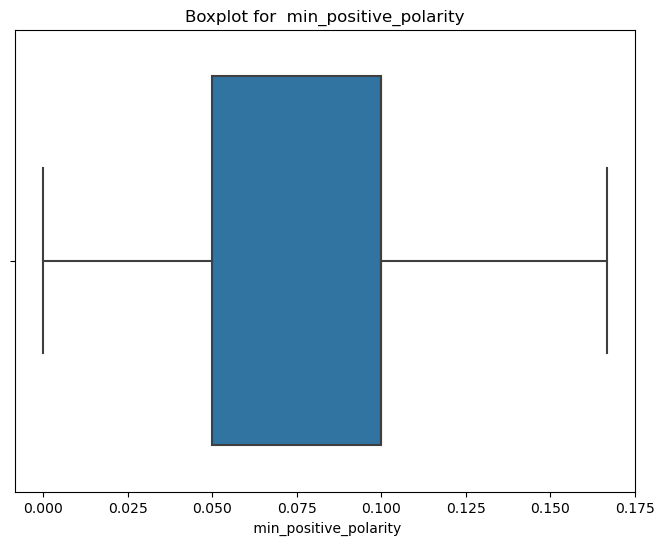

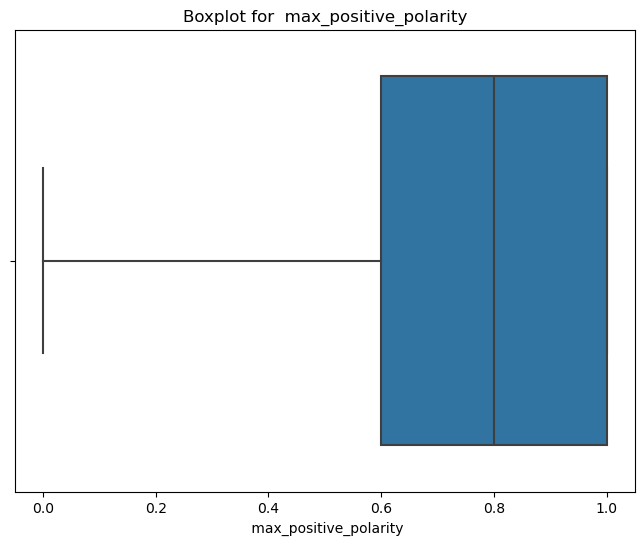

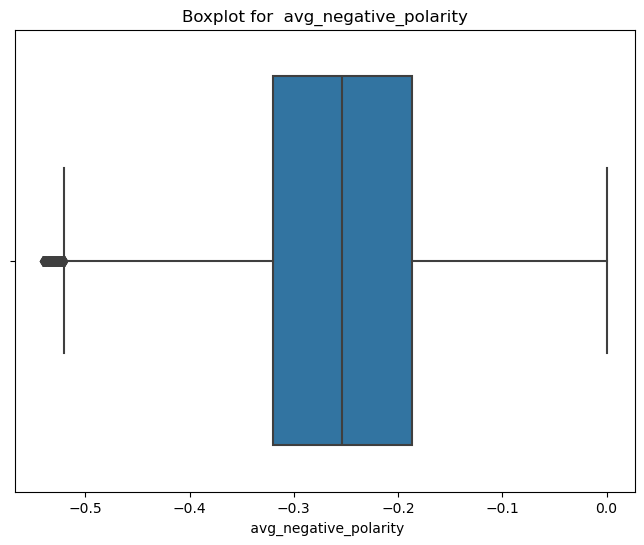

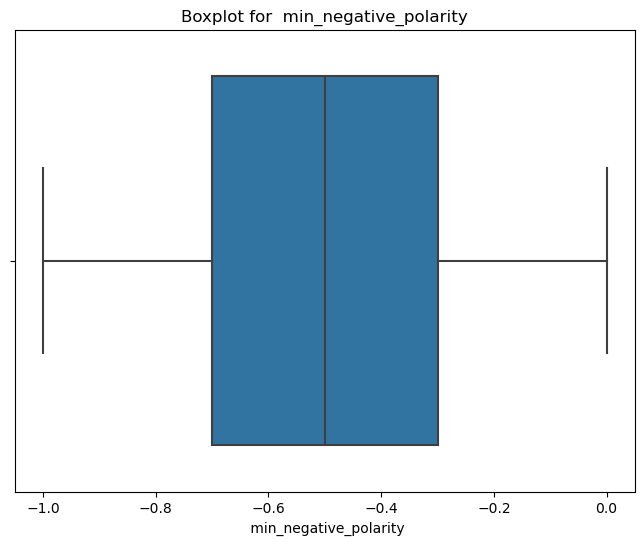

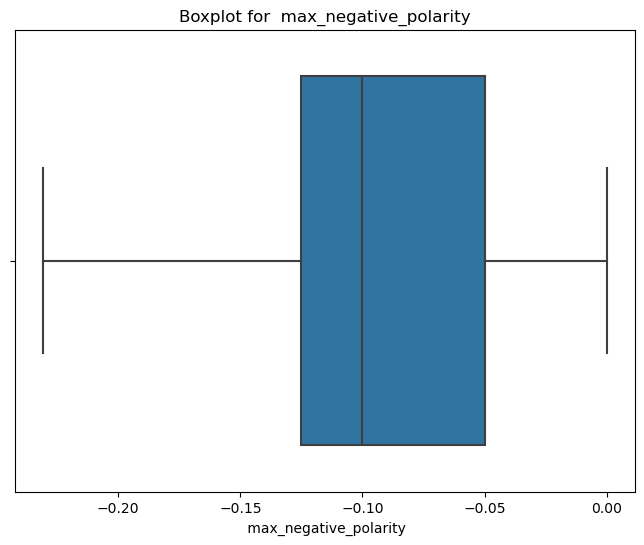

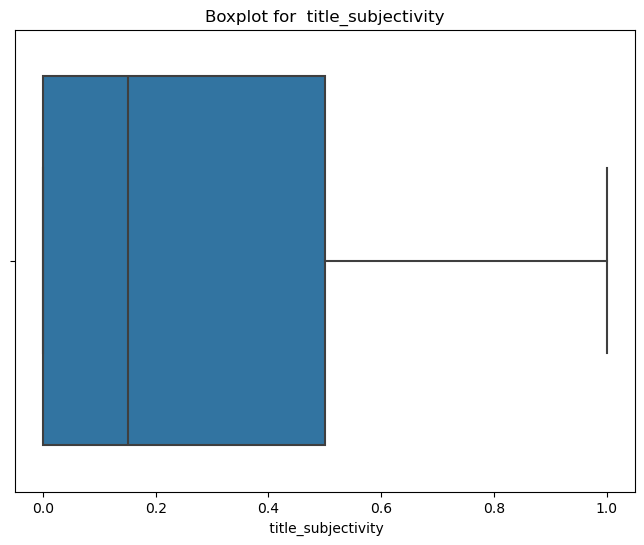

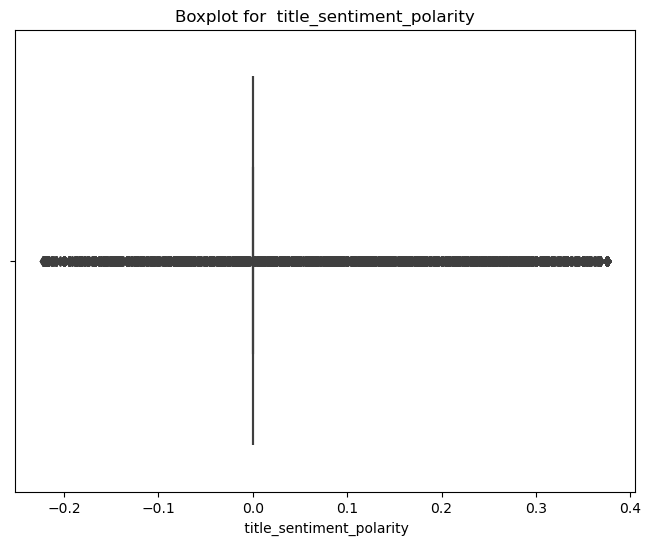

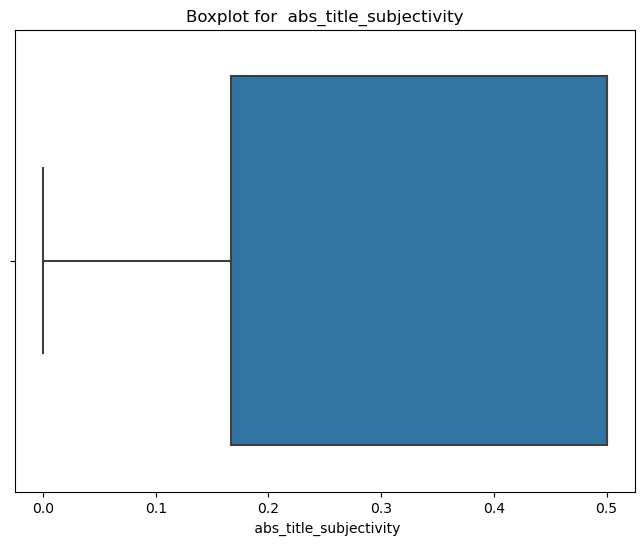

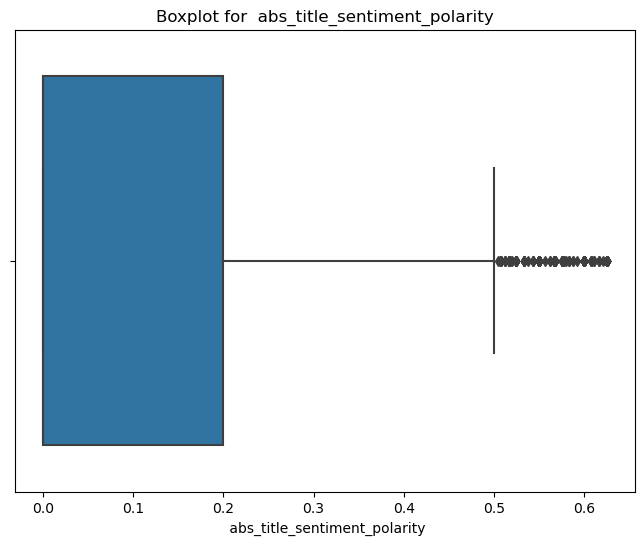

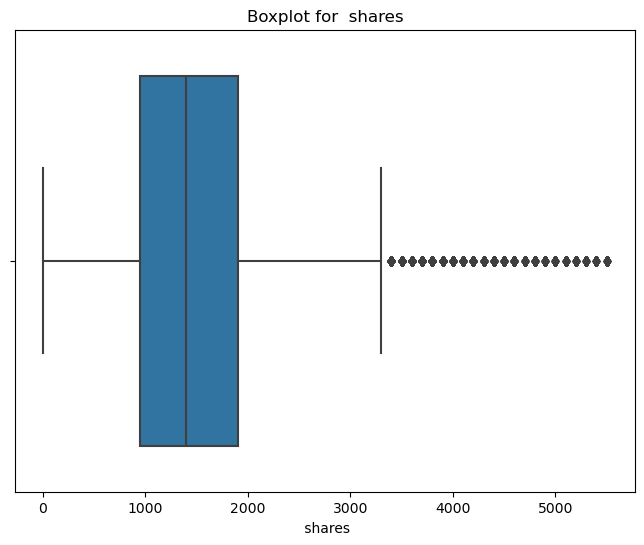

In [70]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df1_imputed):
    numerical_cols = df1_imputed.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df1_imputed[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df1_imputed)

In [72]:
df2 = df1_imputed

In [74]:

# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df2, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df2[col] = np.where(df2[col] < lower_bound, lower_bound, df2[col])
        df2[col] = np.where(df2[col] > upper_bound, upper_bound, df2[col])

    return df2

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df2_capped = cap_outliers_iqr(df2, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df2_capped.head())

Data after capping outliers:
     timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0         4.0              2.0        1.0          0.0               4.680365   
1         3.0              1.0        1.0          0.0               4.913725   
2         3.0              1.0        1.0          0.0               4.393365   
3         9.0              0.0        1.0          0.0               4.404896   
4        19.0              3.0        1.0          0.0               4.682836   

    num_keywords  ...   min_positive_polarity   max_posi

In [76]:
df3 = df2_capped
df3.shape

(39644, 55)

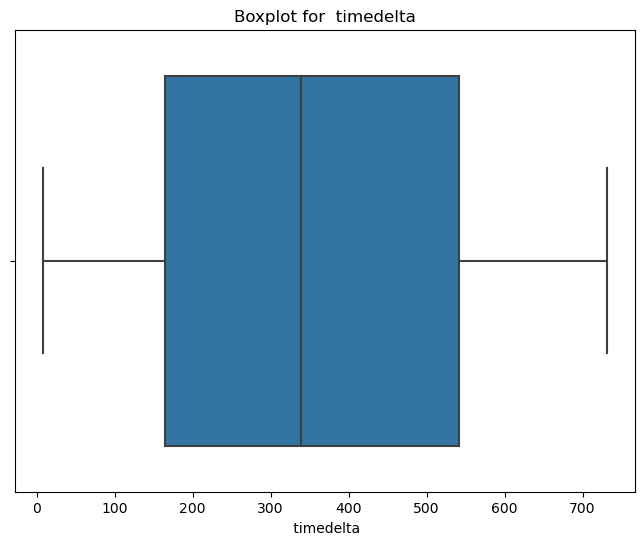

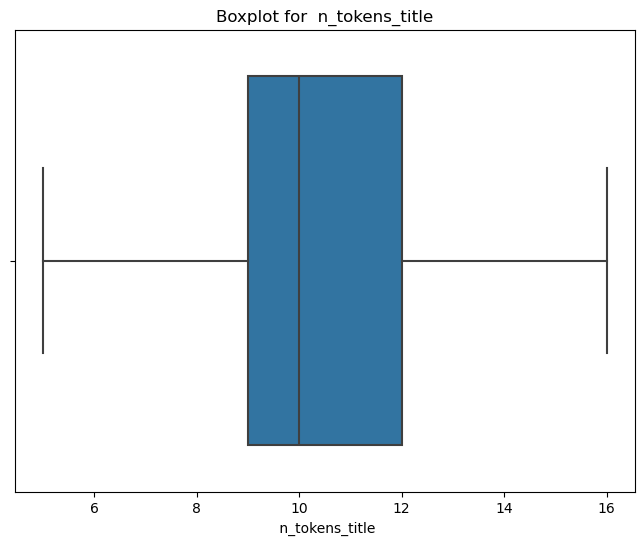

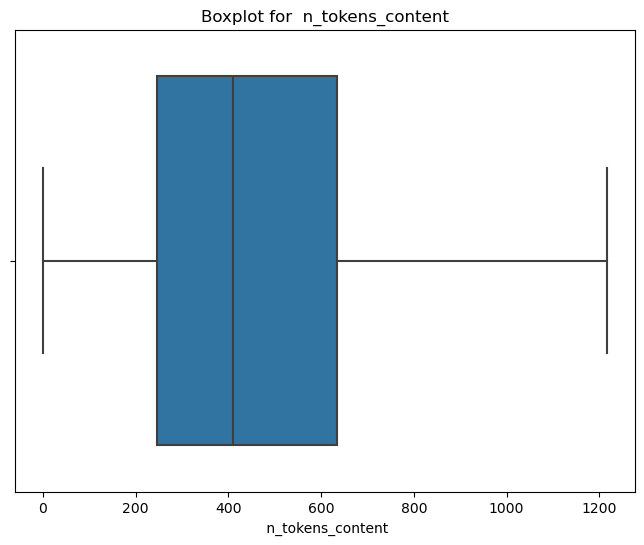

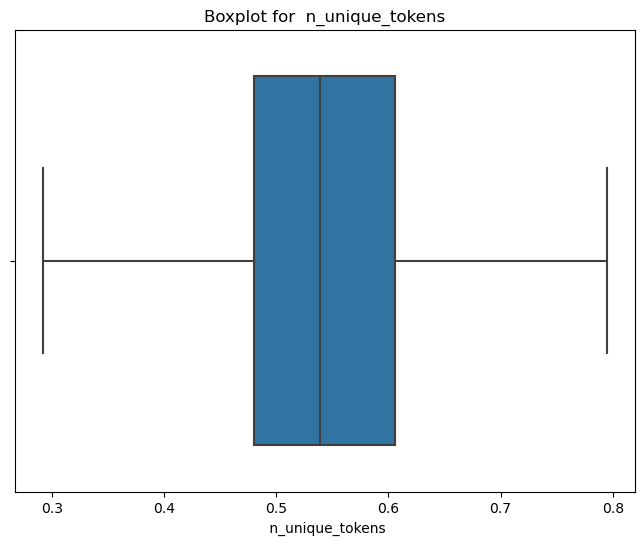

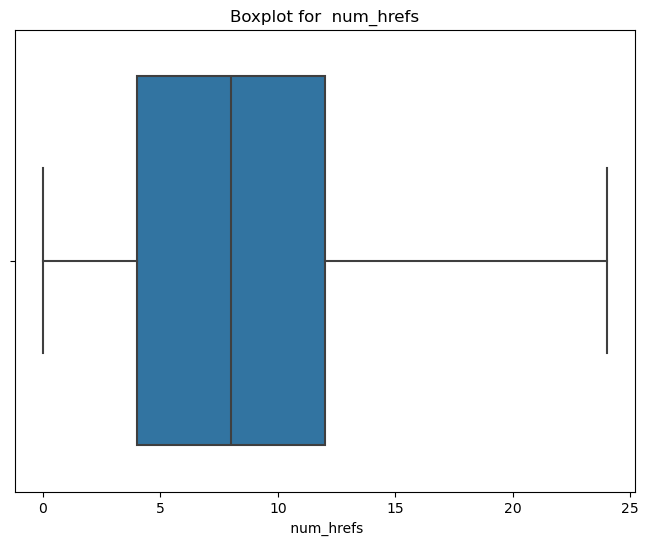

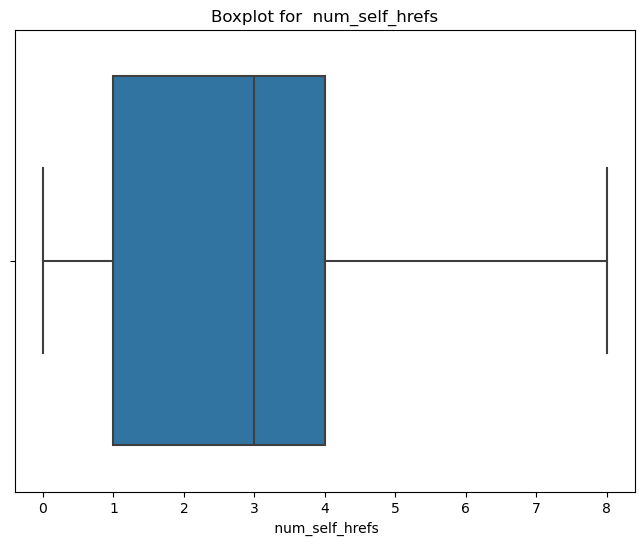

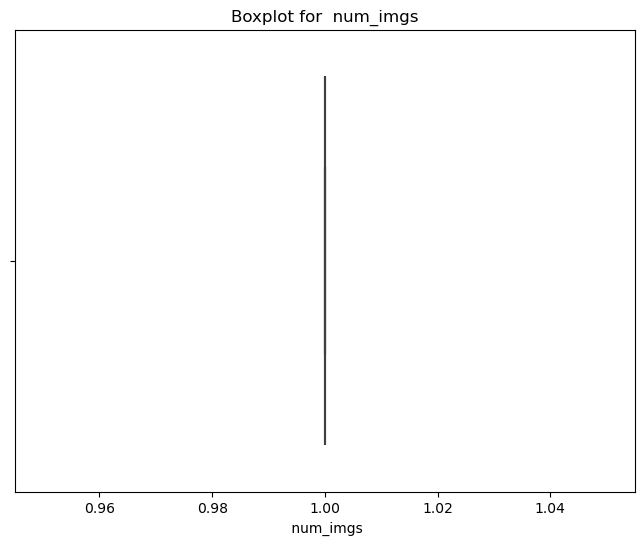

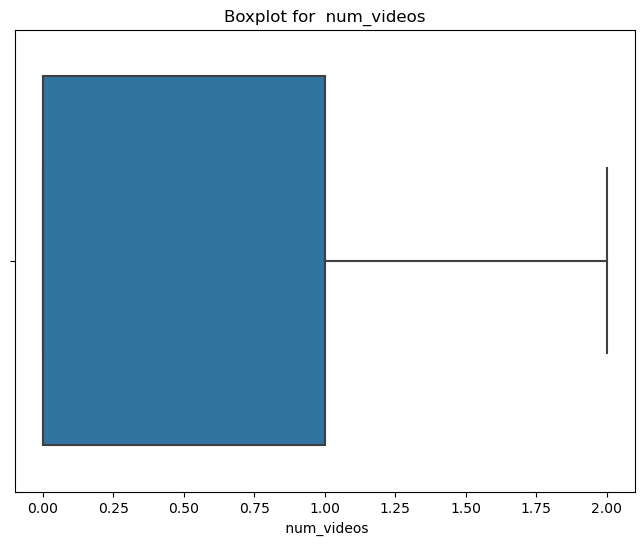

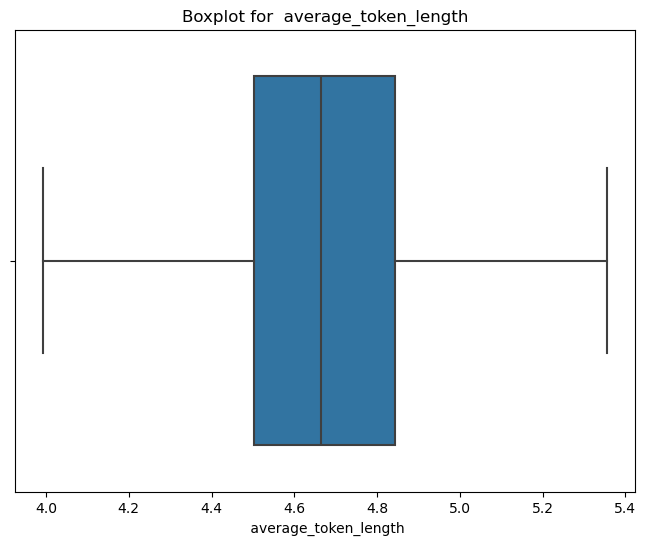

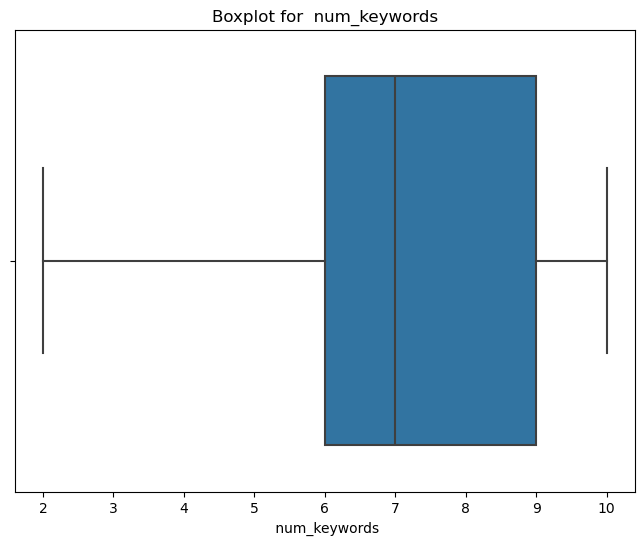

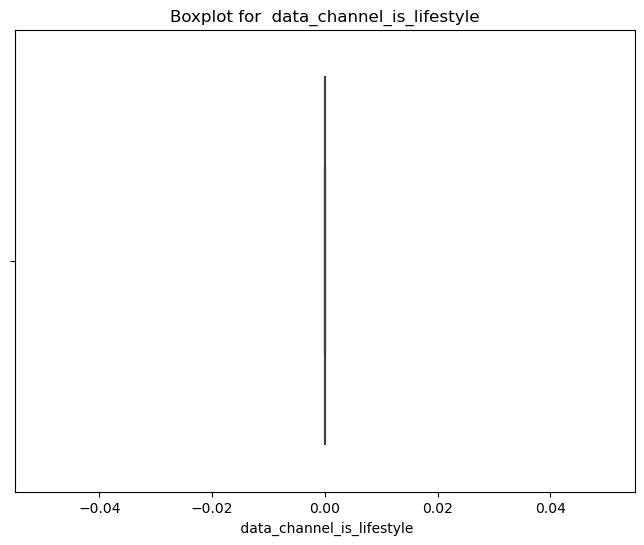

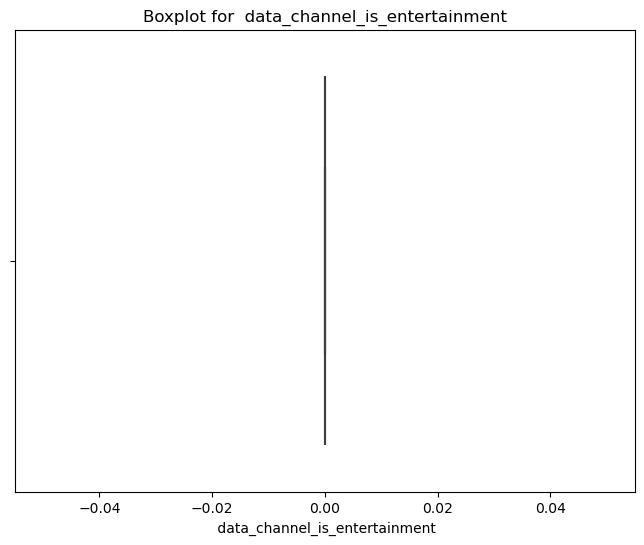

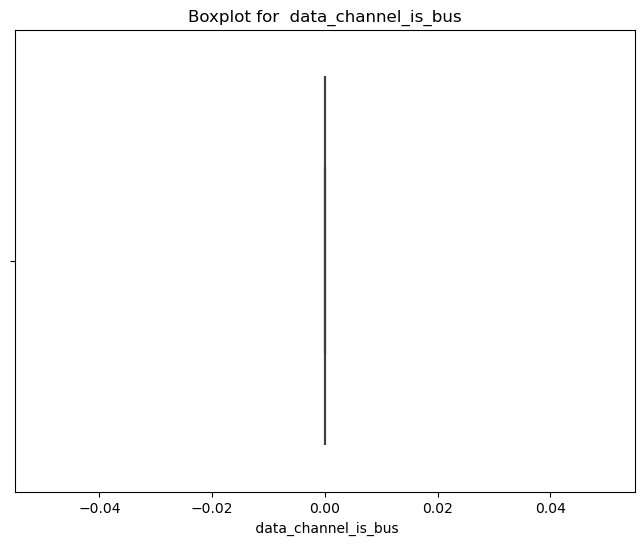

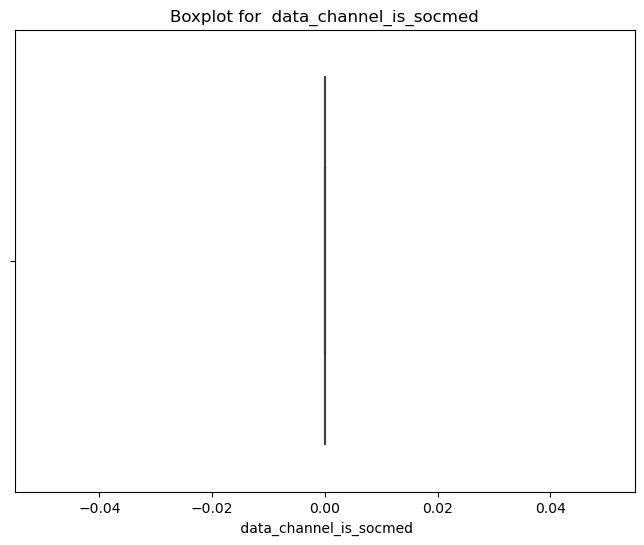

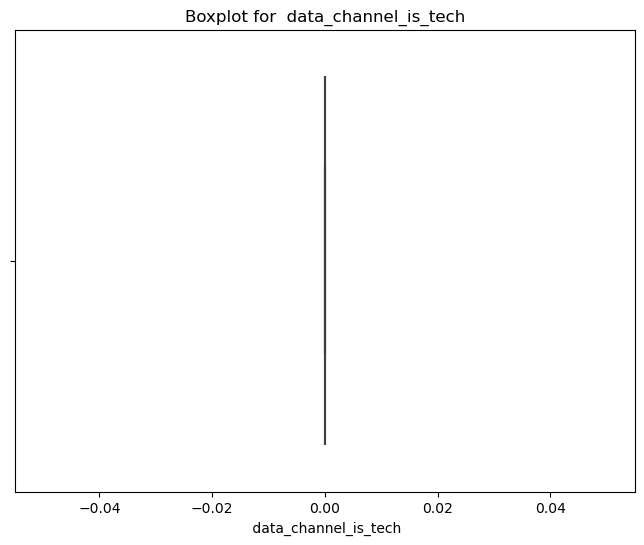

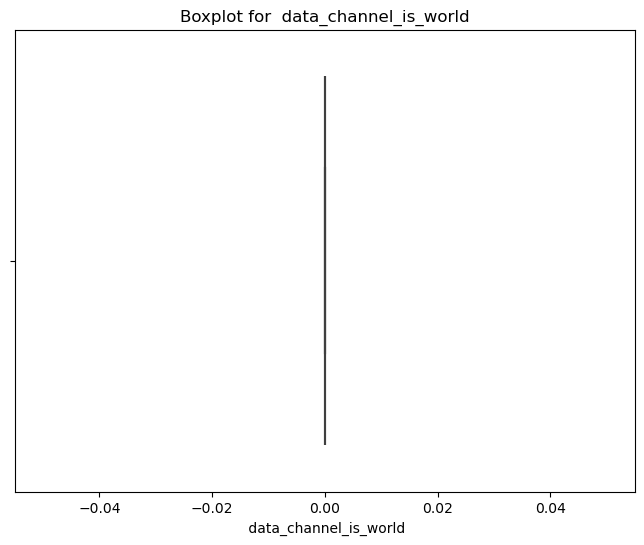

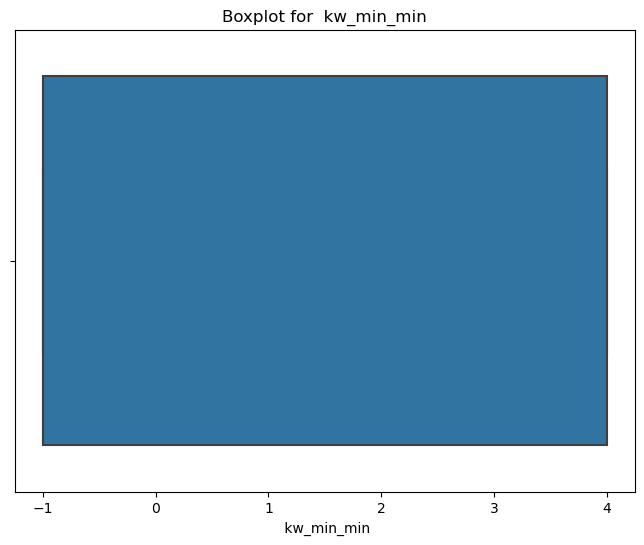

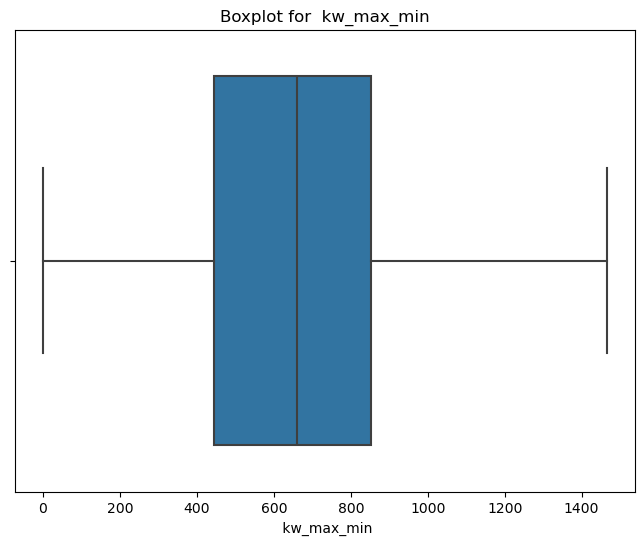

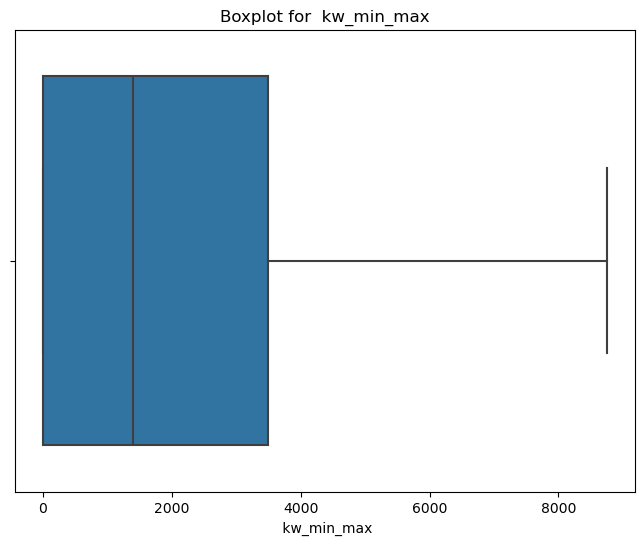

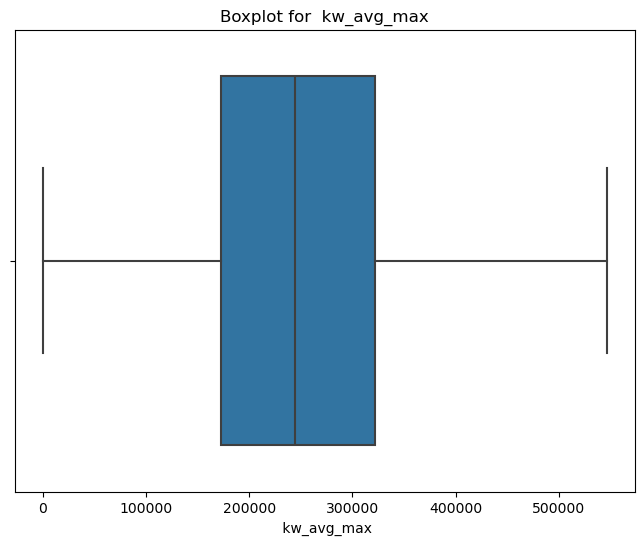

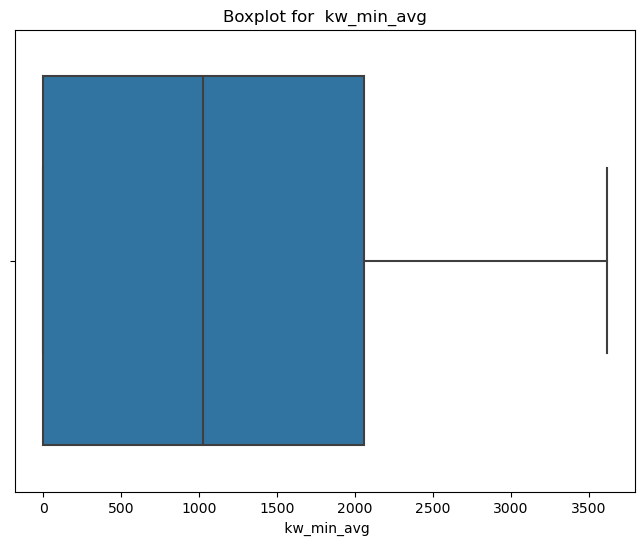

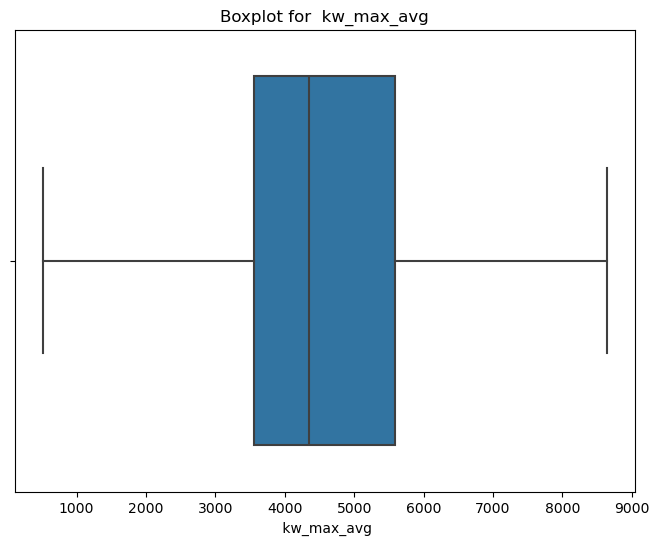

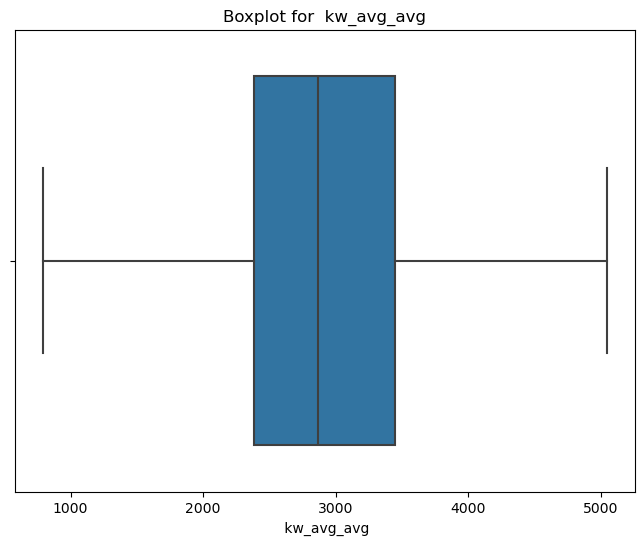

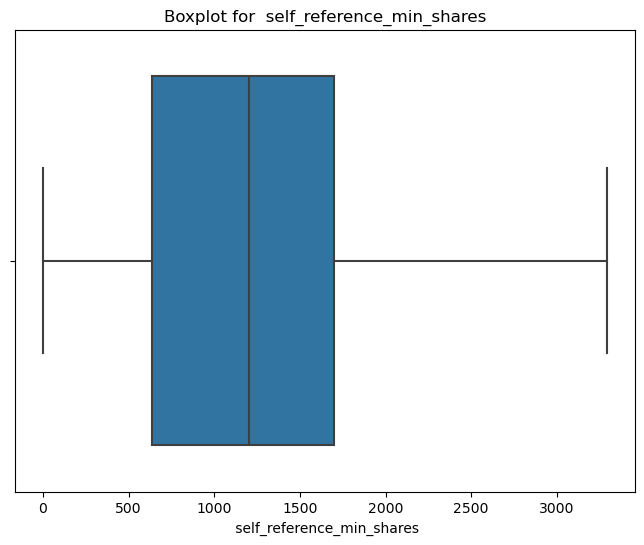

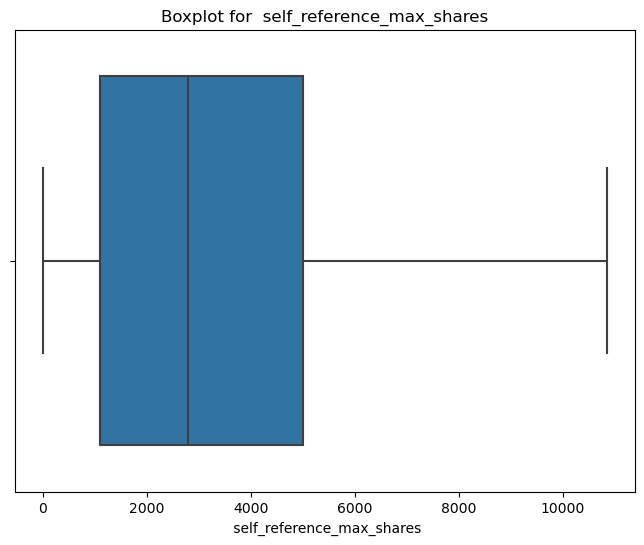

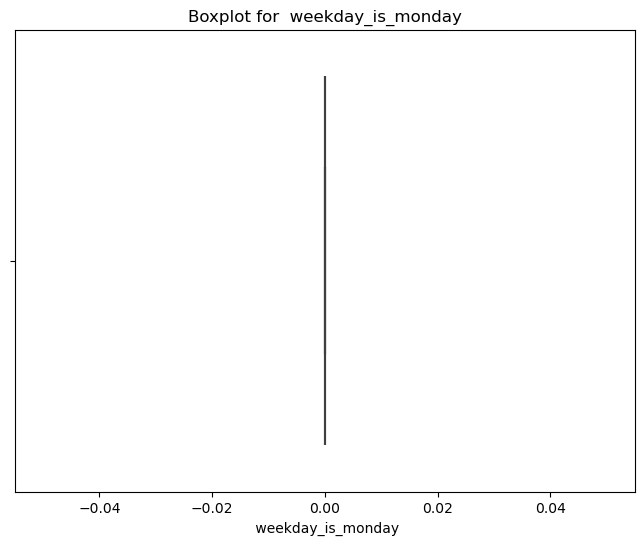

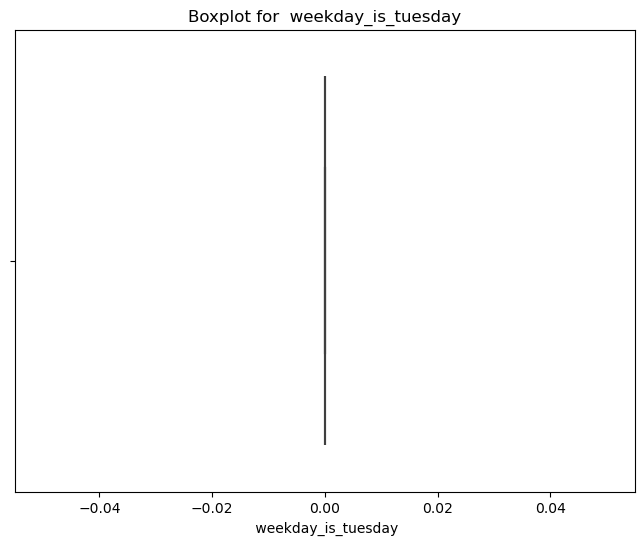

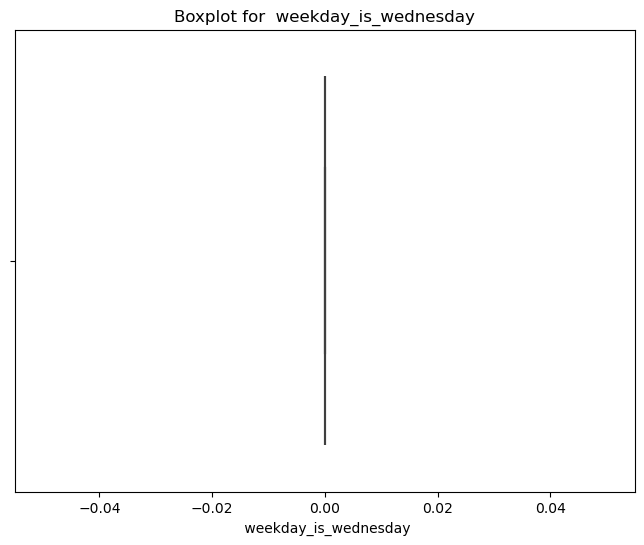

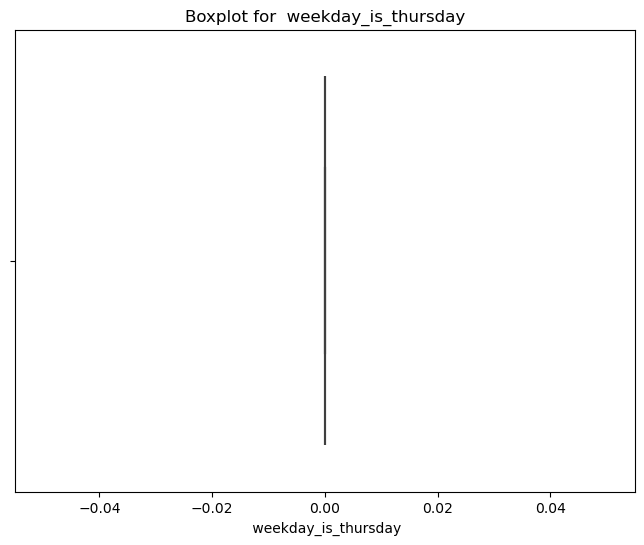

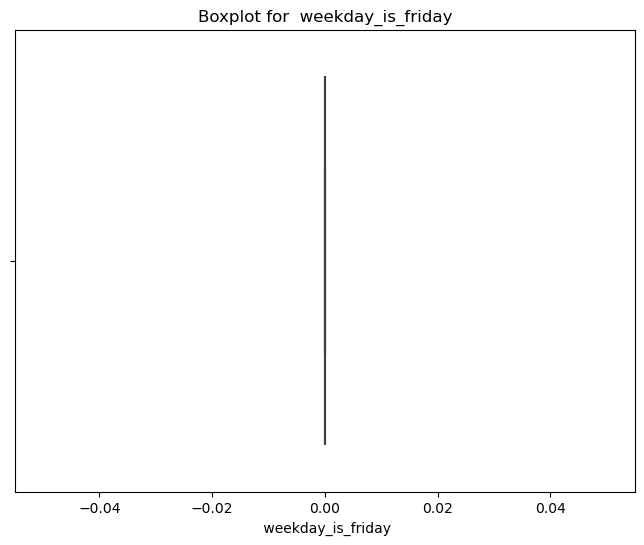

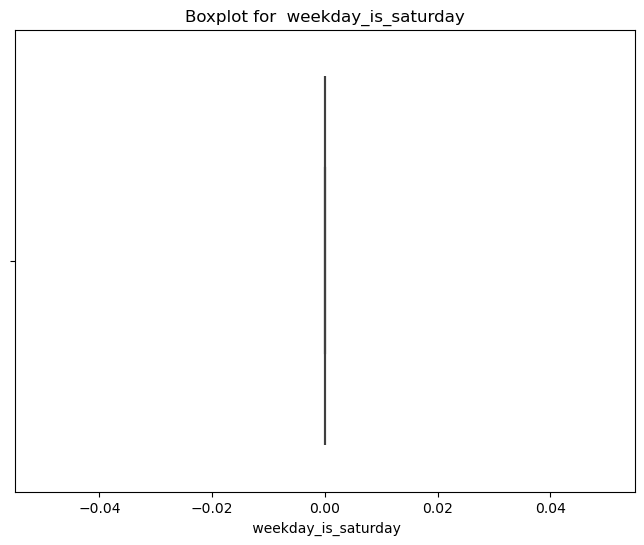

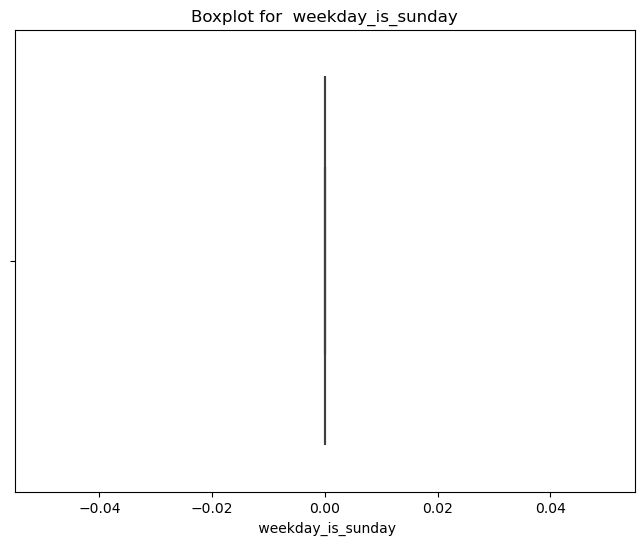

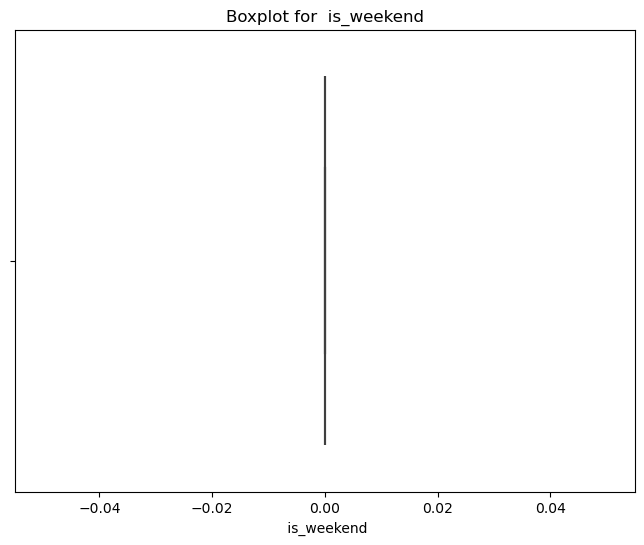

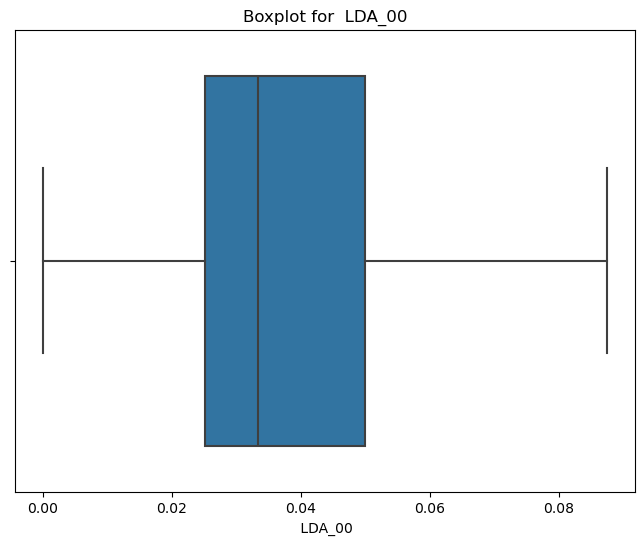

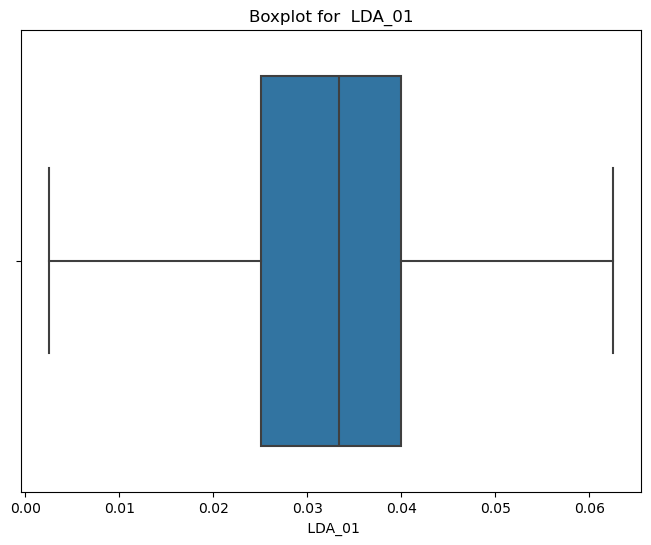

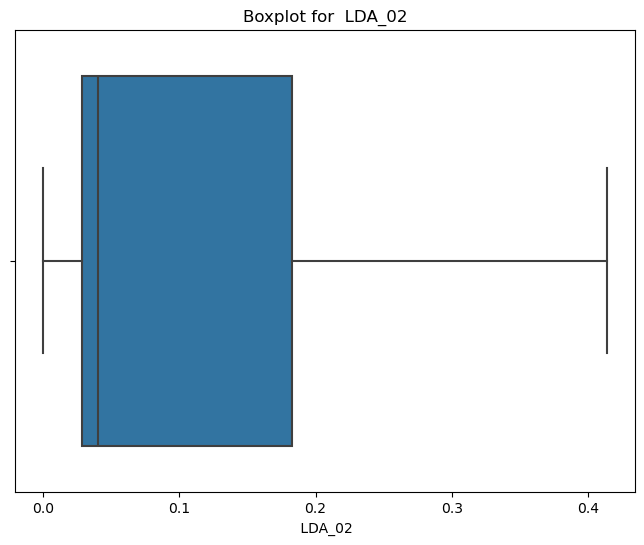

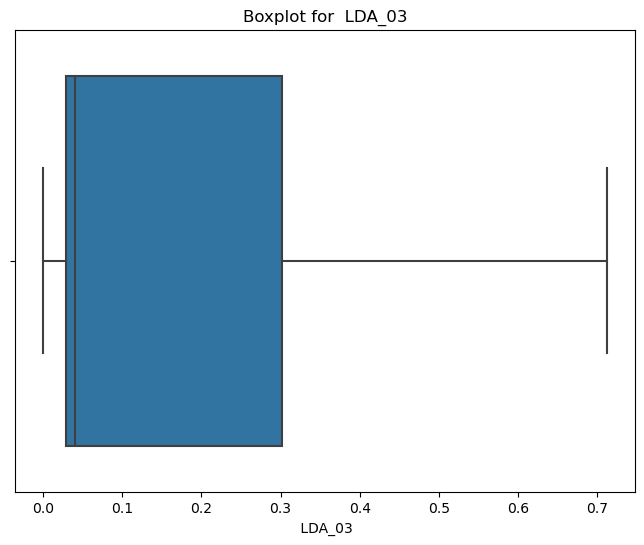

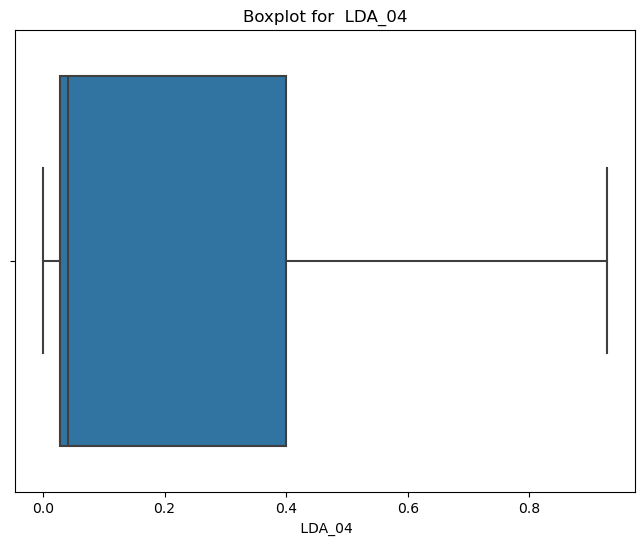

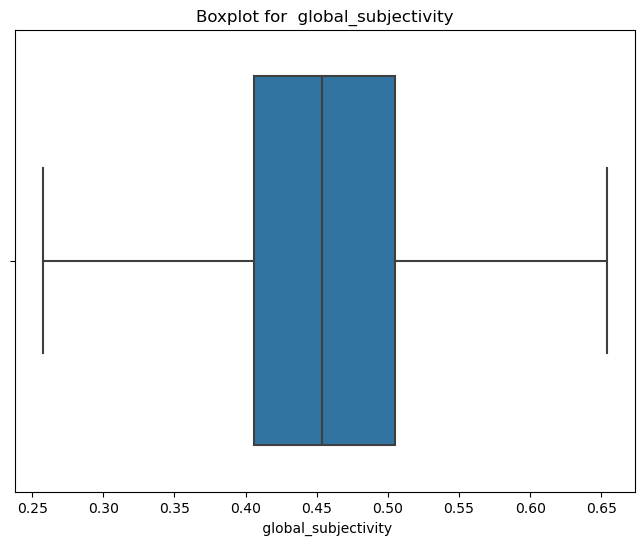

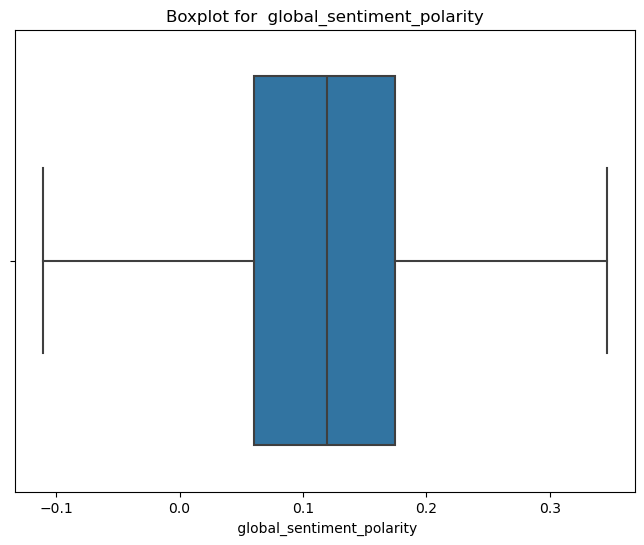

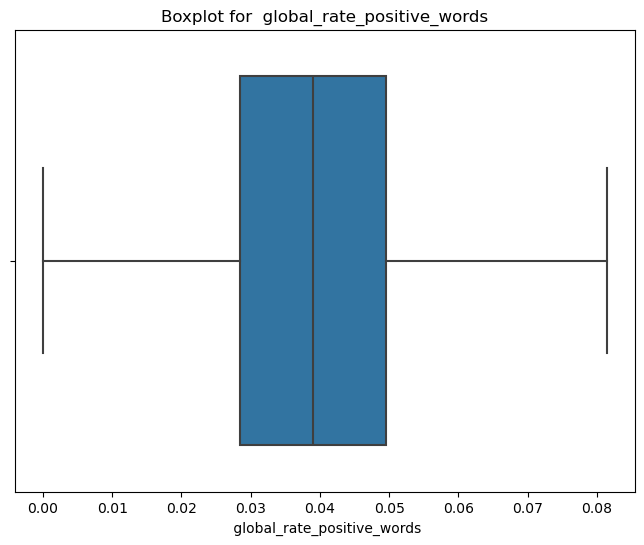

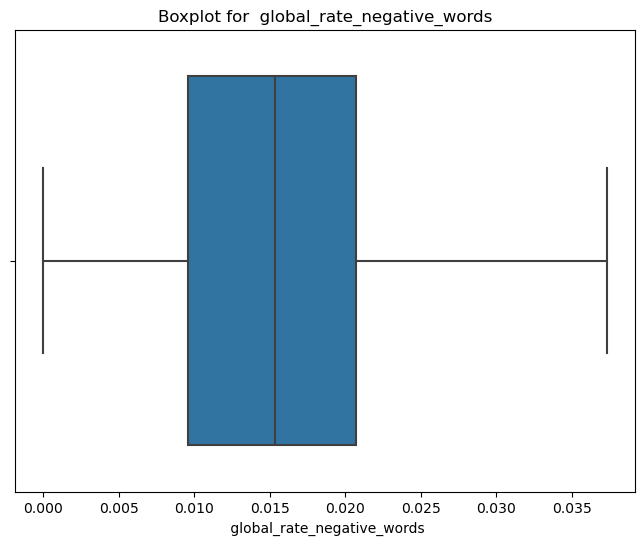

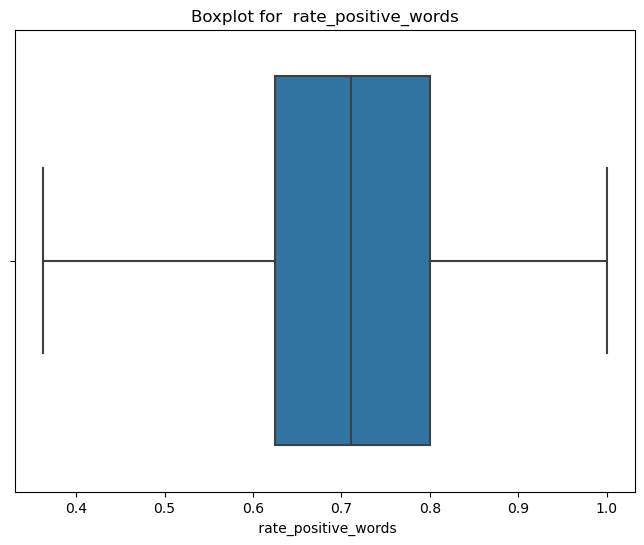

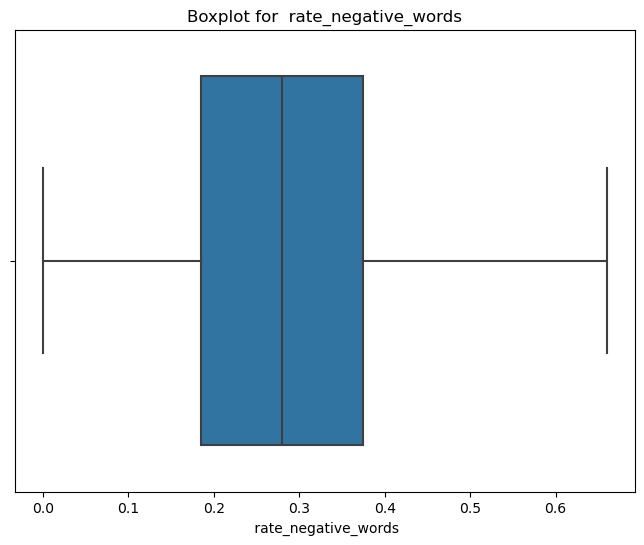

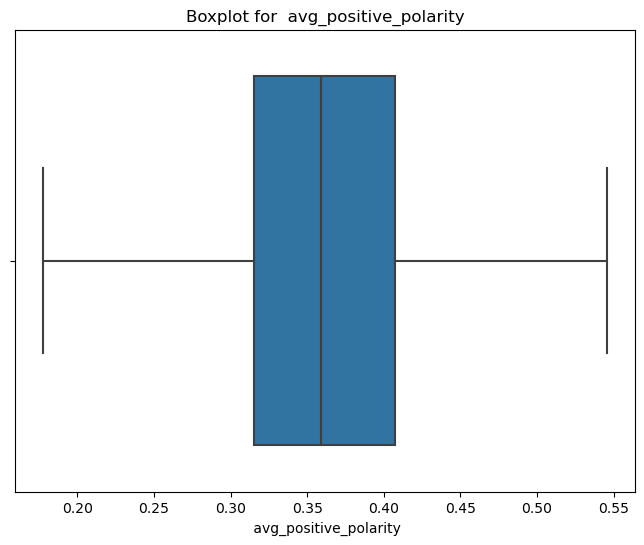

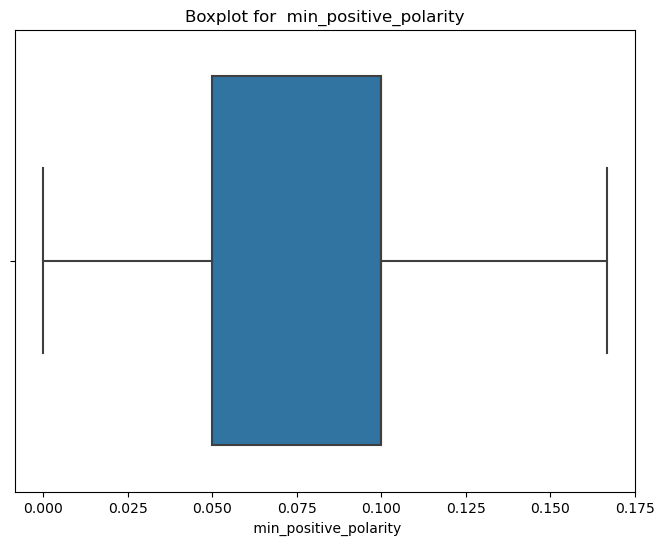

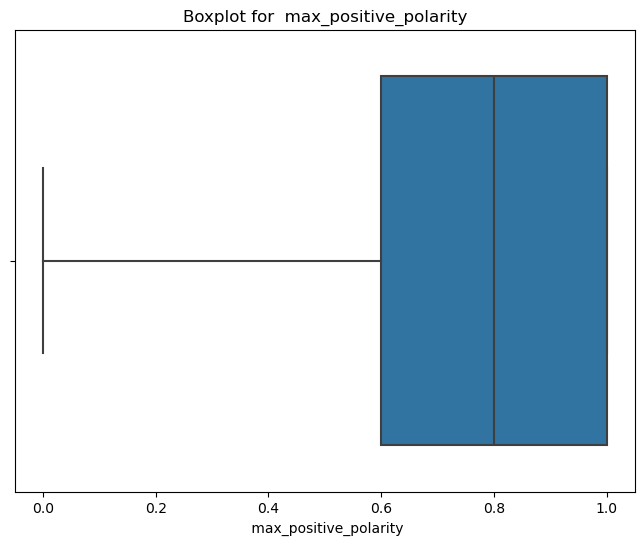

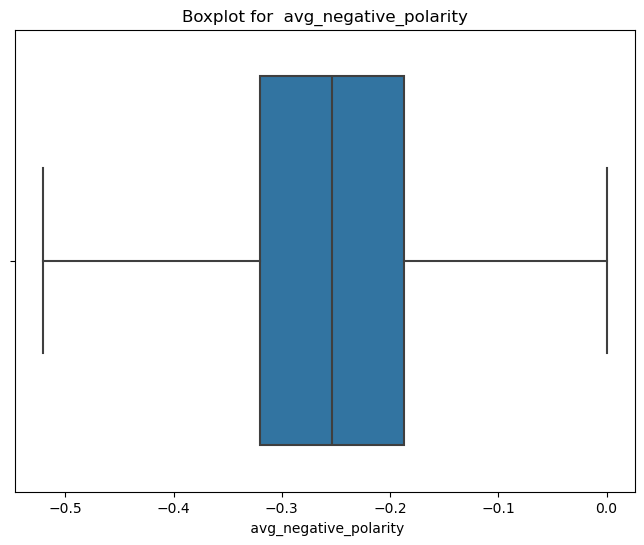

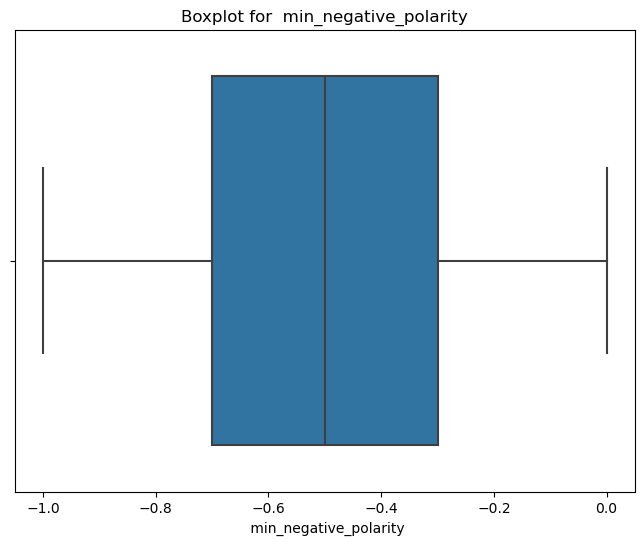

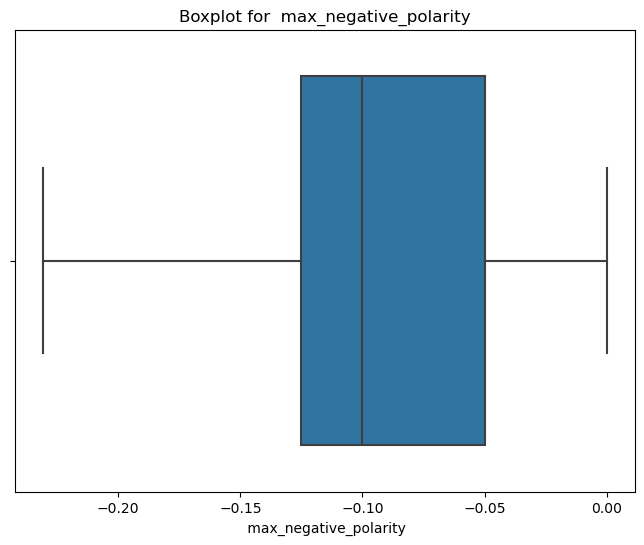

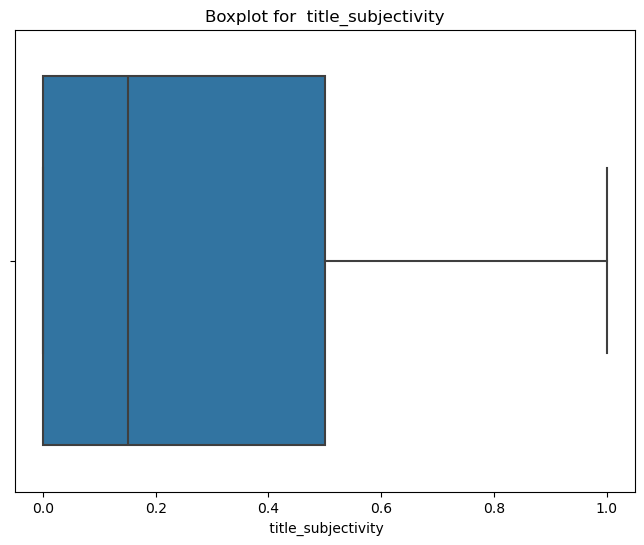

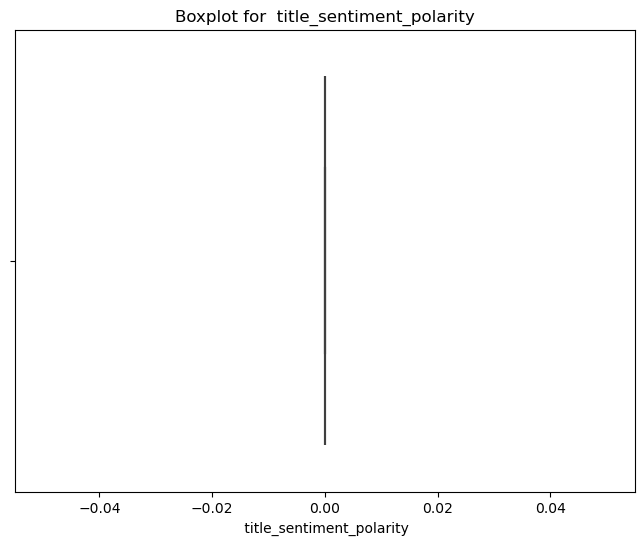

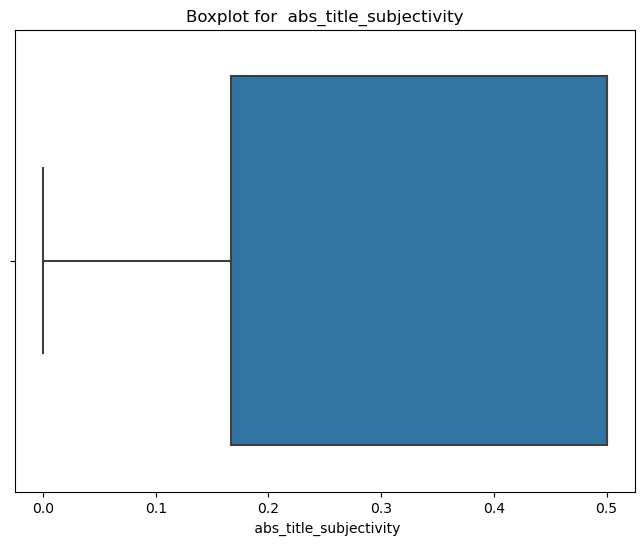

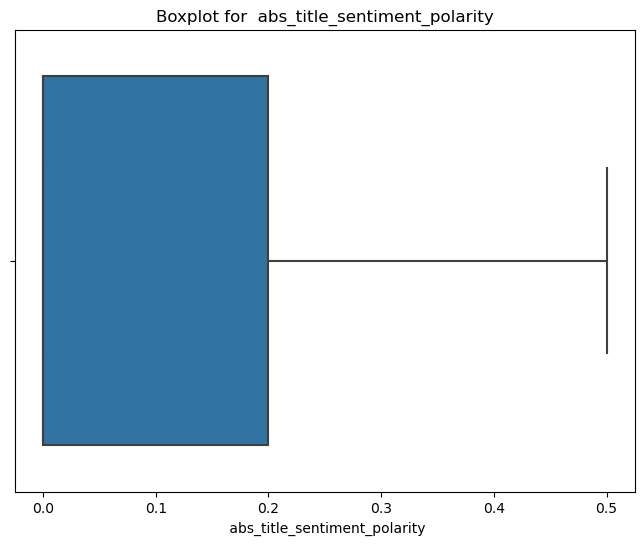

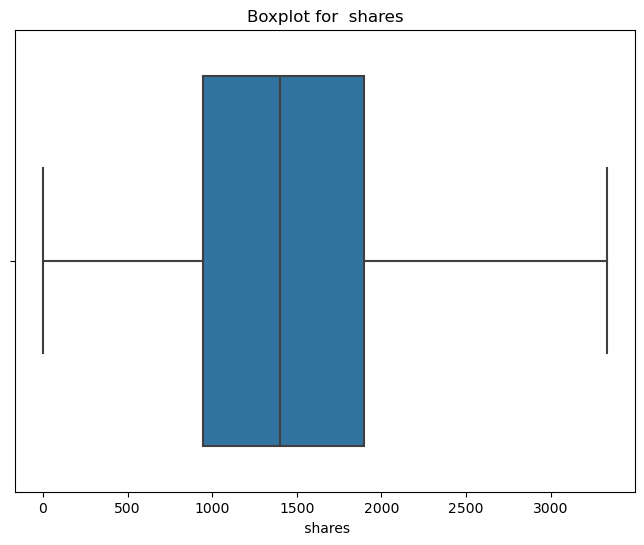

In [78]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df3):
    numerical_cols = df3.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df3[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df3)

In [79]:
skewness = df3.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

 timedelta                        0.120504
 n_tokens_title                   0.106208
 n_tokens_content                 0.839534
 n_unique_tokens                  0.144887
 num_hrefs                        0.956842
 num_self_hrefs                   0.632292
 num_imgs                         0.000000
 num_videos                       1.445657
 average_token_length             0.110744
 num_keywords                    -0.117035
 data_channel_is_lifestyle        0.000000
 data_channel_is_entertainment    0.000000
 data_channel_is_bus              0.000000
 data_channel_is_socmed           0.000000
 data_channel_is_tech             0.000000
 data_channel_is_world            0.000000
 kw_min_min                       0.869892
 kw_max_min                       0.466415
 kw_min_max                       1.214824
 kw_avg_max                       0.218253
 kw_min_avg                       0.467976
 kw_max_avg                       1.008248
 kw_avg_avg                       0.592126
 self_refer

In [82]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox



def handle_skewness(df3, threshold=0.5):
    numerical_cols = df3.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_cols:  # Iterate over numerical columns
        skewness = df3[column].skew() # Calculate skewness for individual column

        if skewness > threshold:
            # Positively skewed: apply log or sqrt
            if (df3[column] > 0).all():  # Ensure there are no zero or negative values
                df3[column] = np.log1p(df3[column])  # log(1 + value)
            else:
                df3[column] = np.sqrt(df3[column])  # Square root transformation

        elif skewness < -threshold:
            # Negatively skewed: apply square or Box-Cox
            if (df3[column] >= 0).all():  # Ensure non-negative values for Box-Cox
                df3[column], _ = boxcox(df3[column] + 1)  # Add 1 to avoid zero values
            else:
                df3[column] = df3[column] ** 2  # Square the values

        # No action for moderately skewed data (-0.5 < skewness < 0.5)

    return df3

# Apply to your dataset
data_transformed = handle_skewness(df3)

C:\Users\Najma\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [84]:
df4 = data_transformed

In [ ]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df4):
    numerical_cols = df4.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df4[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df4)

In [86]:

# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df4, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df4[col].quantile(0.25)
        Q3 = df4[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df4[col] = np.where(df4[col] < lower_bound, lower_bound, df4[col])
        df4[col] = np.where(df4[col] > upper_bound, upper_bound, df4[col])

    return df4

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df4.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df4_capped = cap_outliers_iqr(df4, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df4_capped.head())

Data after capping outliers:
     timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0          14.798649          0.663594   
1       731.0              9.0          15.968719          0.604743   
2       731.0              9.0          14.525839          0.575130   
3       731.0              9.0          23.043437          0.503788   
4       731.0             13.0          32.741411          0.415646   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0    2.000000         1.414214        1.0          0.0               4.680365   
1    1.732051         1.000000        1.0          0.0               4.913725   
2    1.732051         1.000000        1.0          0.0               4.393365   
3    3.000000         0.000000        1.0          0.0               4.404896   
4    4.358899         1.732051        1.0          0.0               4.682836   

    num_keywords  ...   min_positive_polarity   max_posi

In [88]:
df5 = df4_capped

## 9. Visualization 

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


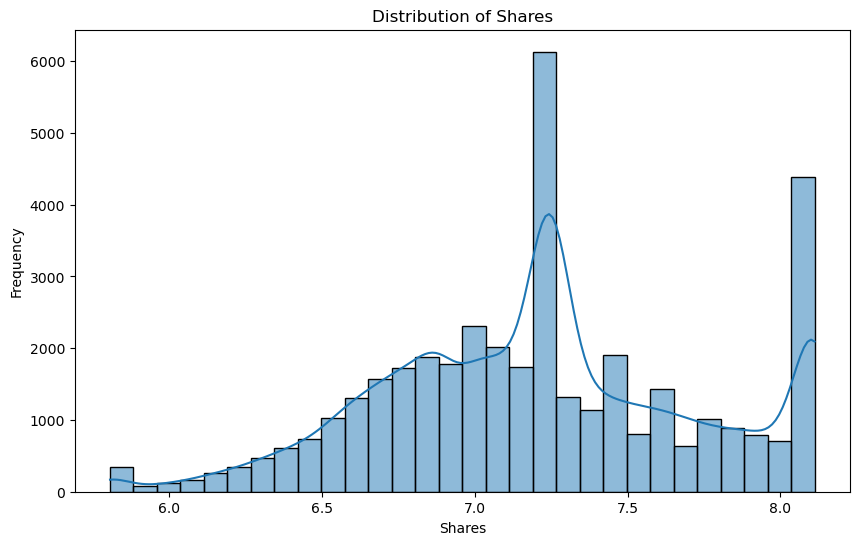

In [90]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df5[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

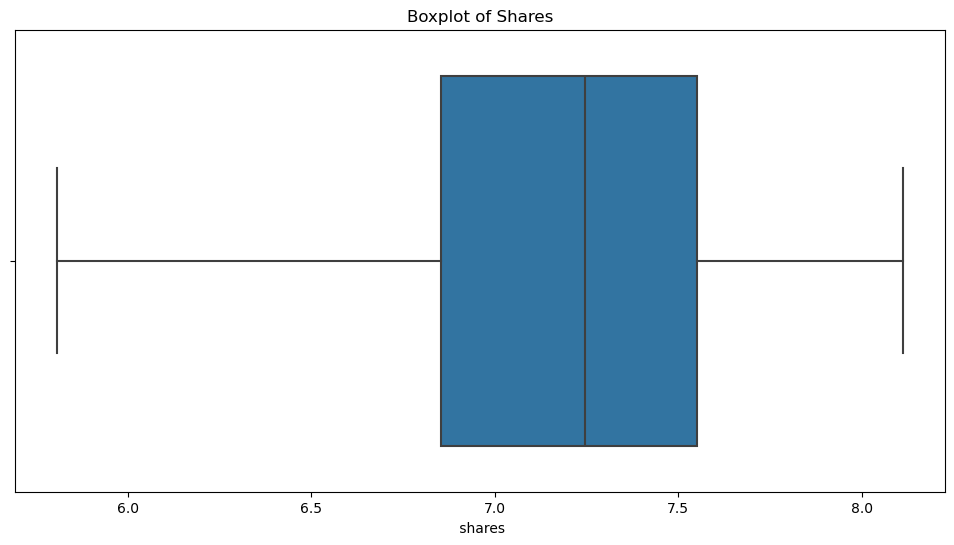

In [92]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=' shares', data=df5)
plt.title('Boxplot of Shares')
plt.show()

In [94]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Separate features and target
X = df5.drop(columns=[' shares'])
y = df5[' shares']

# Impute missing values with the mean (you could also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check if there are any remaining NaNs (should be none)
print(X_imputed.isna().sum().sum())  # Should print 0 if all NaNs are handled



0


In [96]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Now proceed with SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_imputed, y)
X_kbest = selector.transform(X_imputed)

selected_features = X_imputed.columns[selector.get_support()]
X_kbest_df5 = pd.DataFrame(X_kbest, columns=selected_features)

# Fit a RandomForestRegressor to evaluate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_kbest_df5, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df5 = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df5)

                      Feature  Importance
2                  kw_avg_avg    0.149939
5                      LDA_04    0.143832
1                  kw_max_avg    0.132618
6         global_subjectivity    0.122275
7   global_sentiment_polarity    0.116418
0                  kw_min_avg    0.078057
4   self_reference_max_shares    0.070492
3   self_reference_min_shares    0.068117
9         rate_negative_words    0.059761
8         rate_positive_words    0.058491


C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

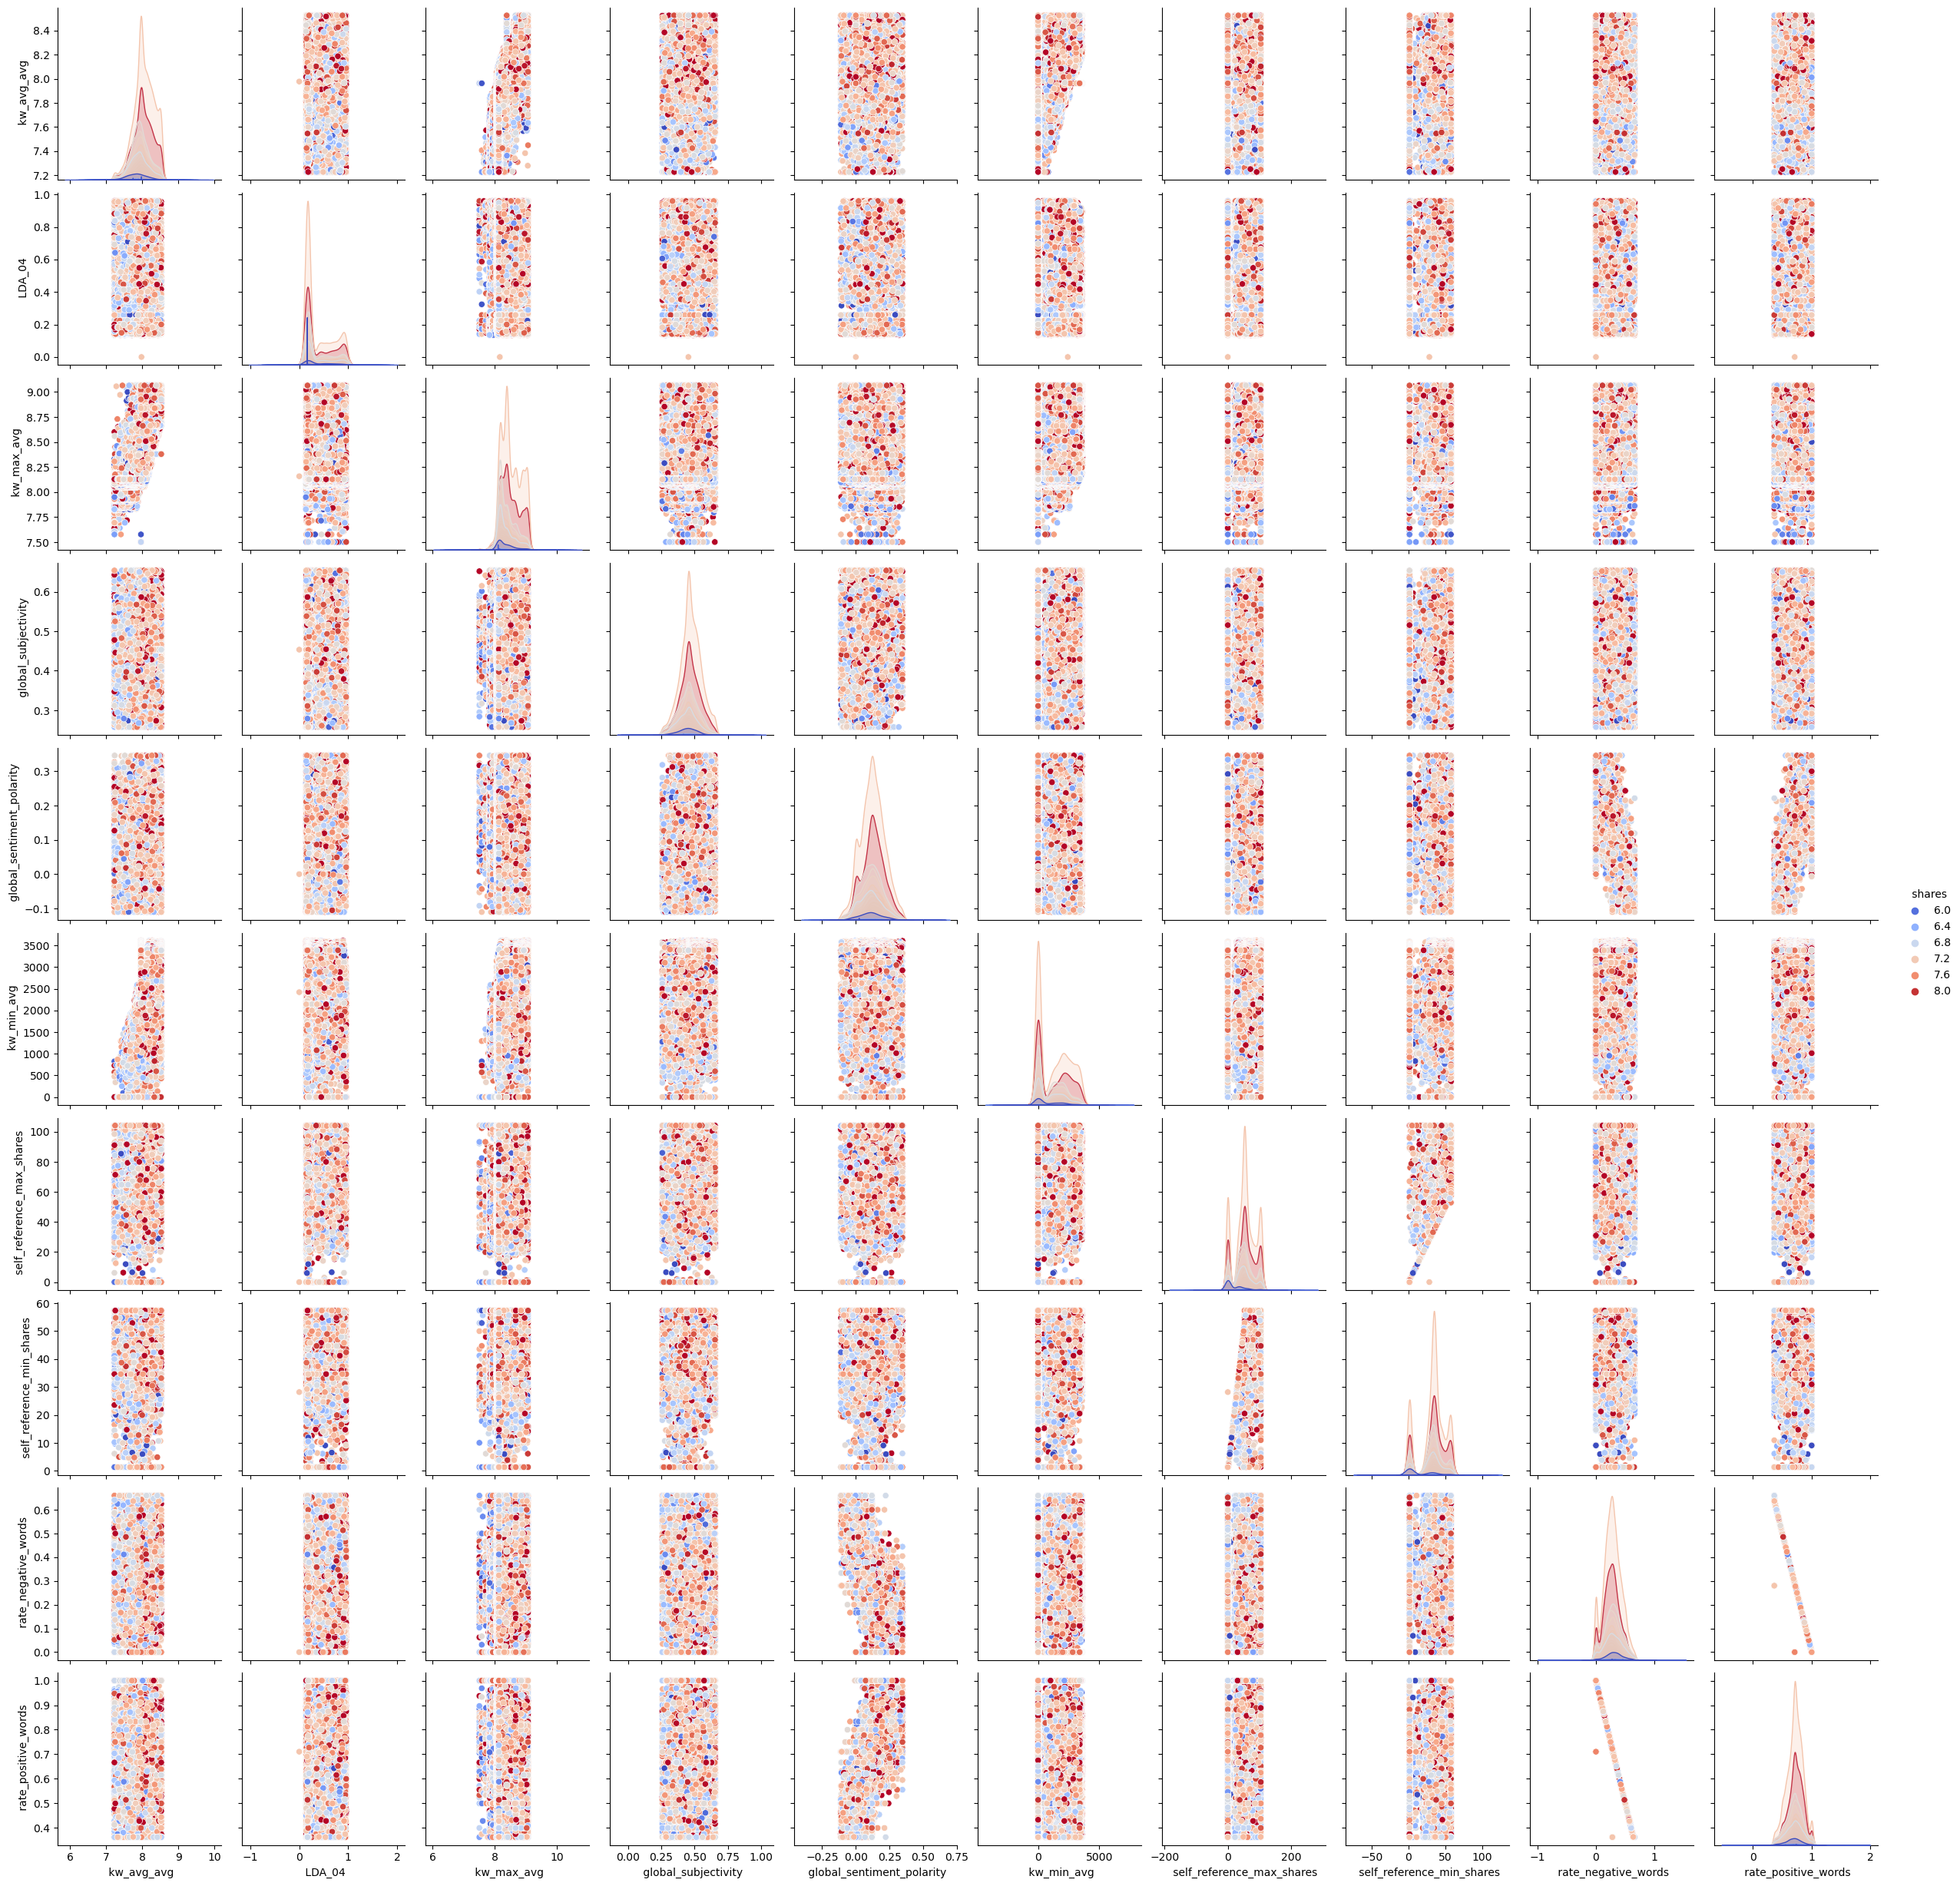

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top features based on feature importance
top_features = [
    ' kw_avg_avg', ' LDA_04', ' kw_max_avg', ' global_subjectivity', 
    ' global_sentiment_polarity', ' kw_min_avg', ' self_reference_max_shares',
    ' self_reference_min_shares', ' rate_negative_words', ' rate_positive_words'
]

# Subset the dataframe to only include the top features and 'shares' column
df_subset = df5[top_features + [' shares']]

# Plot the pairplot
sns.pairplot(df_subset, hue=' shares', palette='coolwarm')
plt.show()

### Split Data into Training and Testing Sets

Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models such as machine learning are accurate.

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df5, y, test_size=0.2, random_state=42)
X_test_unseen = X_test.copy()
X_test_unseen.to_csv('X_test_unseen.csv', index=False)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31715, 10)
X_test shape: (7929, 10)
y_train shape: (31715,)
y_test shape: (7929,)


## 10. Feature Scailing
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build the ML Model
Here we are creating regression models.Regression is a statistical technique used to model and analyze the relationships between a dependent variable (often referred to as the target or output variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand how the dependent variable changes when any one of the independent variables is varied while the others are held fixed.

## 1.Linear Regression
Linear regression is a regression technique. It is used to model the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to the observed data.

In [110]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

## 2.Support Vector Regressor (SVR)
A type of Support Vector Machine that uses the principles of maximizing the margin to create a decision boundary for regression tasks. It attempts to fit the best line within a predefined margin of tolerance.

In [113]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

## 3. Random Forest Regression
An ensemble learning method that constructs multiple decision trees during training and outputs the average prediction from all trees for regression tasks. It reduces overfitting compared to a single decision tree.

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

## 4.Gradient Boosting Regressor
An ensemble technique that builds models sequentially, each new model correcting the errors of the previous one. It uses decision trees as base learners.

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

## 5.k-Nearest Neighbors Regressor (k-NN)
A non-parametric method that predicts the value of a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

In [122]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

## 6.Multi-layer Perceptron (MLP) Regressor
The MLP regressor is capable of modeling complex non-linear relationships. It's flexible and can approximate any continuous function given enough data and appropriate architecture.

In [125]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

## 12.Model Evaluation
Model evaluation is a crucial step in the machine learning workflow, particularly in regression tasks. It helps determine how well your model performs and its predictive accuracy. Here are the common metrics and techniques used for evaluating regression models:

1.Mean Absolute Error (MAE):The average of the absolute differences between predicted and actual values.
2.Mean Squared Error (MSE):The average of the squared differences between predicted and actual values.
3.Root Mean Squared Error (RMSE):The square root of the Mean Squared Error.
4.R-squared (R² Score):The proportion of variance in the dependent variable that can be predicted from the independent variables.

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Linear Regression Model Evaluation

In [131]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.4064931118548724
Mean Squared Error (MSE): 0.2610183343099603
Root Mean Squared Error (RMSE): 0.5108995344585472
R² Score: 0.05863567081950494


## 2.Support Vector Regression Model Evaluation

In [134]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")


Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.39990921964694576
Mean Squared Error (MSE): 0.2573068725116394
Root Mean Squared Error (RMSE): 0.5072542483919079
R² Score: 0.07202108206002877


## 3. Random Forest Regression Model Evaluation

In [137]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.4066983004333034
Mean Squared Error (MSE): 0.2611459619312248
Root Mean Squared Error (RMSE): 0.5110244240065487
R² Score: 0.05817538096900776


## 4.Gradient Boosting Regressor Model Evaluation

In [140]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.3981589700898492
Mean Squared Error (MSE): 0.2519829924499289
Root Mean Squared Error (RMSE): 0.5019790757092659
R² Score: 0.09122169030917238


## 5.k-Nearest Neighbors Regressor Model Evaluation (k-NN)

In [143]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")


k-Nearest Neighbors Model Evaluation:
Mean Absolute Error (MAE): 0.439199479226224
Mean Squared Error (MSE): 0.3009377538622552
Root Mean Squared Error (RMSE): 0.5485779378194635
R² Score: -0.08533397678193877


## 6.Multi-layer Perceptron (MLP) Regressor Model Evaluation

In [146]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")


Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 0.4052494468052832
Mean Squared Error (MSE): 0.25863474374979123
Root Mean Squared Error (RMSE): 0.5085614454024128
R² Score: 0.06723210575824745


## 13. Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

### 1. Linear Regression

In [152]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
ridge = Ridge()
param_dist_ridge = {
    'alpha': np.logspace(-3, 3, 7)  
}
random_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, 
                                         scoring='neg_mean_squared_error', cv=5, n_iter=10, verbose=1, random_state=42)
random_search_ridge.fit(X_train_scaled, y_train)
best_ridge = random_search_ridge.best_estimator_
print("Best Ridge Parameters:", random_search_ridge.best_params_)
y_pred_ridge = best_ridge.predict(X_test_scaled)

C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Ridge Parameters: {'alpha': 100.0}


### 2.Multi-layer Perceptron (MLP)

In [155]:
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, n_iter_no_change=10)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': np.logspace(-5, 0, 3)  
}
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       scoring='neg_mean_squared_error', cv=3, n_iter=5, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train_scaled, y_train)

best_mlp = random_search_mlp.best_estimator_
print("Best MLP Parameters:", random_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test_scaled)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best MLP Parameters: {'solver': 'adam', 'hidden_layer_sizes': (100, 50), 'alpha': 1.0, 'activation': 'relu'}


## Model Evaluation

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R² Score: {r2_mlp}")

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 0.4064745488587392
Mean Squared Error (MSE): 0.2610107840254531
Root Mean Squared Error (RMSE): 0.5108921451984294
R² Score: 0.058662900969942644
Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 0.403770972834728
Mean Squared Error (MSE): 0.2564125394706913
Root Mean Squared Error (RMSE): 0.5063719378783655
R² Score: 0.07524650001919908


## 1. Boosting Algorithms
Boosting is an ensemble technique that builds models sequentially, where each new model tries to correct errors made by the previous ones. Here’s how you can apply popular boosting algorithms:

a) Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

# Define the meta-model
meta_model = LinearRegression()

# Define the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Apply cross-validation on the scaled training set
cv_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Stacking R^2 scores: {cv_scores}')
print(f'Stacking Mean R^2: {cv_scores.mean()}')

# Fit the stacking model on the full training data
stacking_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
test_r2_score = stacking_model.score(X_test_scaled, y_test)
print(f'Test R^2 Score: {test_r2_score}')


In [ ]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

## 14. Save the Model